# Spreading of Fire Simulation<br>
##### Ryan Krishandi Lukito<br>22/497249/TK/54488<br>Teknologi Informasi

### Main Question

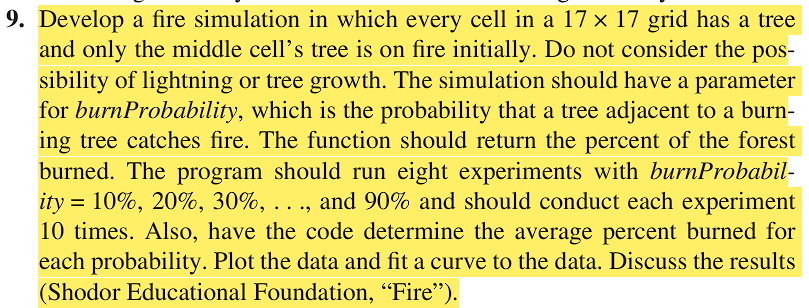

## Import All The Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import IPython.display as HTML
import math
from random import *
from decimal import Decimal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d

## 1. Declare All Constants

In this part, every global constants must be declared.<br>
_EMPTY_ is initiate with 0 as a symbol for the leftover land after burning.<br>
_TREE_ is initiate with 1 as a symbol of initial condition of the forest that full of trees.<br>
_BURNING_ is initiate with 2 as a symbol of trees burning.

In [2]:
global EMPTY, TREE, BURNING
EMPTY = 0
TREE = 1
BURNING = 2

## 2. Forest Initialization

_forest\_size_ is the size of the soon-to-be forest that were build using grid in a cartesian graph<br>
This function initiate forest grid with BURNING condition in the middle of grid and the rest are TREEs


In [3]:
def init_forest(forest_size):
    forest = np.full((forest_size,forest_size), TREE)
    forest[forest_size//2, forest_size//2] = BURNING
    return forest

## 3. Fire Spreading by Von Neumann Neighbourhood
_site_ is the grid from init_forest. <br>
_N_, _E_, _S_, and _W_ are the adjacent cells of the current cell. <br>
_prob\_burning_ is the burning probabilty of a cell. <br><br>
If a cell has its adjacent cells BURNING, than the cell itself will be BURNING too. For every site that have any cells BURNING, will be change into EMPTY. For every cell that EMPTY, it will stop changing again.

In [4]:
def fire_spreading(site, N, E, S, W, prob_burning):
    new_site = site
    if site == EMPTY:  # If the current cell is empty, it cannot catch fire
        return EMPTY
    if site == BURNING:  # If the current cell is burning, it becomes empty
        new_site = EMPTY
    if N == BURNING or E == BURNING or S == BURNING or W == BURNING:
        if random() < prob_burning:
            new_site = BURNING
    return new_site

## 4. Extend Forest by One Direction

Every grid in _forest_ will be extended by on cell in every direction possible with periodic boundary conditions returned

In [5]:
def reflecting_forest(forest):
    forest_ns = np.row_stack((forest[0], forest, forest[-1]))
    col_stack = np.column_stack((forest_ns[:, 0], forest_ns, forest_ns[:, -1]))
    return col_stack

## 5. Apply A Function Parameter to The Extended Forest

The size of the forest subtracts by 2 to erase (if any) borders of non-forest cells. Next, new grid called _new\_ext_ is created full of zeros with the size of forest. The iteration will access every position in the grid which fullfil the North, East, South, and West from a certain cell. Every North, East, South, and West will be applied into _fire\_spreading_ function as a parameter (alongside _prob\_burning_) and the result will be assigned into new grid called _new\_ext_. After the iteration complete, the function returns the updated _new\_ext_. 

In [6]:
def apply_extended(forest_ext, prob_burning):
    forest_size = forest_ext.shape[0] - 2
    new_ext = np.zeros((forest_size, forest_size))

    for row in range(1, forest_size+1, 1):
        for col in range(1, forest_size+1, 1):
            current = forest_ext[row,col]
            N = forest_ext[row-1,col]
            E = forest_ext[row, col+1]
            S = forest_ext[row+1, col]
            W = forest_ext[row, col-1]
            new_ext[row-1, col-1] = fire_spreading(current, N, E, S, W, prob_burning)

    return new_ext

## 6. Returning a List in A Simulation of Spreading Fire

At first, the function will initiate _forest_ using certain size from user. Then, an iteration starts looping to extend _forest_ by adding a reflective boundary, extending the _forest_ grid based on its current state with the probability of burning. Every updated list is stored to a list called _burned\_forest_ for every timestamp. <br>
This function is made to simulate fire spreading over a specified number of timestamps considering the initial condition of _forest_, the BURNING probability, and the rules for fire to spread.

In [7]:
def burn(forest_size, prob_burning, ts):
    forest = init_forest(forest_size)

    burned_forest = [forest]
    for i in range(ts):
        forest_ext = reflecting_forest(forest)
        forest = apply_extended(forest_ext, prob_burning)
        burned_forest.append(forest)
    
    return burned_forest


## 7. Coloring The Forest in Every Possible Condition

This function will color every grid in _forest_ based on its current status. If a cell is BURNING, it will turn to red. If a cell is TREE, it will turn into green. If a cell is EMPTY, it will turn to yellow. Every color is represented by its RGB channel which will be assign into _color\_forest_, an array full of zeros which represent the forest itself.

In [8]:
def coloring(forest):
    forest_size = forest.shape[0]
    color_forest = np.zeros((forest_size, forest_size, 3))

    for row in range(forest_size):
        for col in range(forest_size):
            if (forest[row,col] == BURNING):
                color_forest[row, col] = [255, 0, 0]
            elif (forest[row, col] == TREE):
                color_forest[row, col] = [0, 255, 0]
            else:
                color_forest[row, col] = [255, 255, 0]

    return color_forest

## 8. Percentage of Burned Trees

Every burned trees will be calculated its percentage from every timestamp. Every percentage is going to be the parameter on how the probabilities of burning do in every random occation.

In [9]:
def percentage(burned_forest, forest_size):
    x = 0
    for row in range(forest_size):
        for col in range(forest_size):
            if (np.array_equal(burned_forest[row,col], [255,0,0])) or (np.array_equal(burned_forest[row,col], [255,255,0])):
                x += 1
    percent = round(((x/(forest_size**2)) * 100), 3)
    return percent

## 9. Average of Burned Trees per Experiment

Every percentage of burned trees are collected into an array to calculate the average percent of burned trees. 

In [10]:
def average(burned_forest):
    avg = round(sum(burned_forest)/len(burned_forest), 3)
    return avg

## 10. Simulation

#### 10.1. Declare All Constants

In [11]:
forest_size = 17
timestamps = 8
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
experiments = 10
total_probs = 9
avg_burn_per_probs = []

#### 10.2. Function for Simulation for Every Probability

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

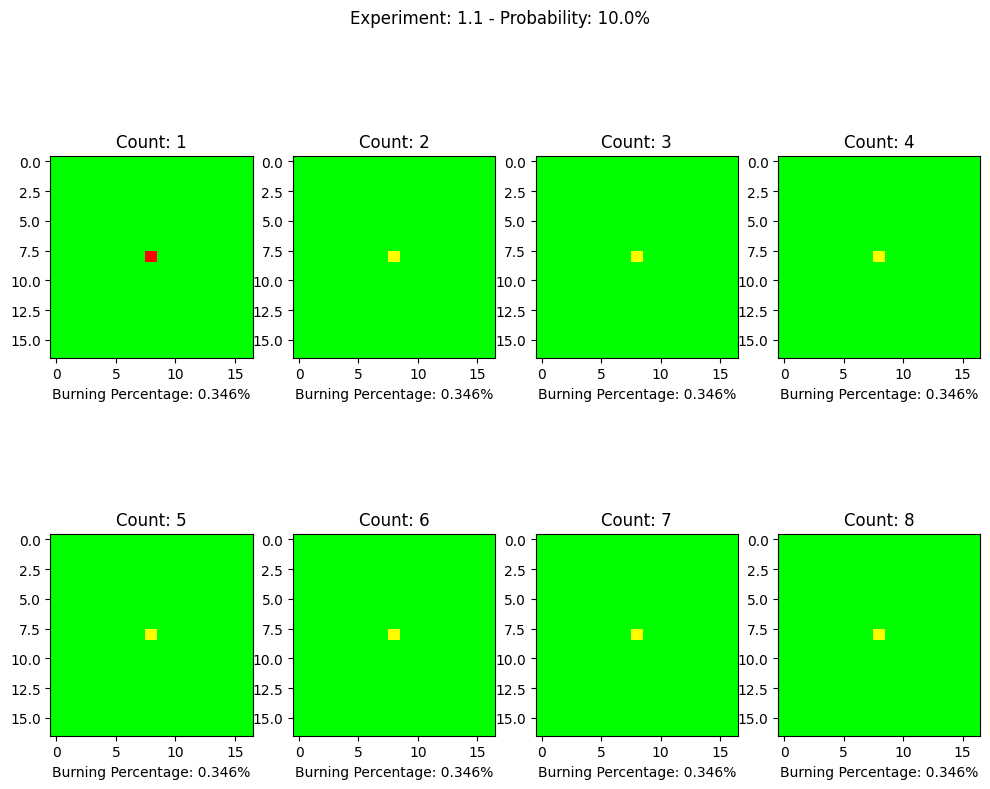

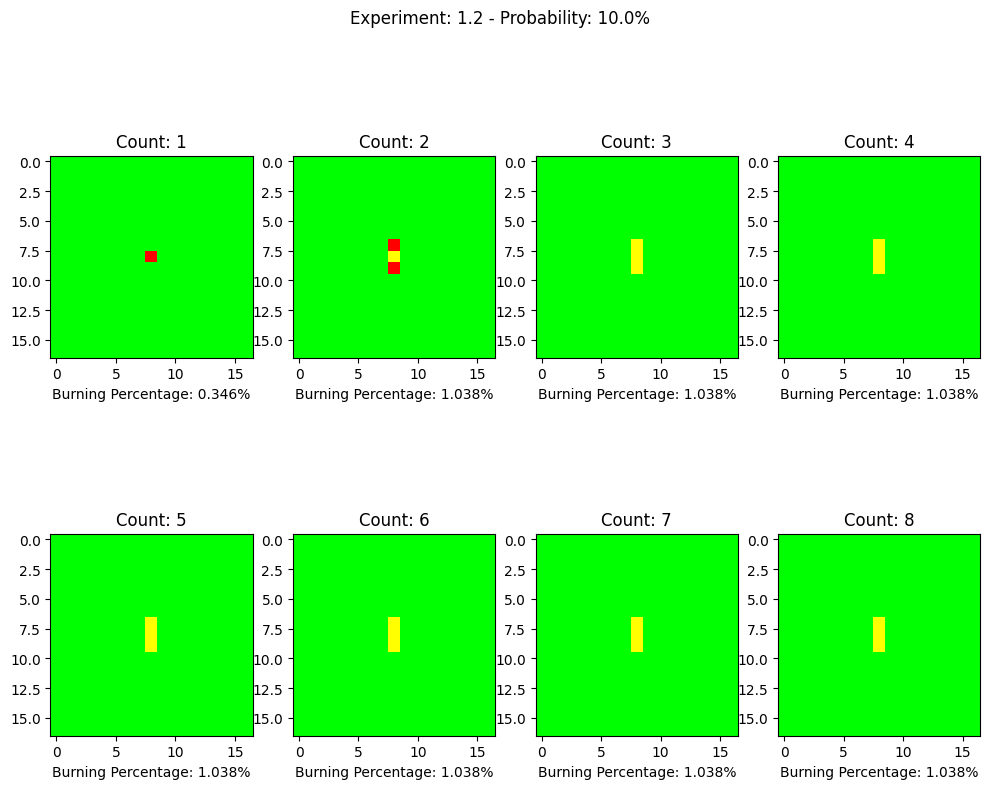

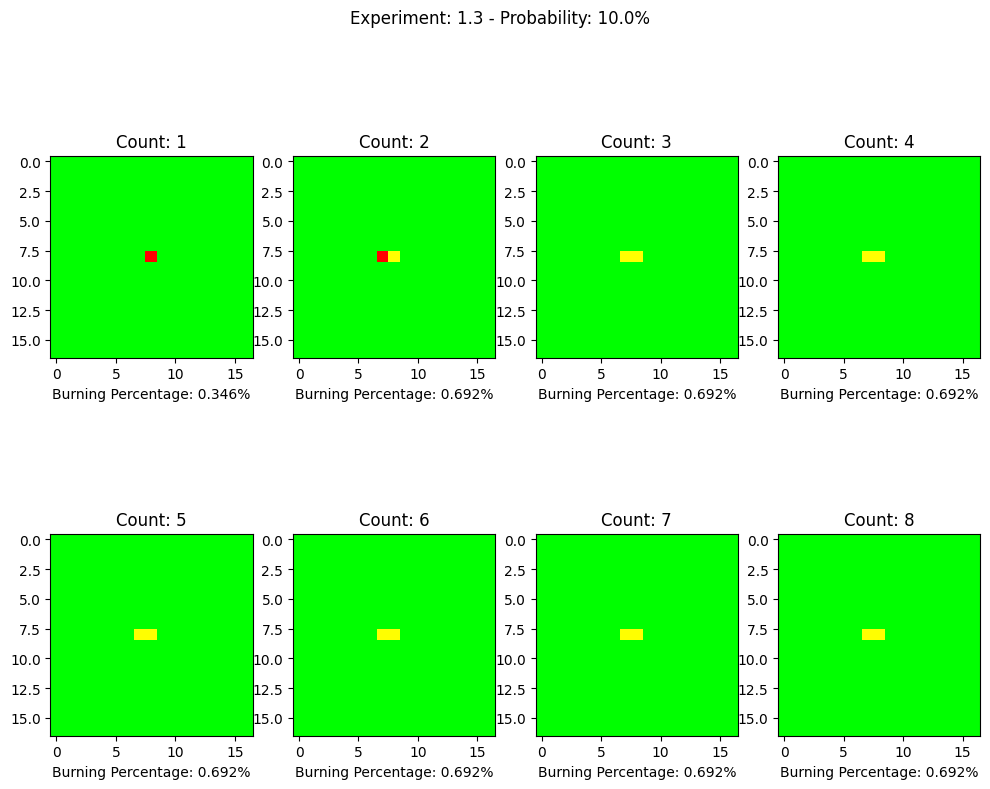

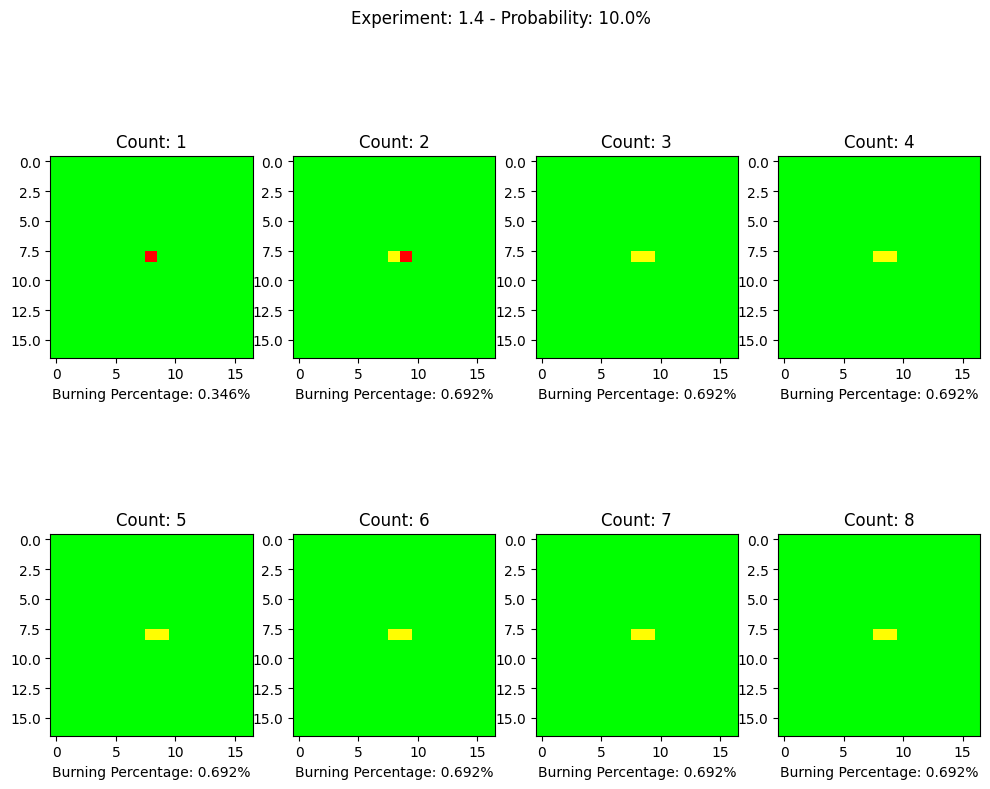

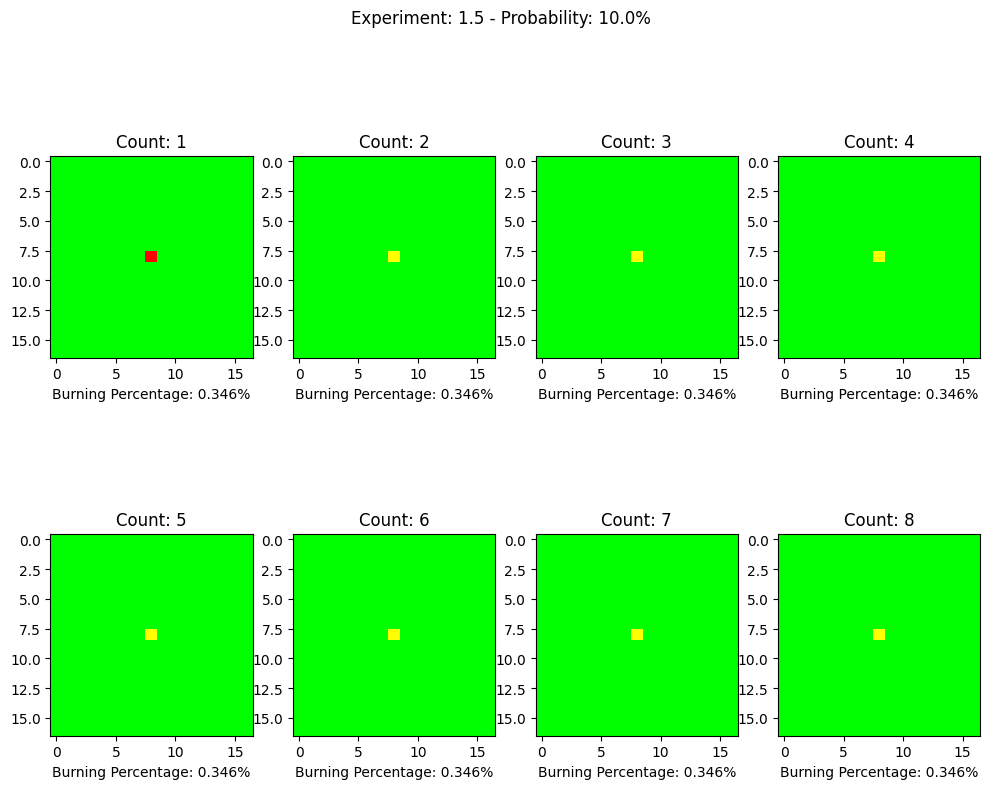

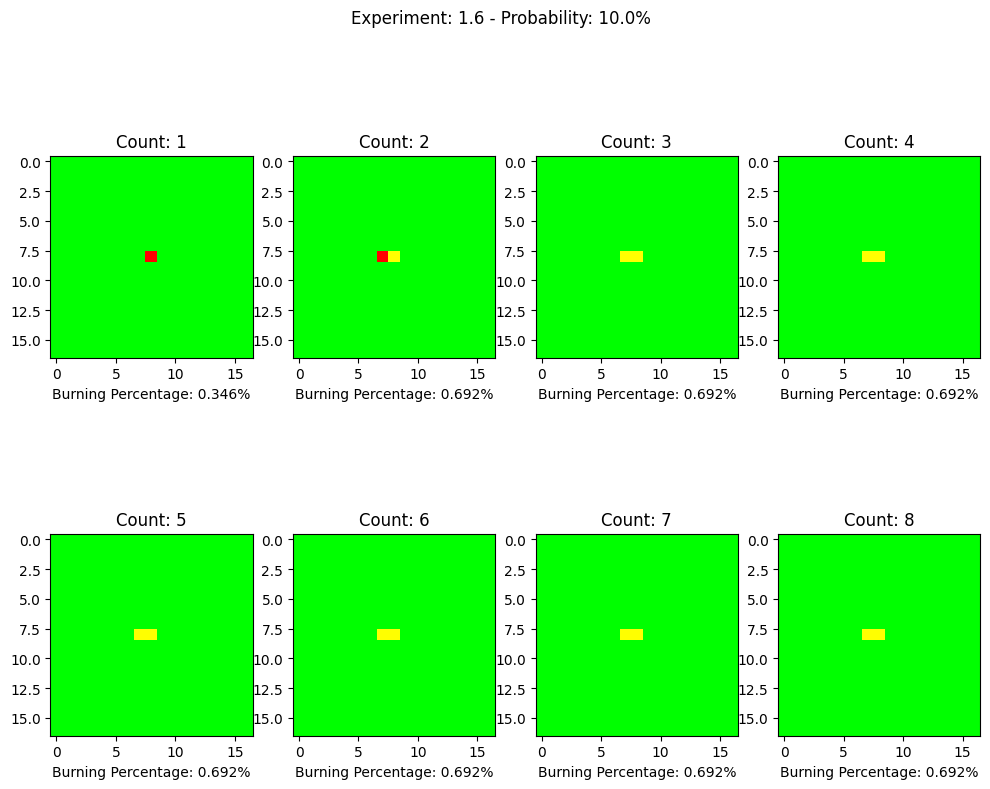

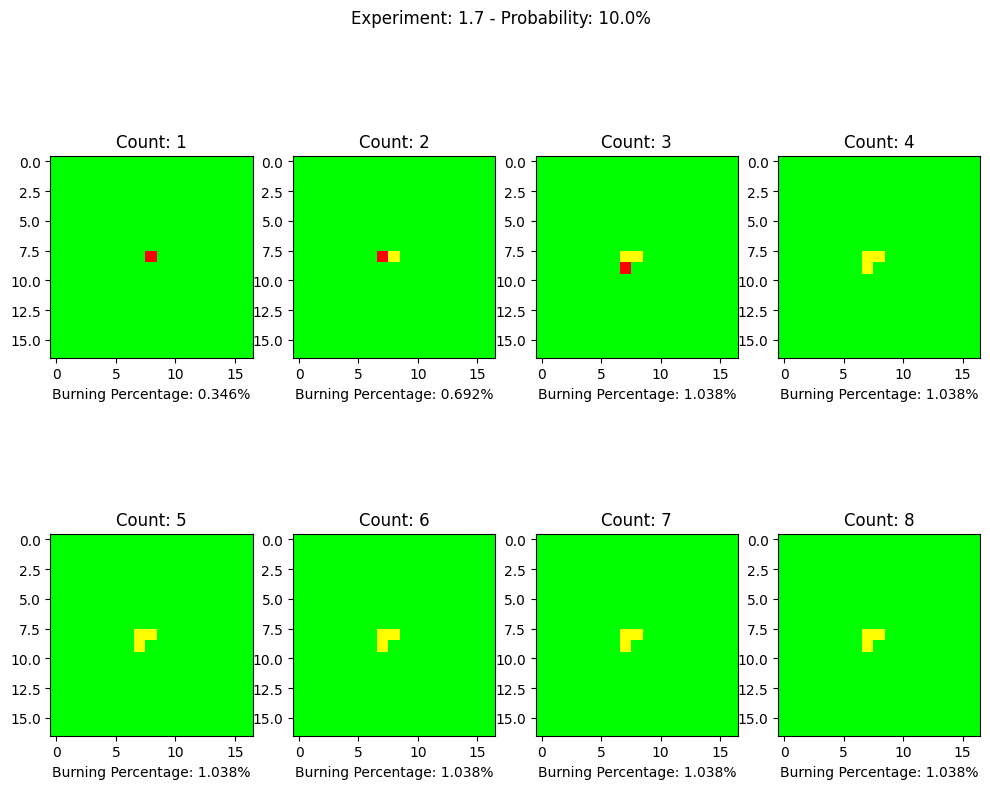

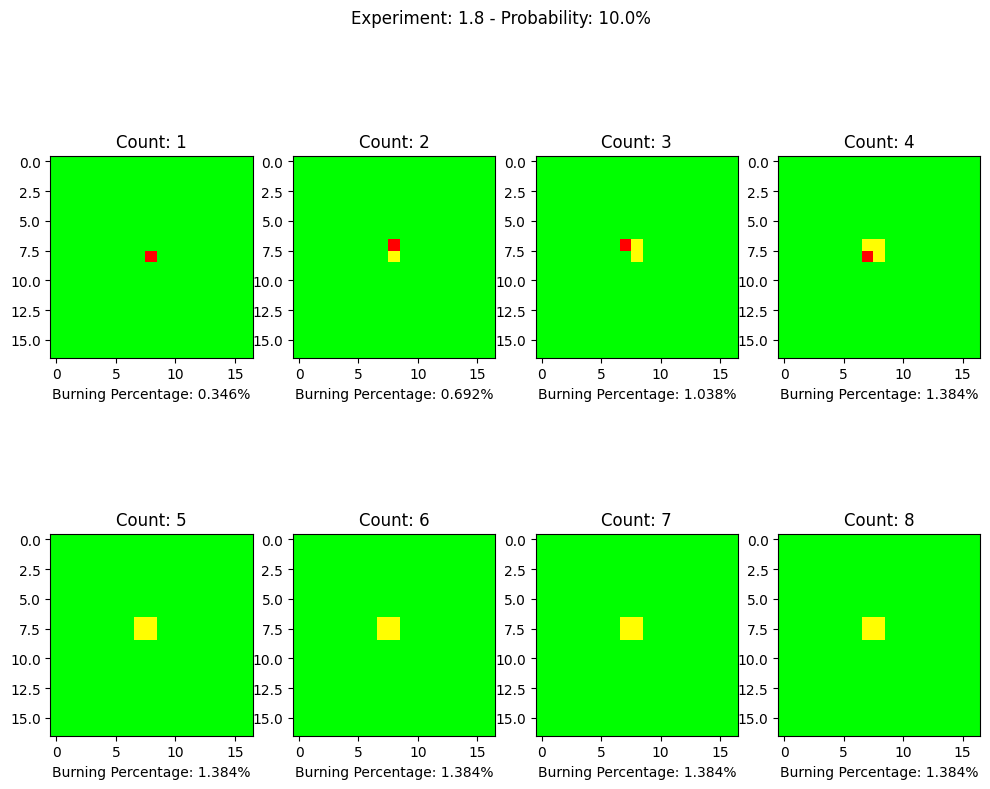

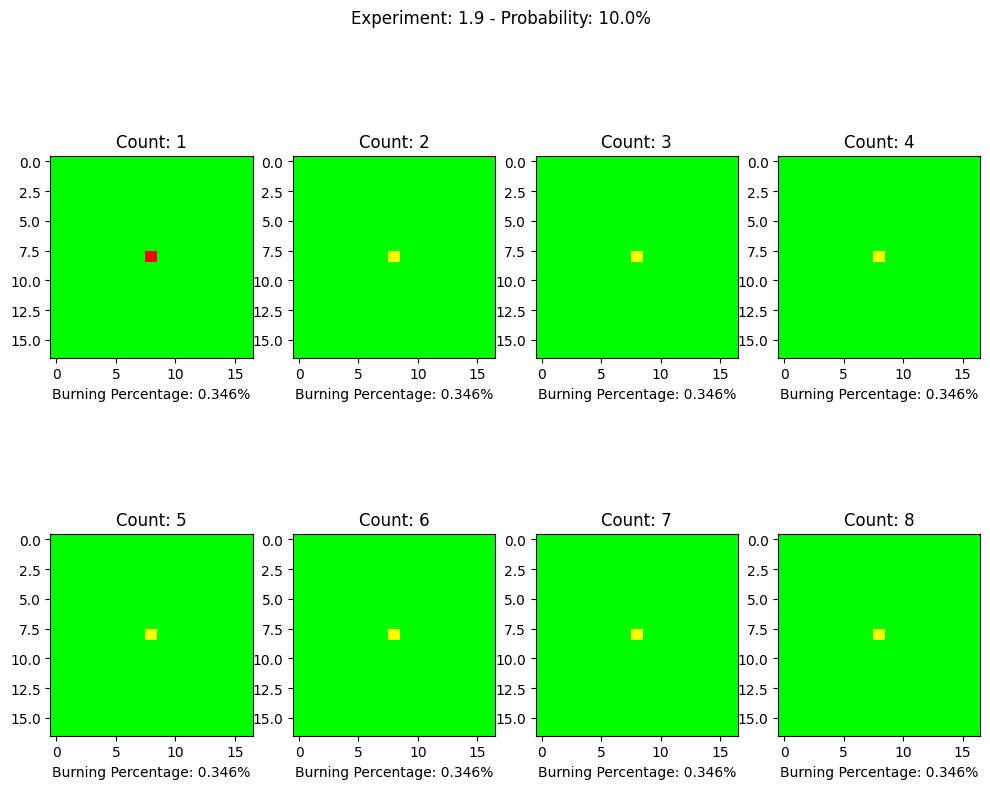

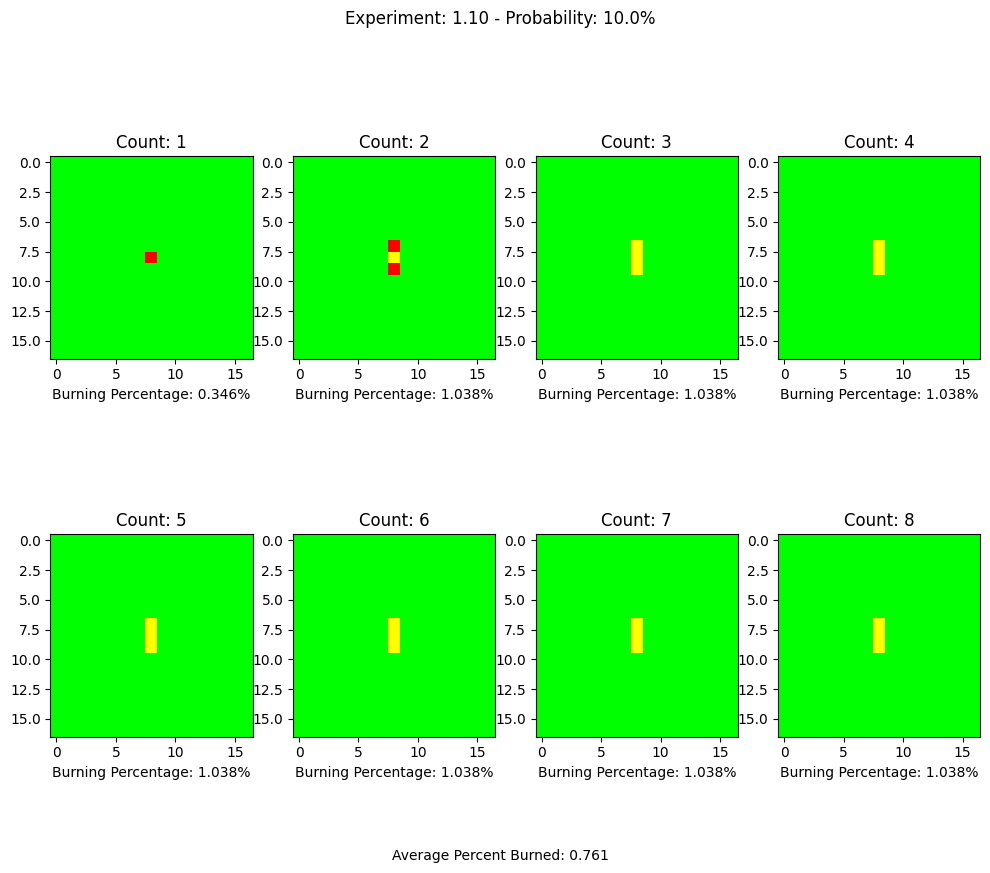

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

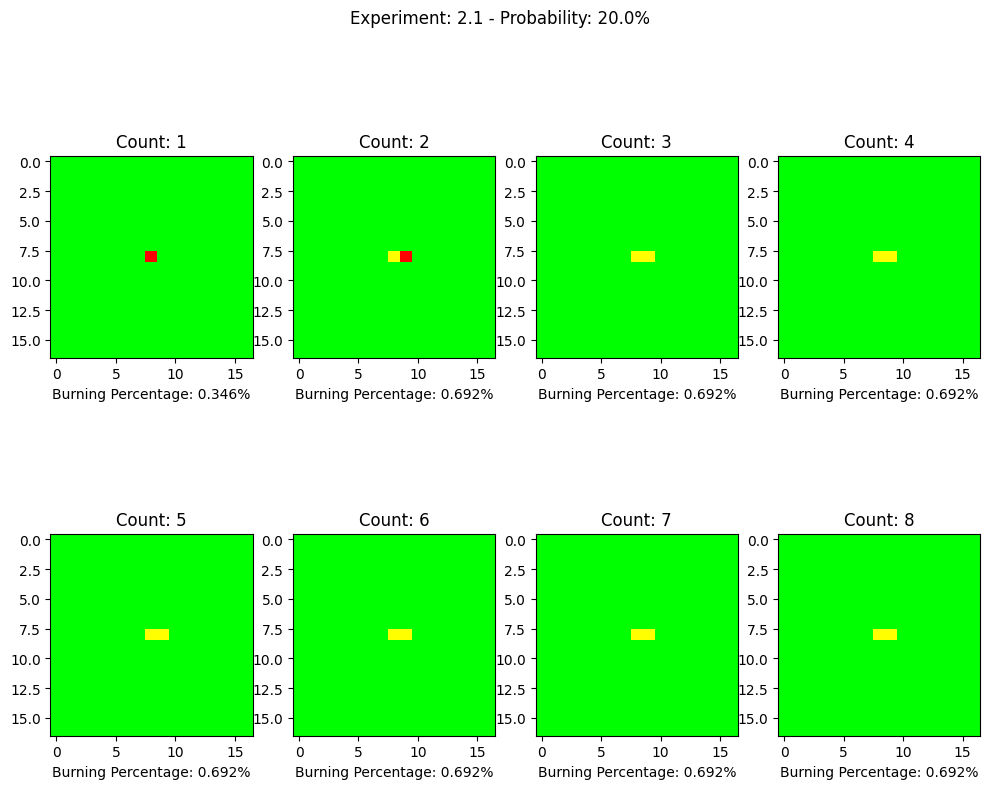

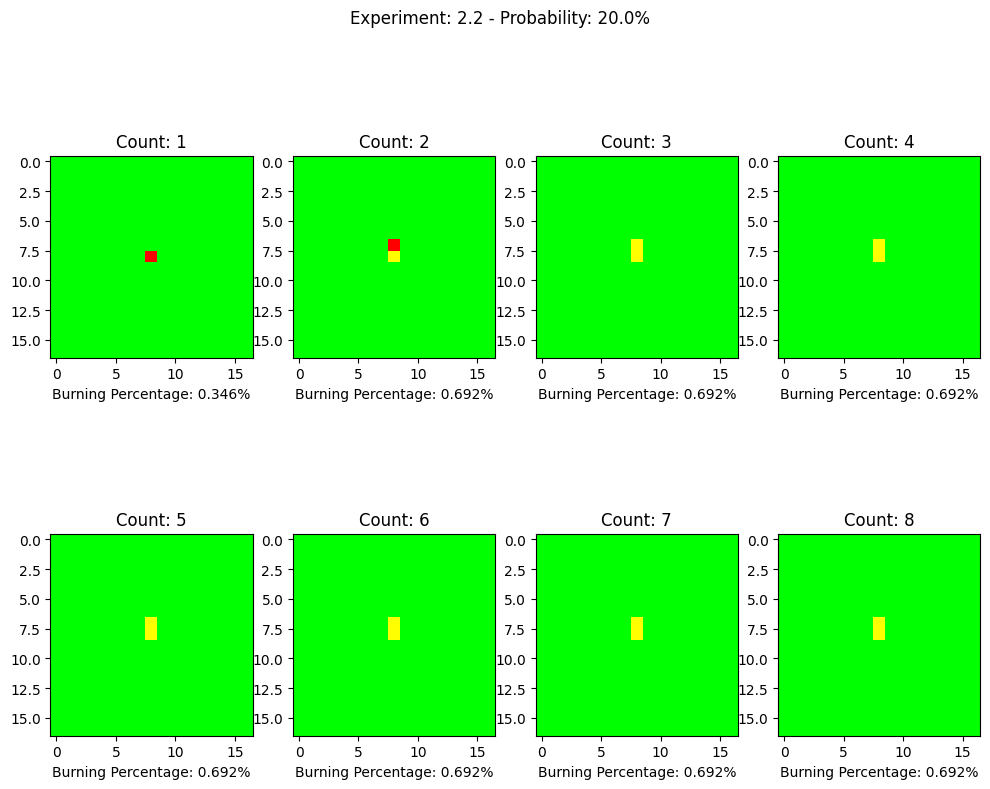

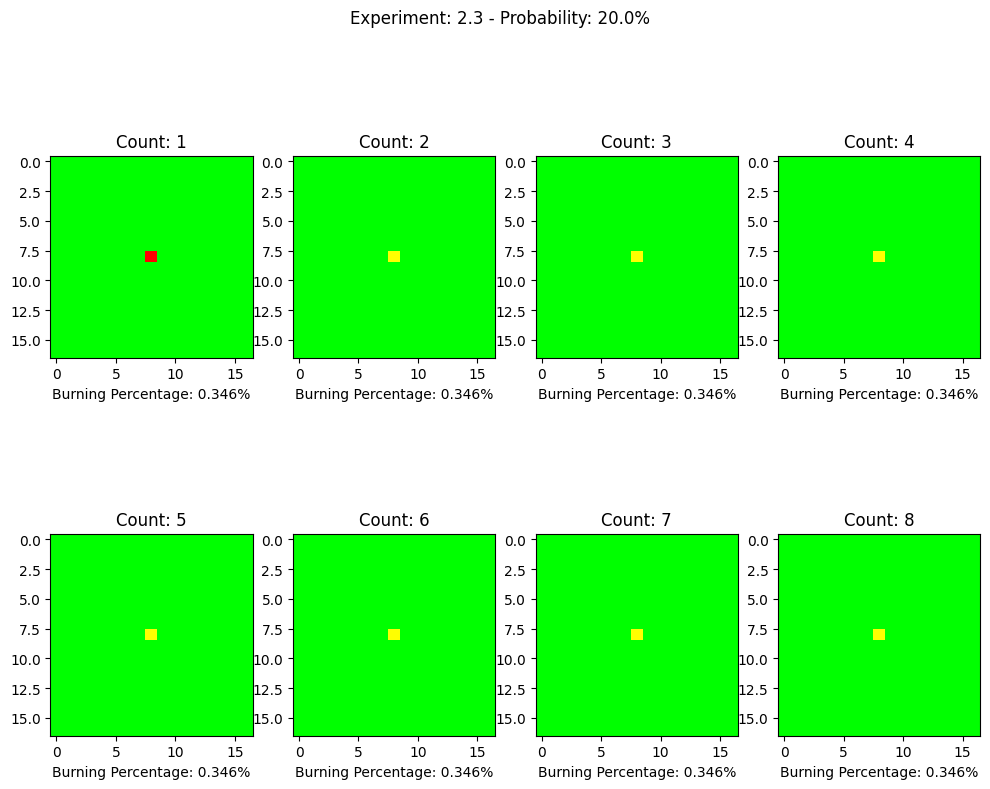

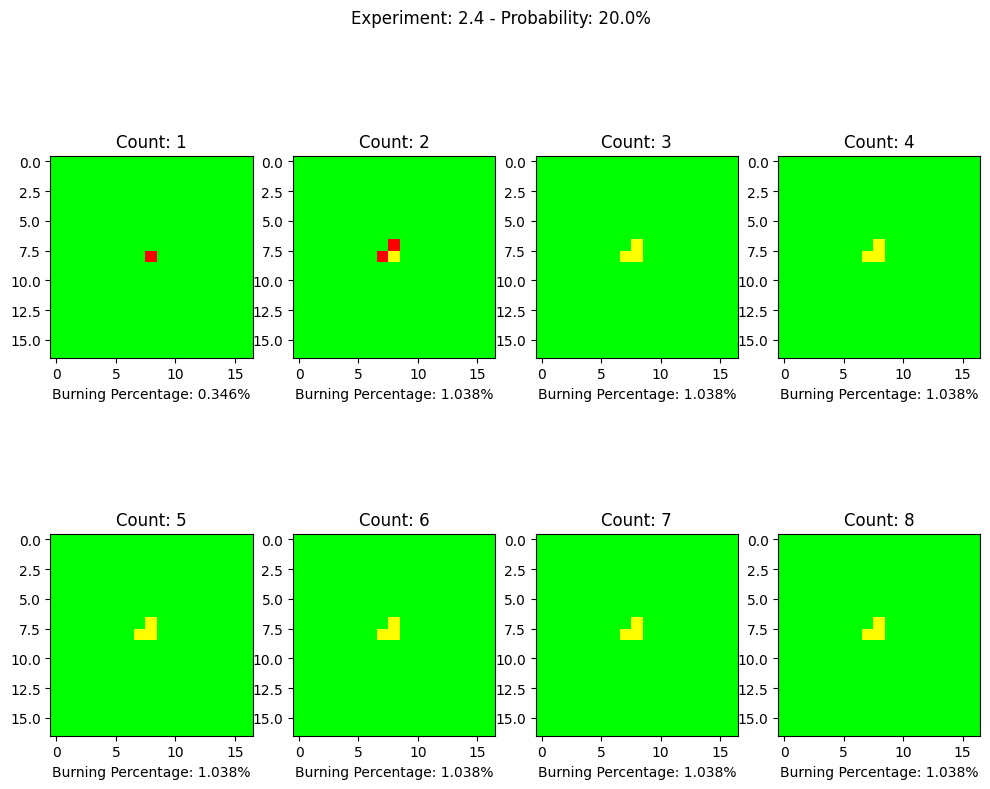

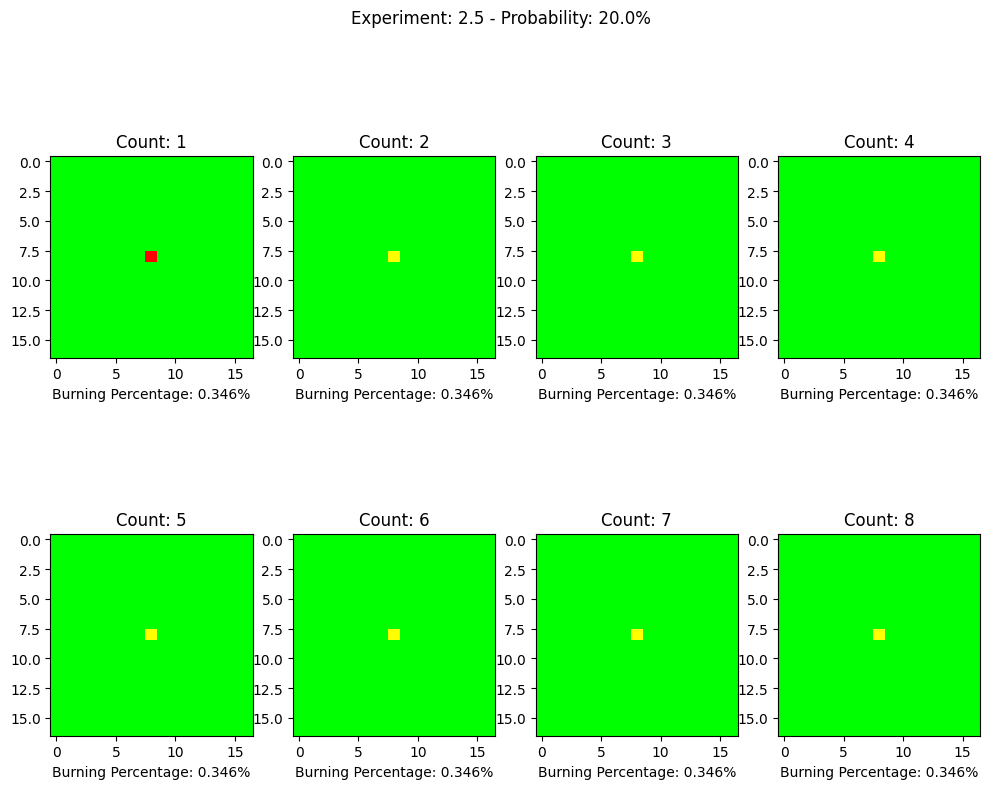

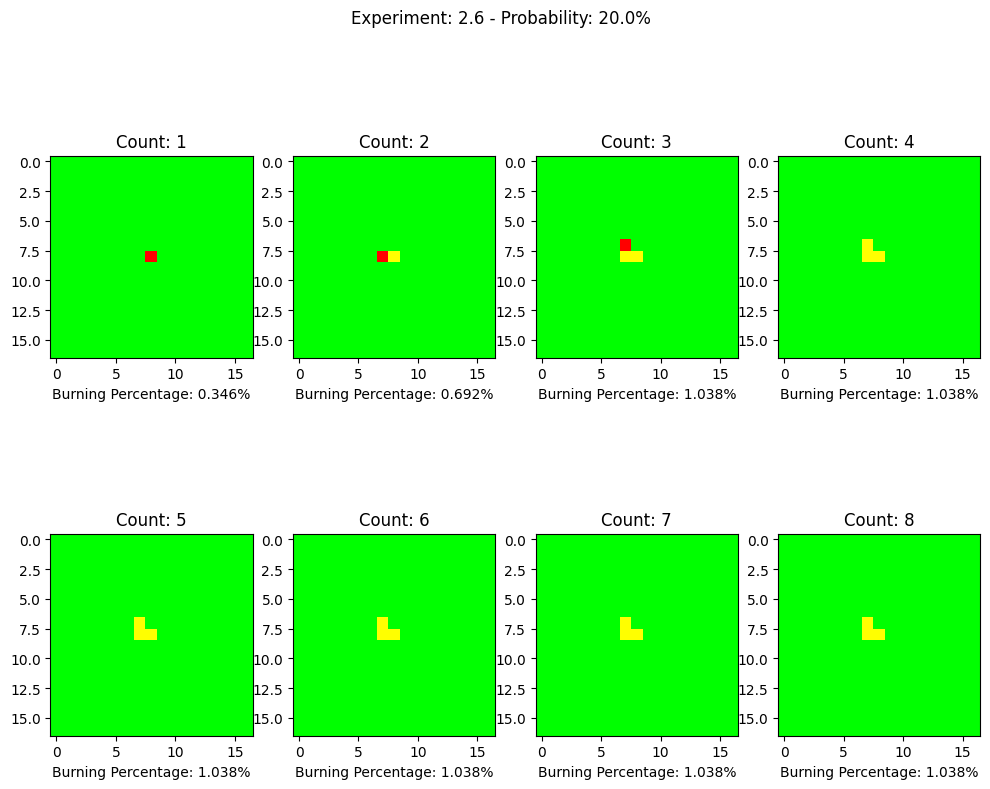

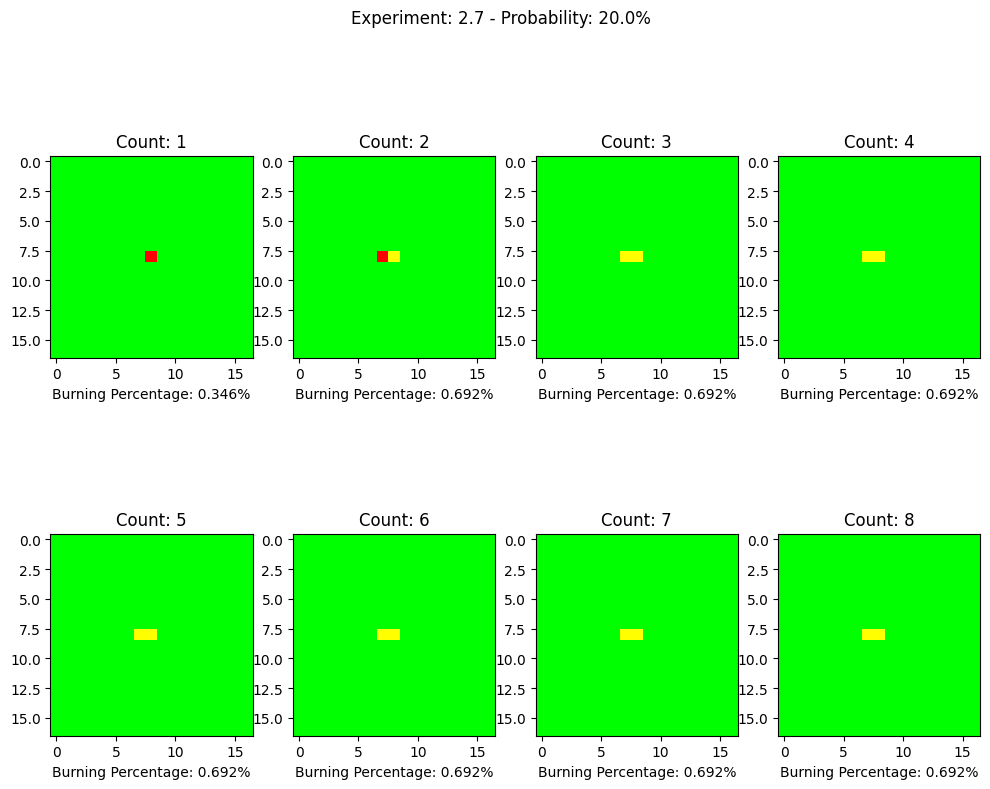

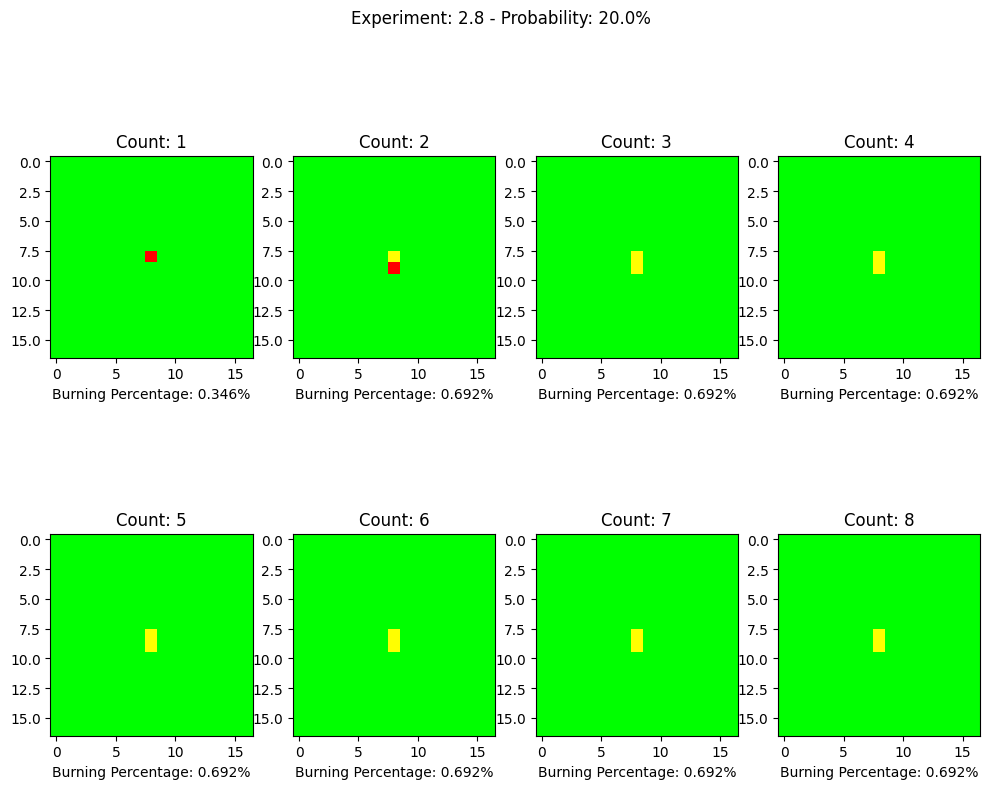

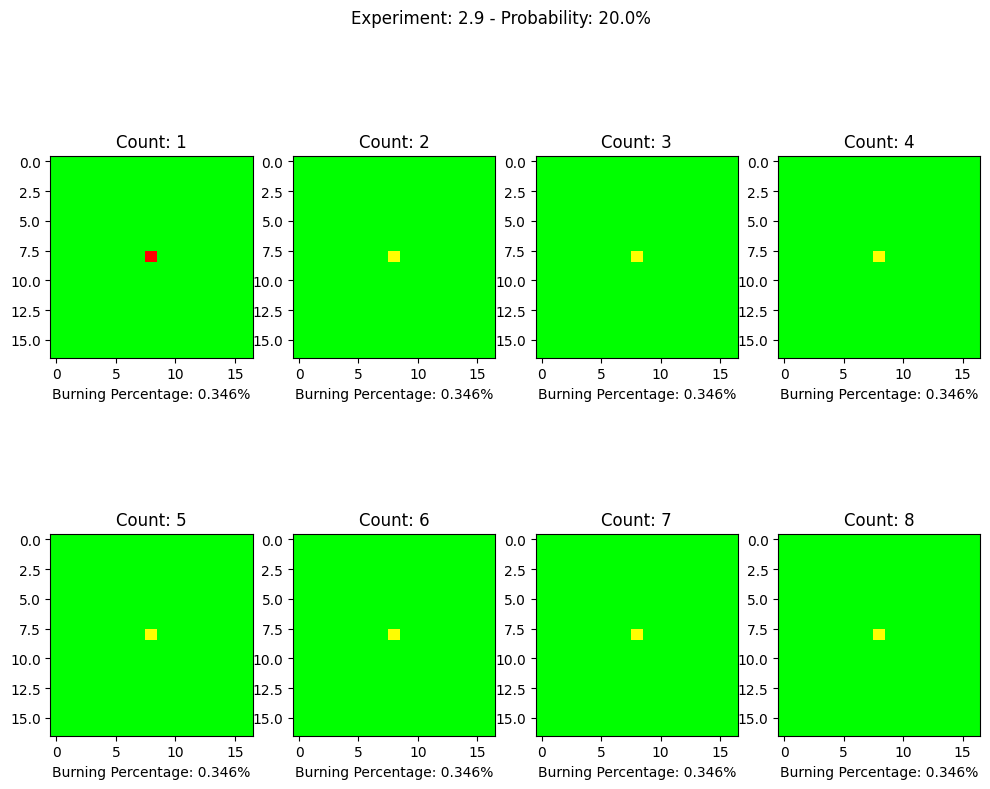

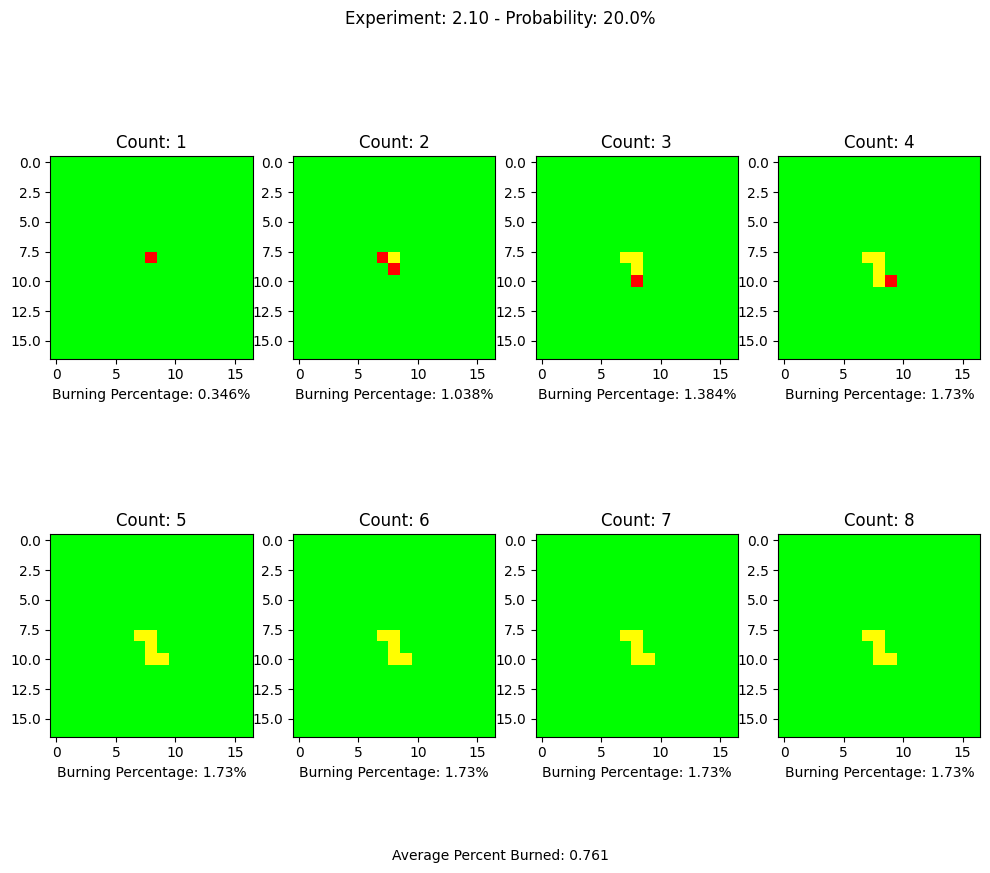

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

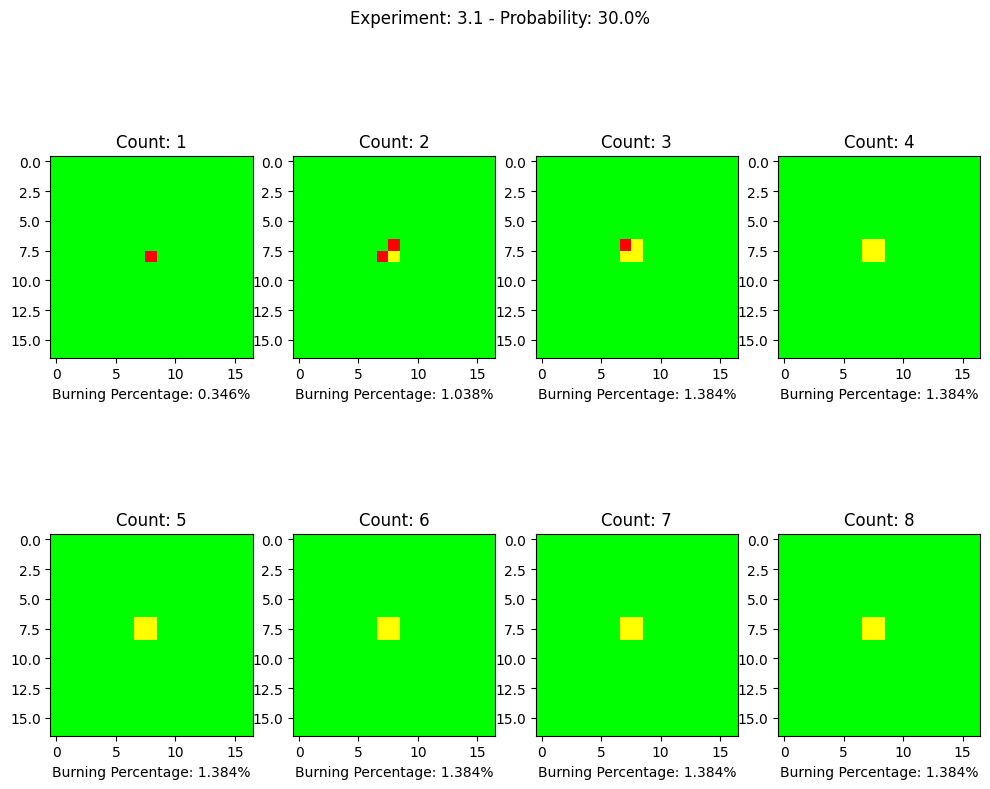

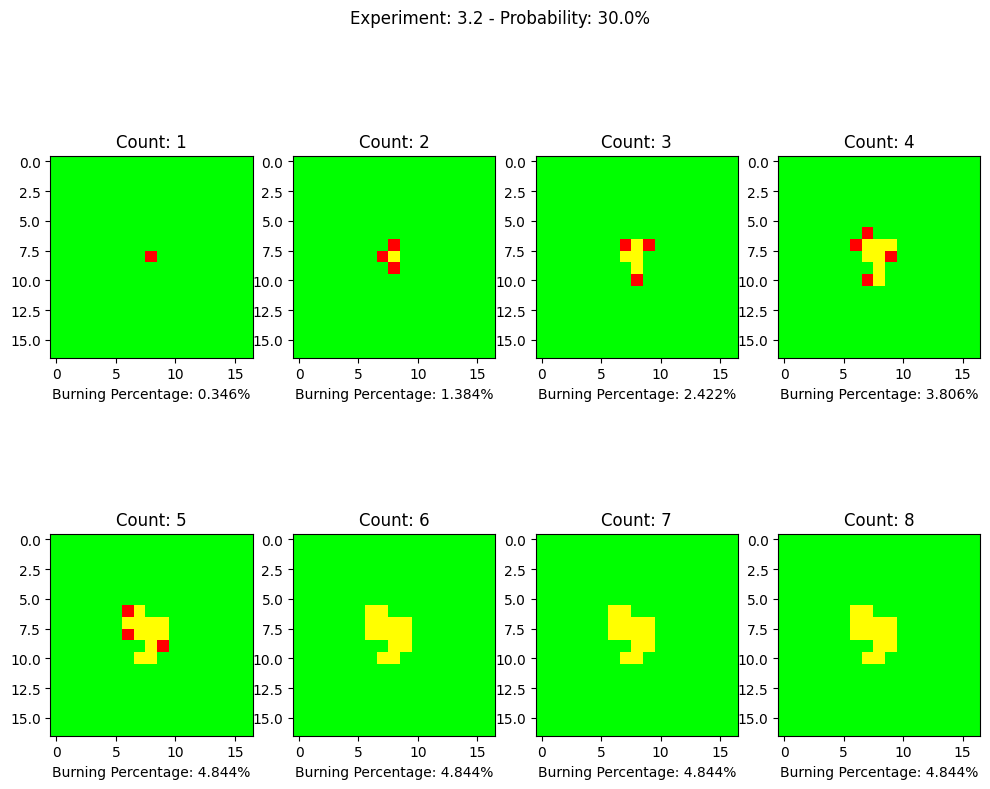

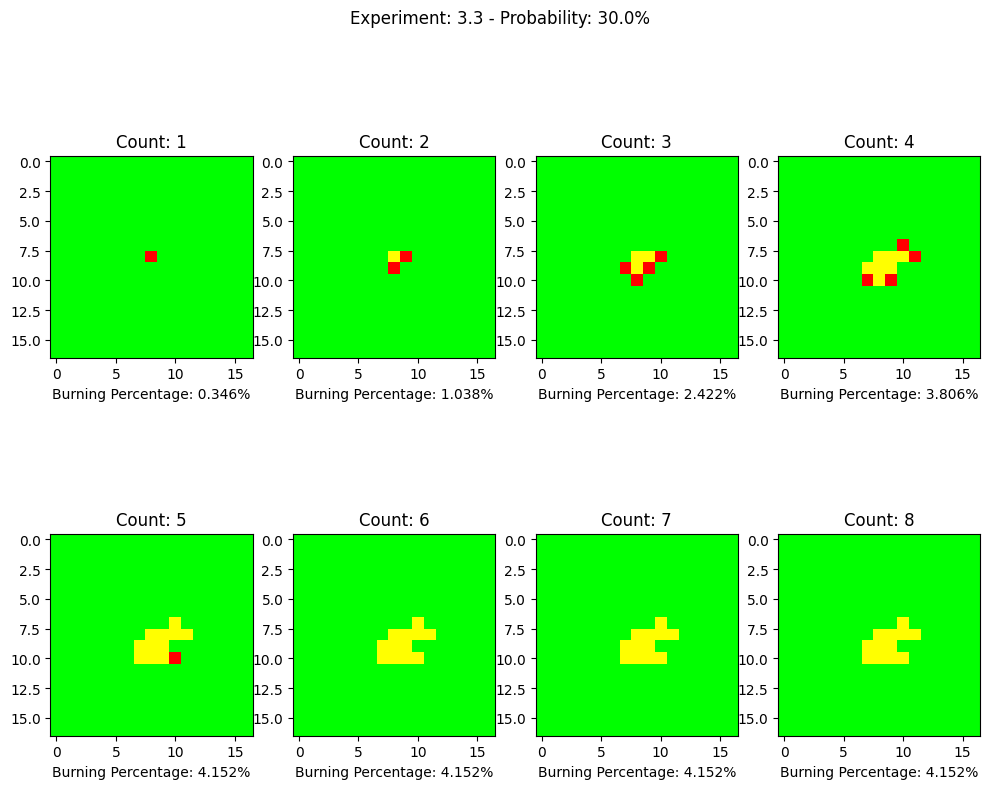

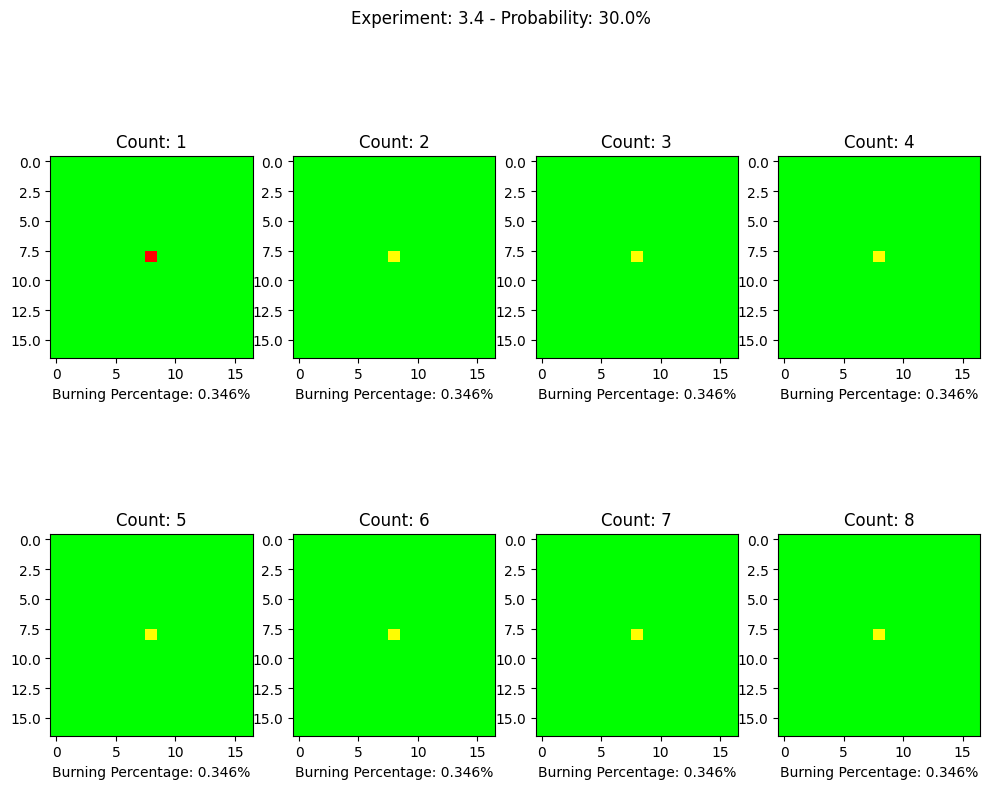

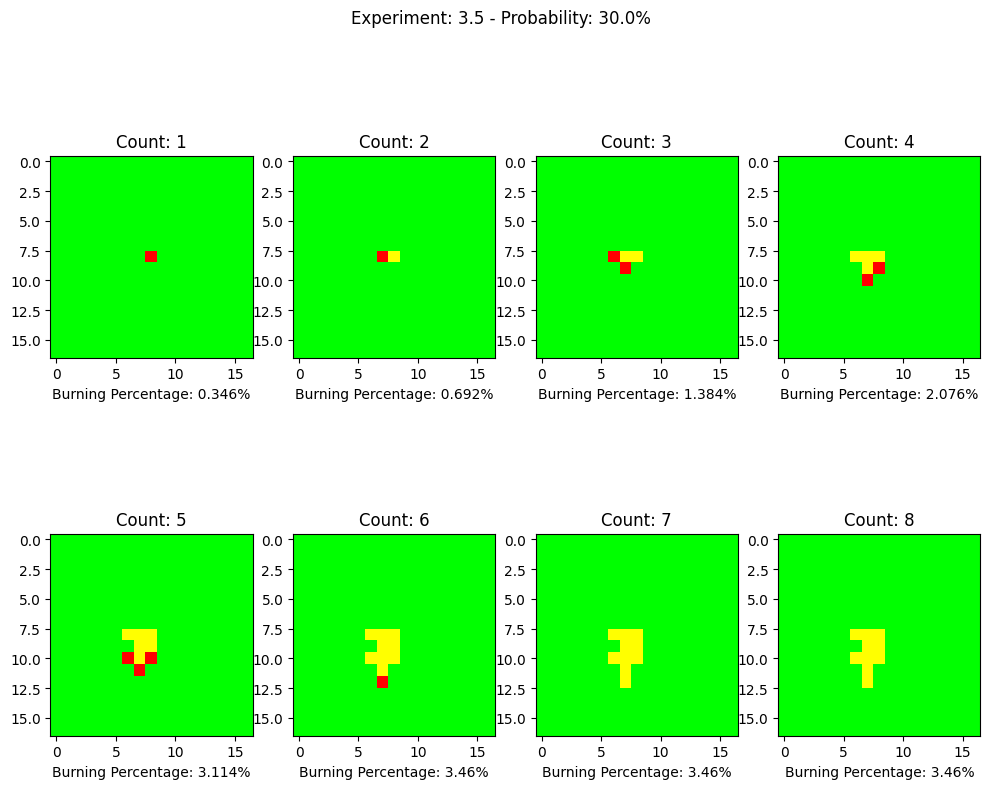

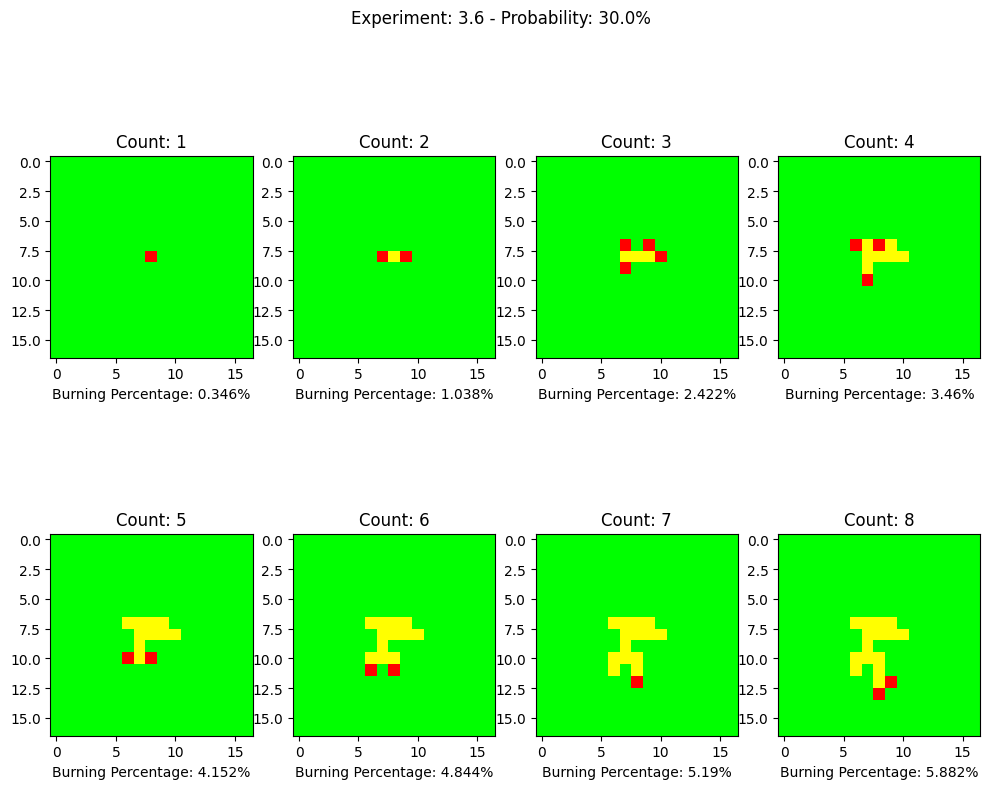

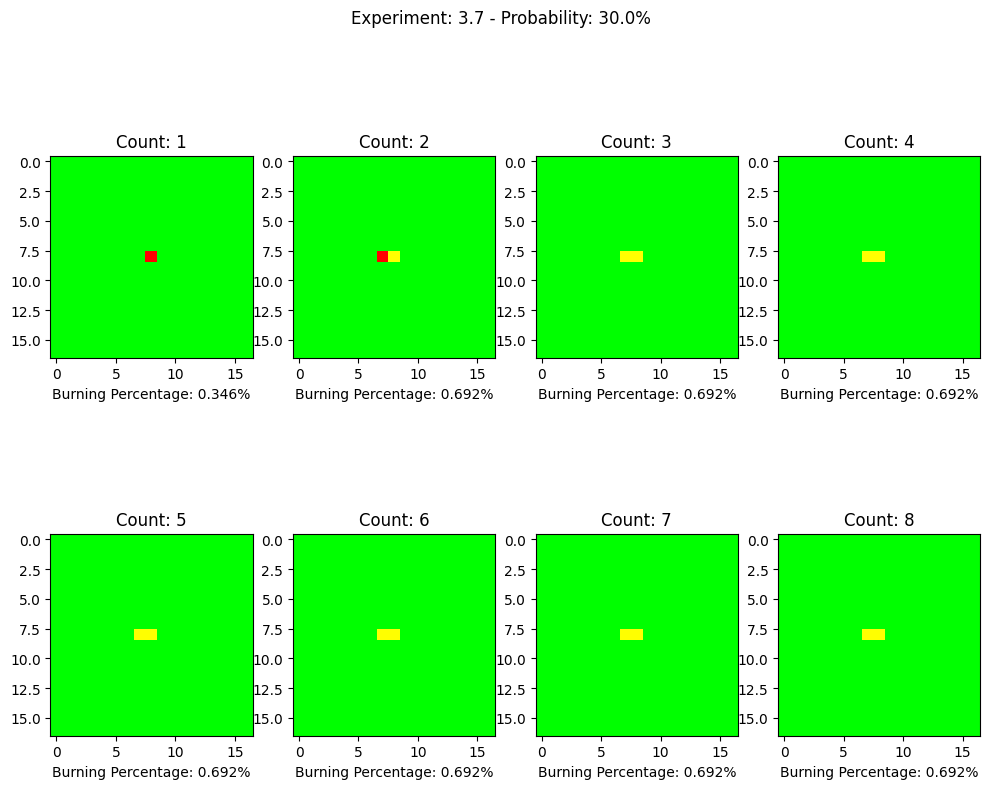

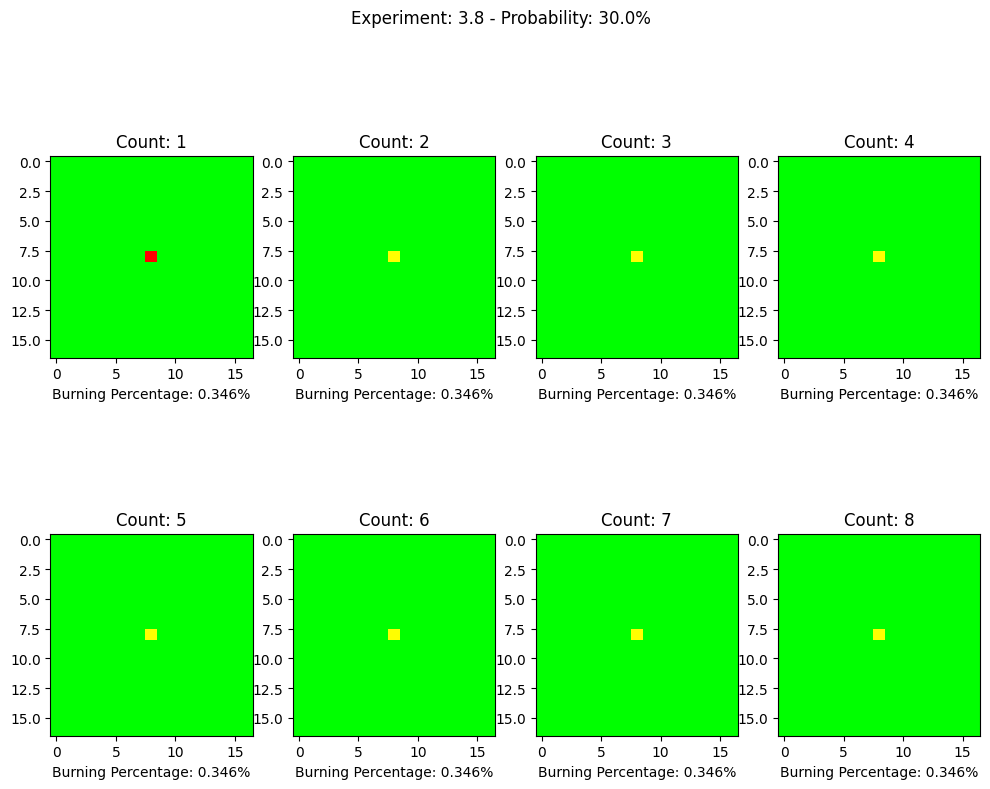

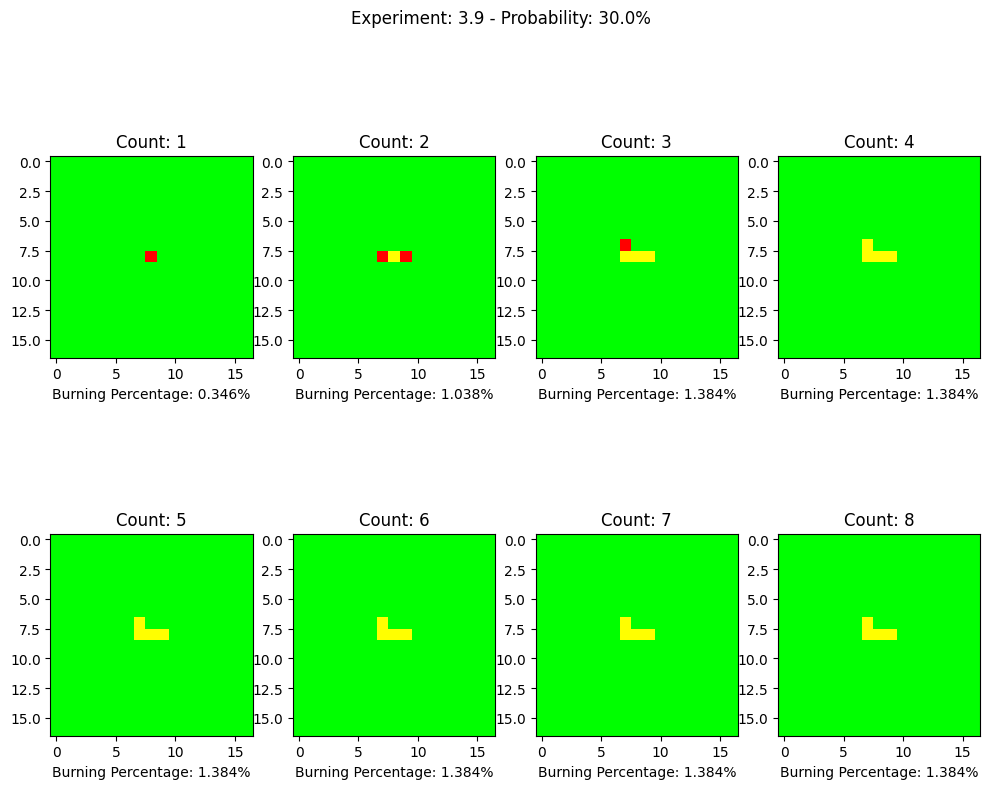

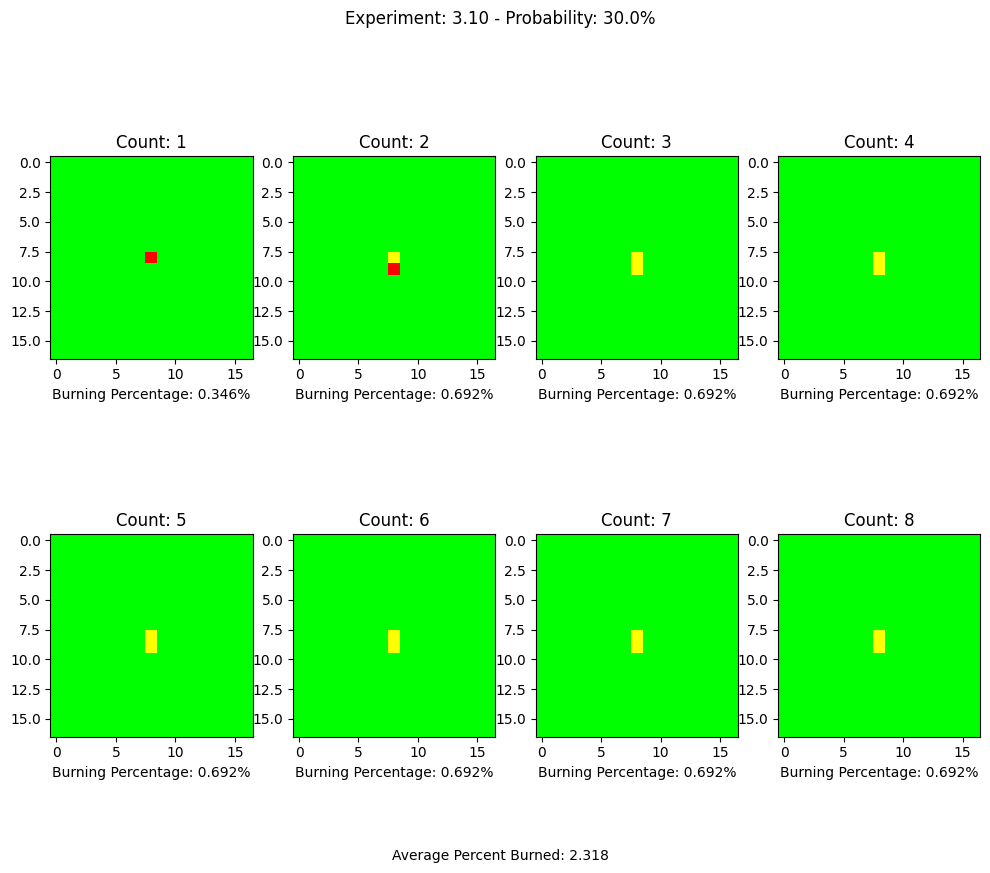

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

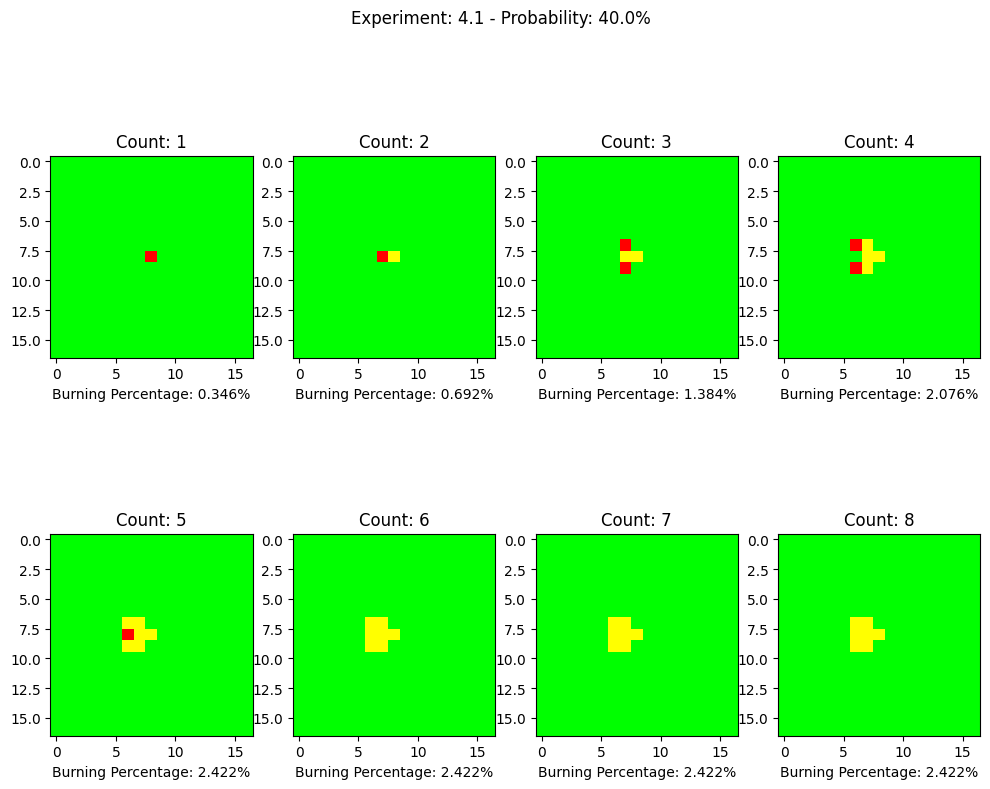

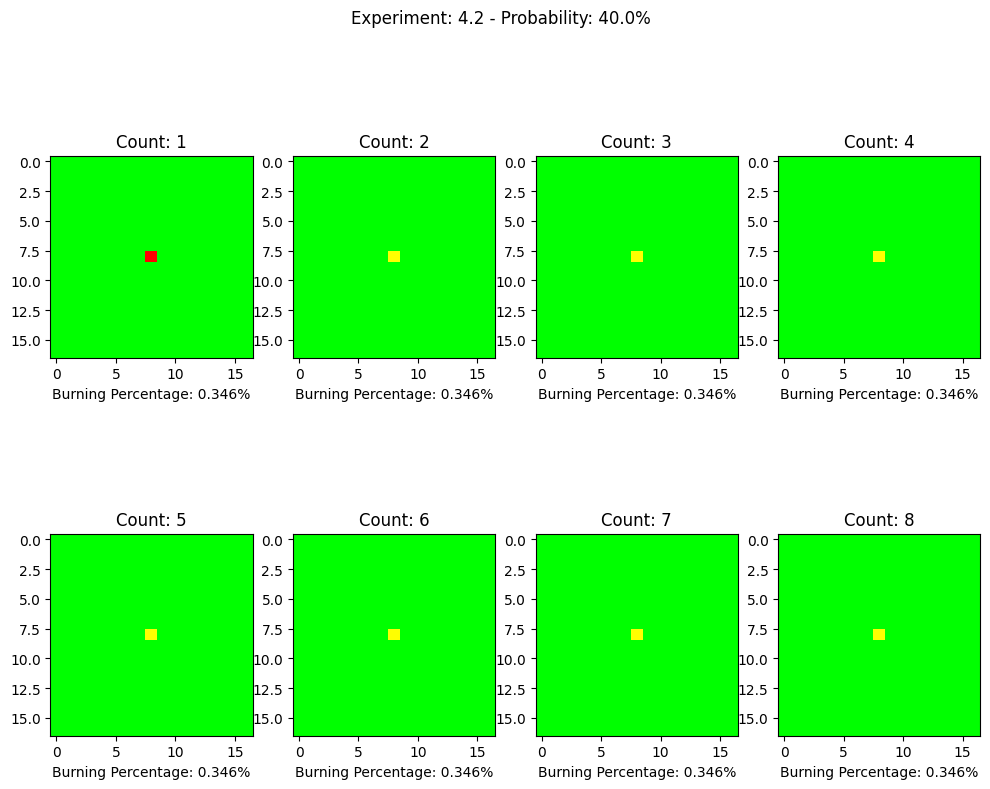

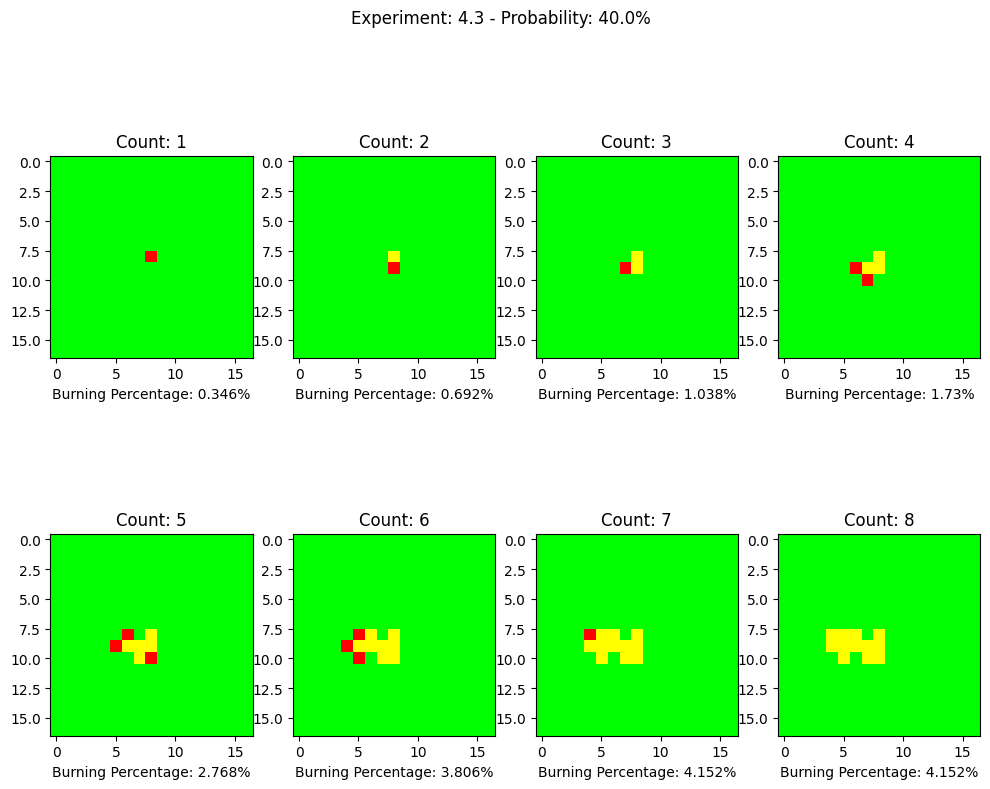

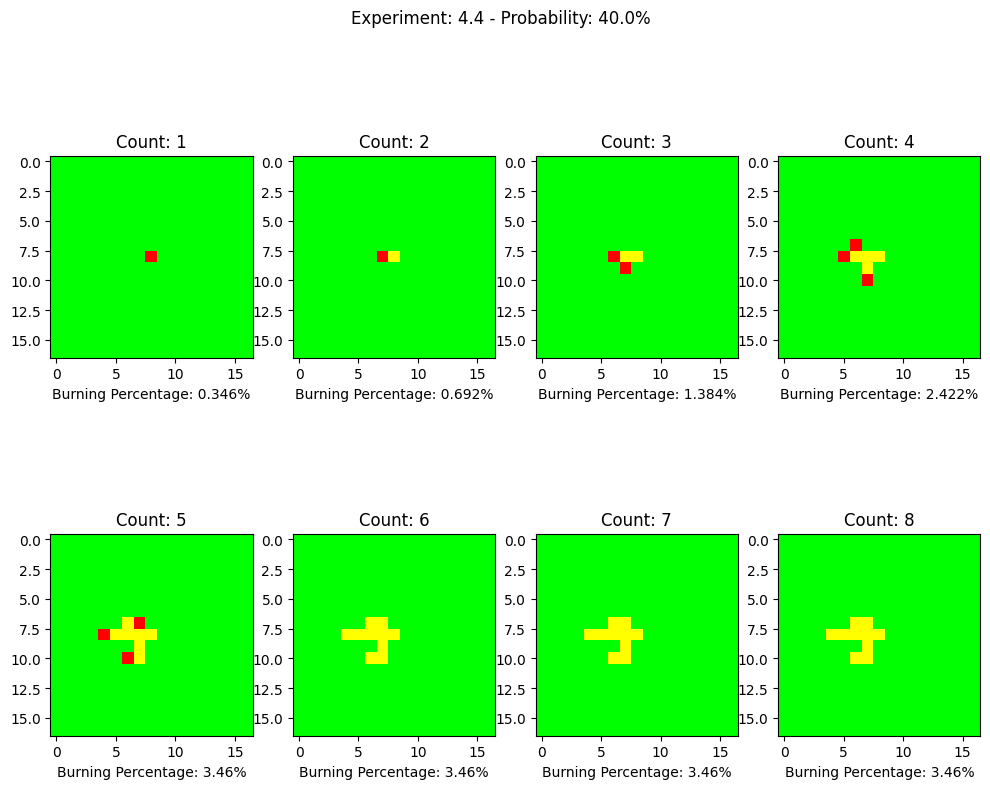

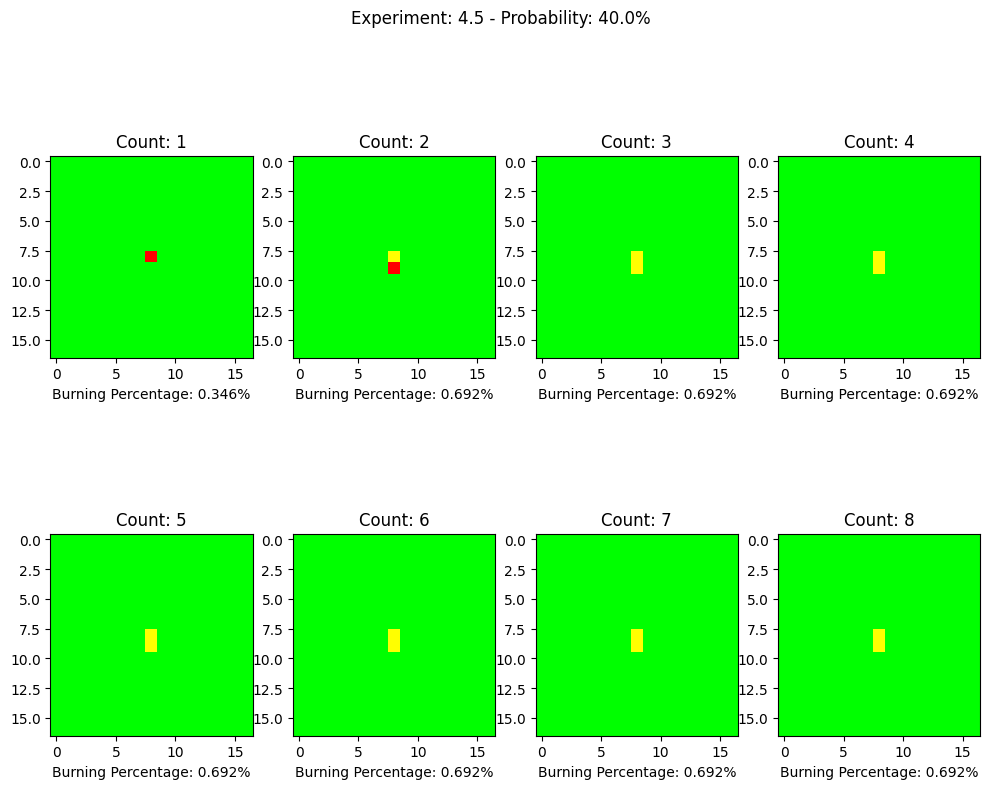

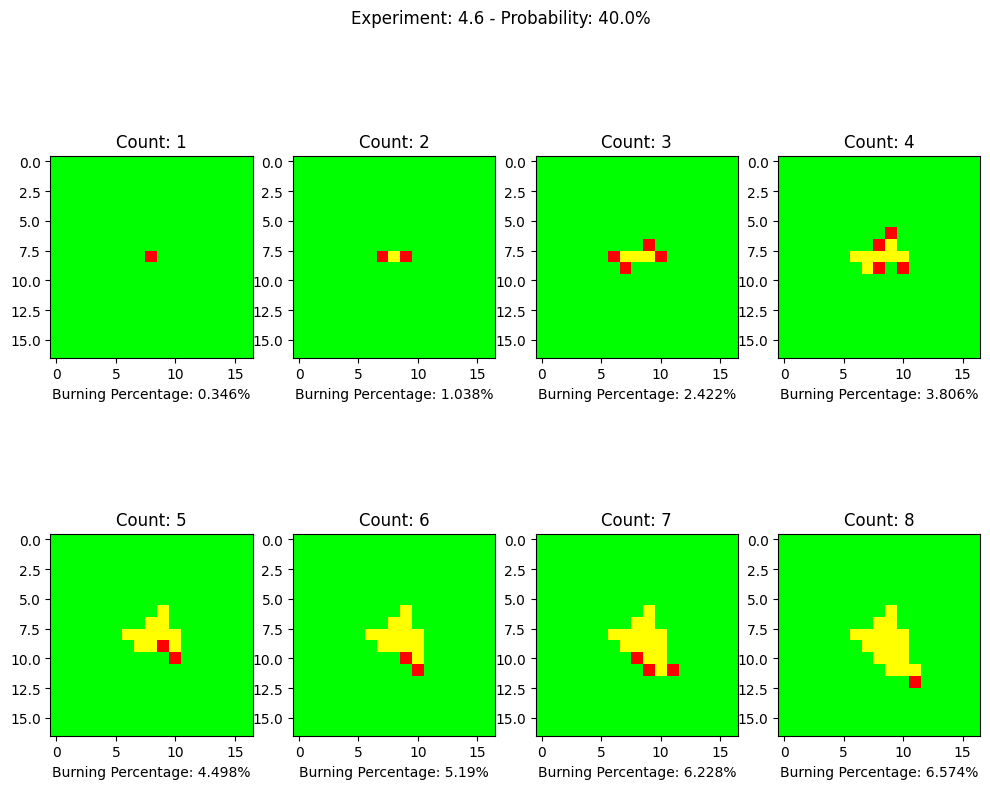

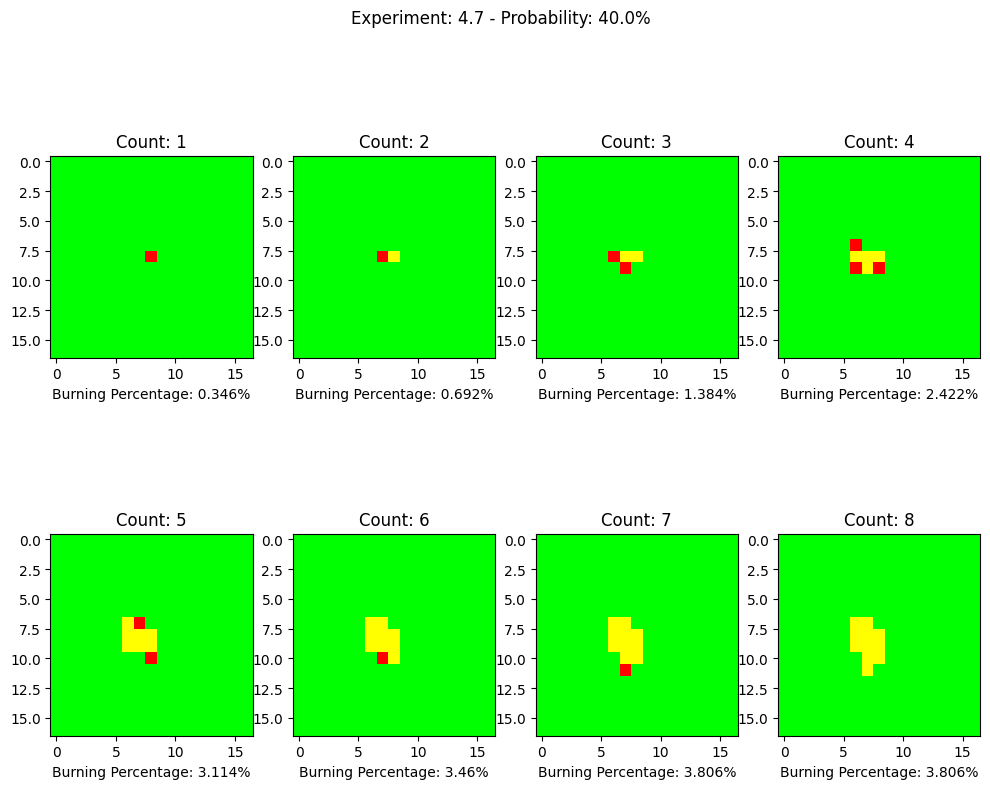

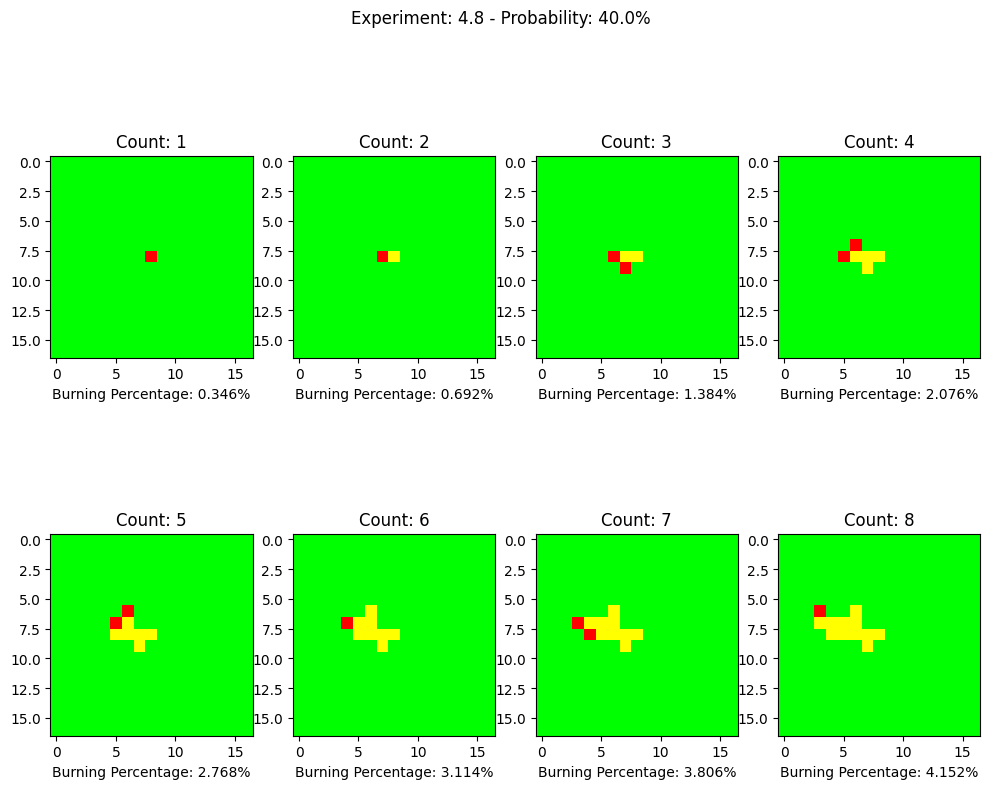

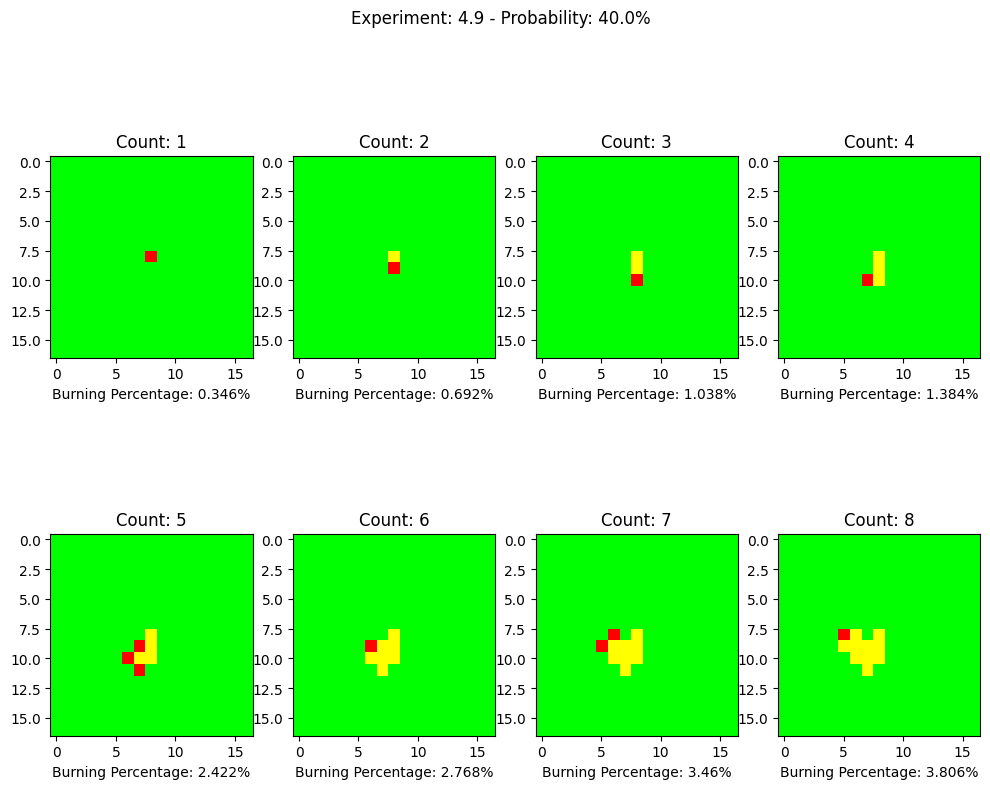

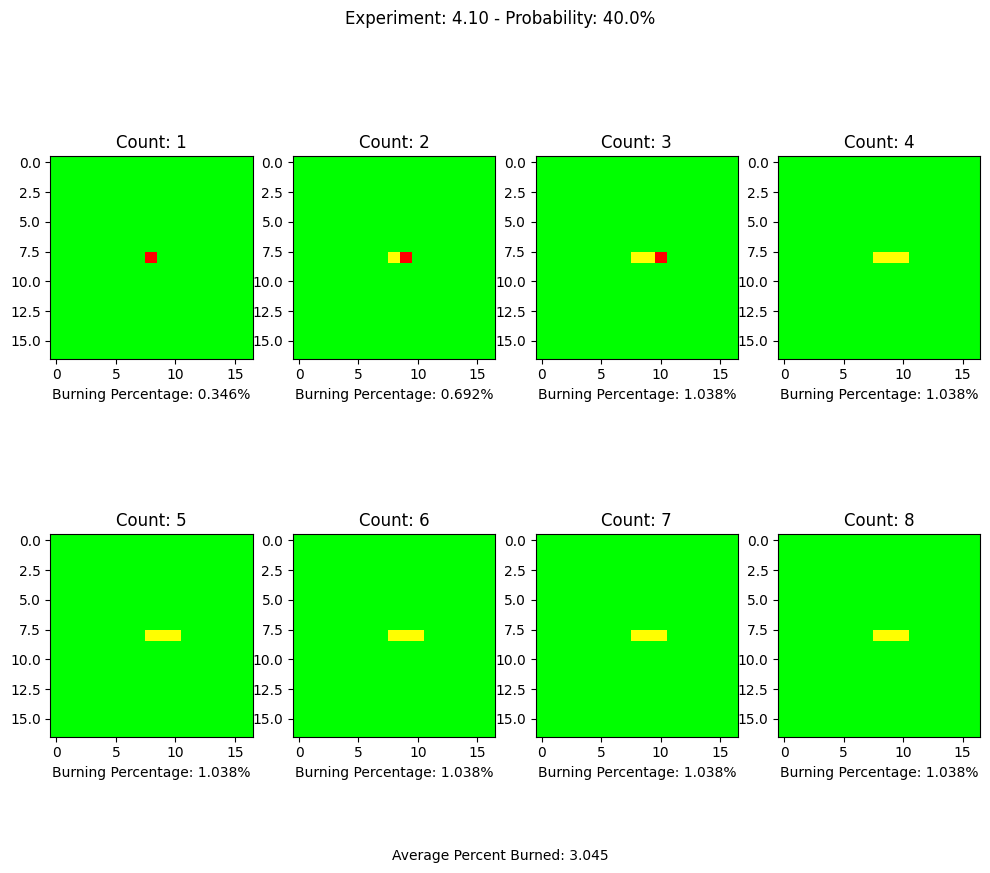

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

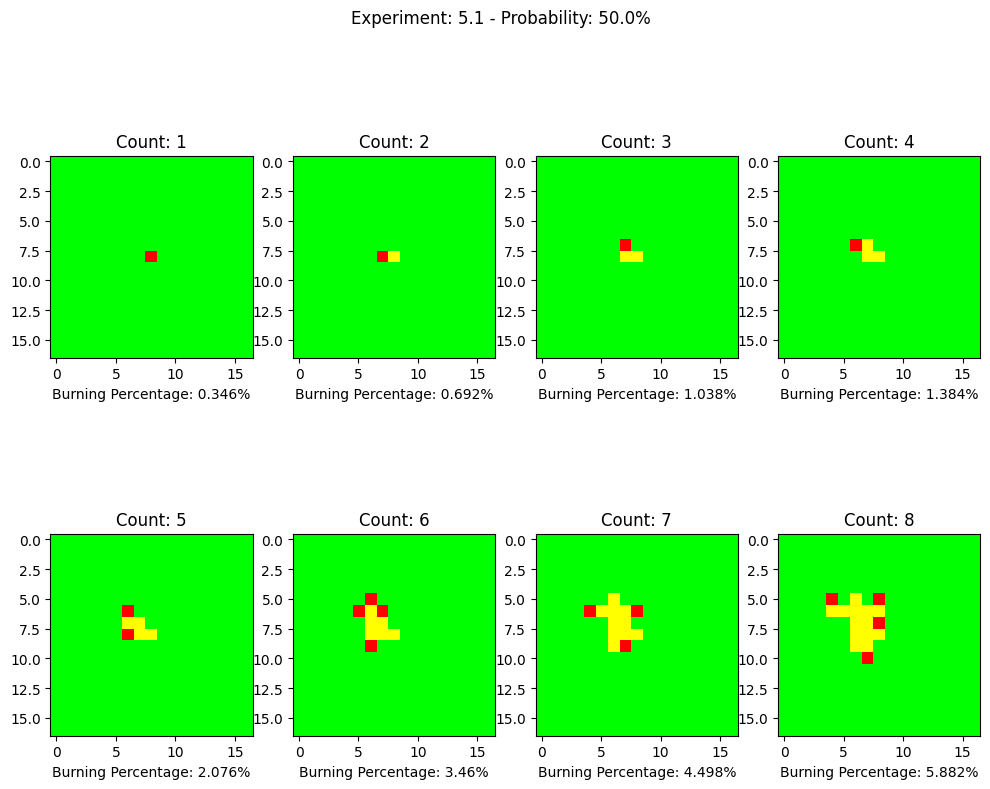

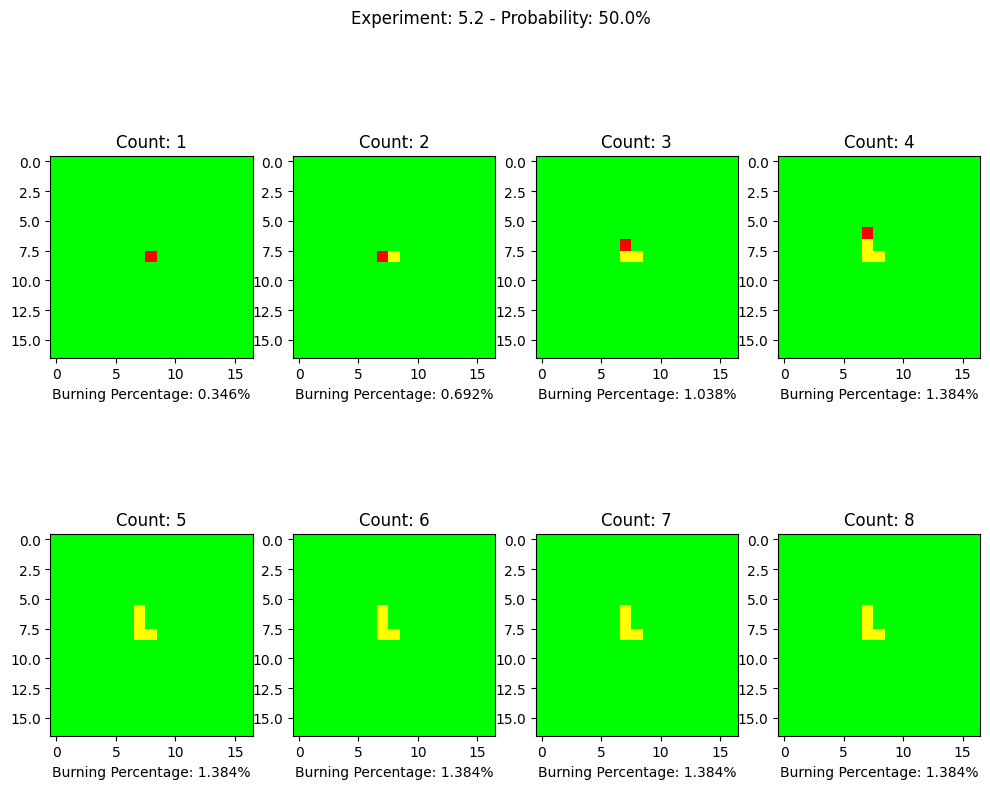

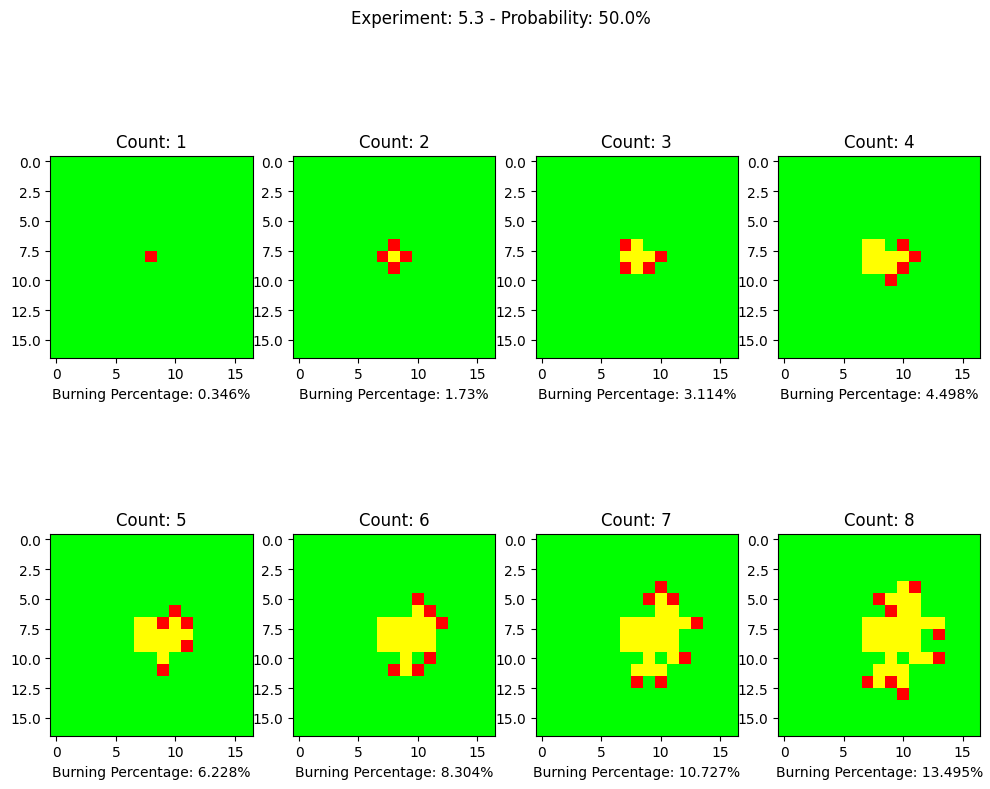

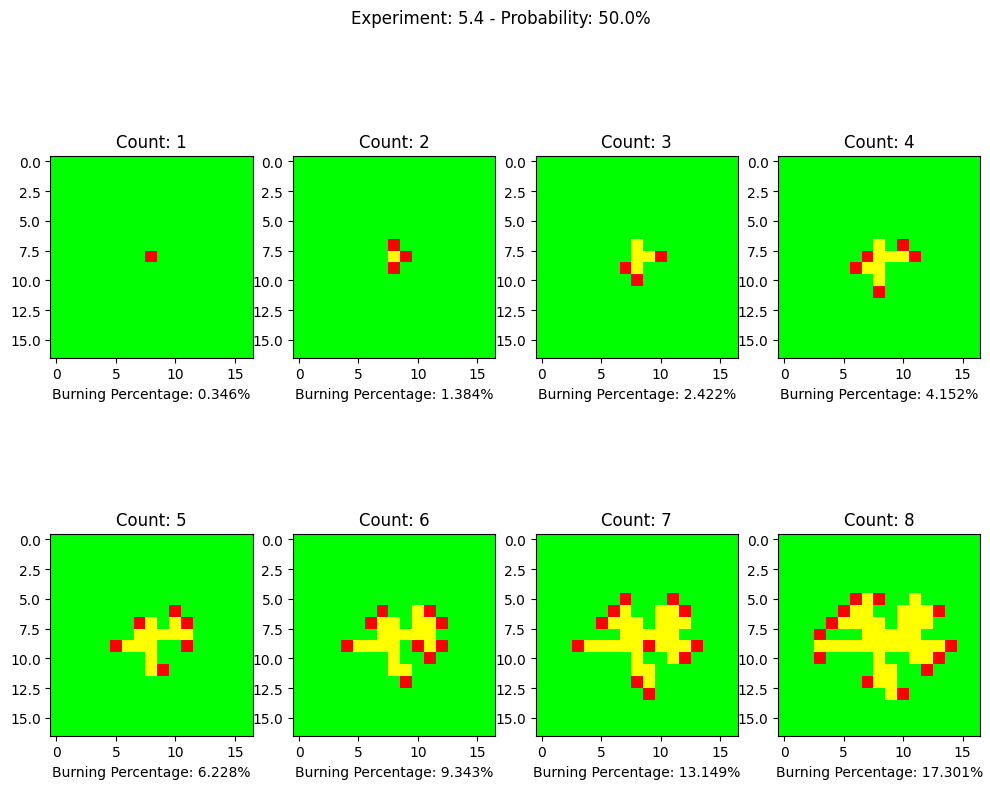

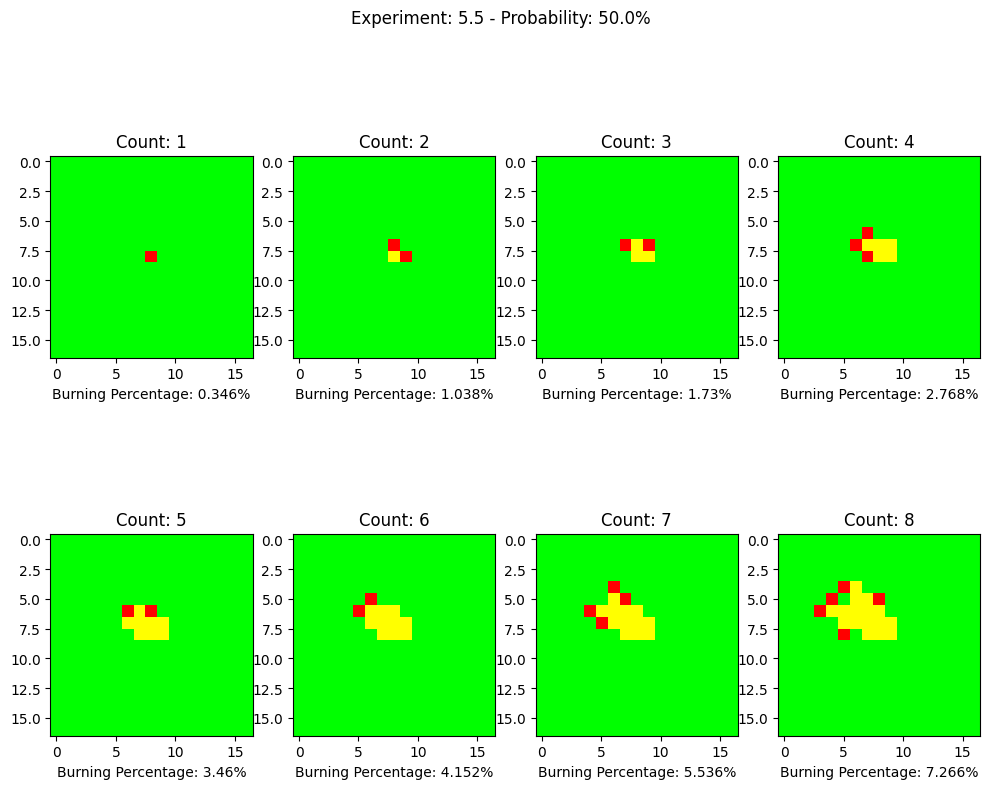

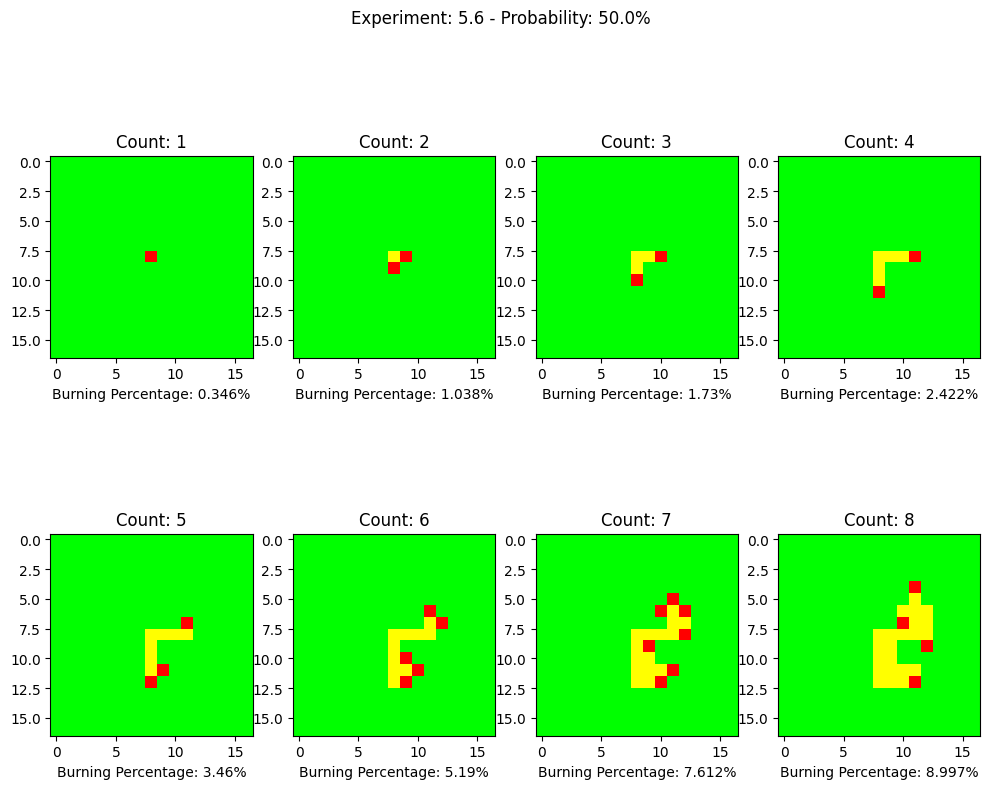

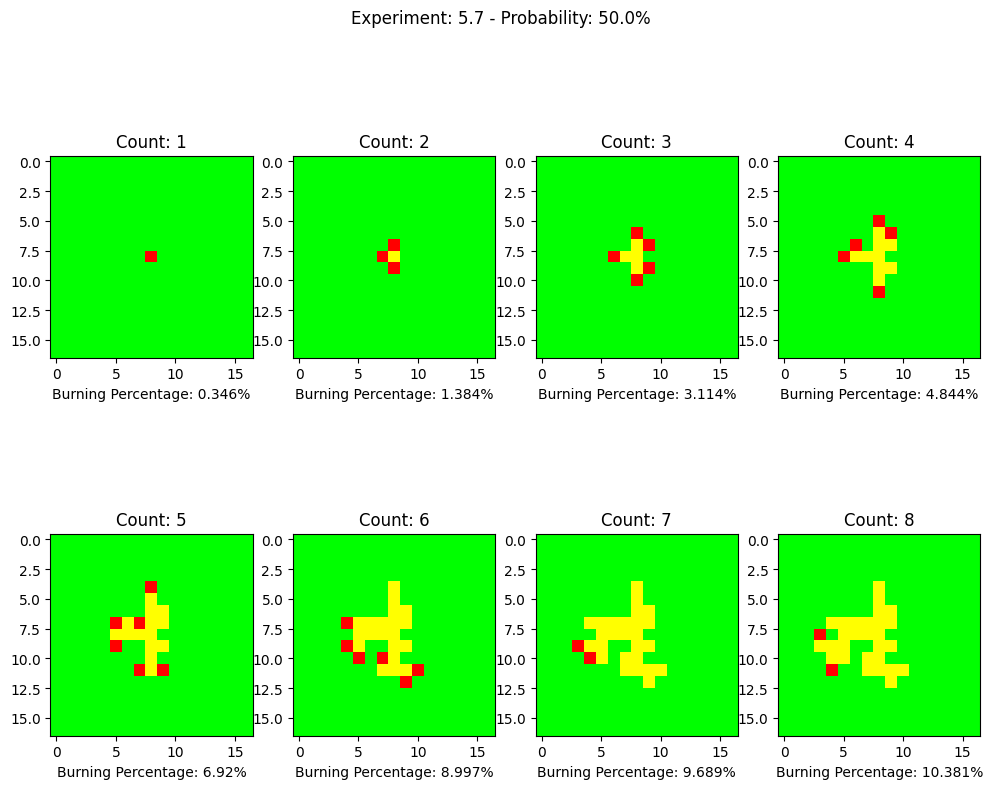

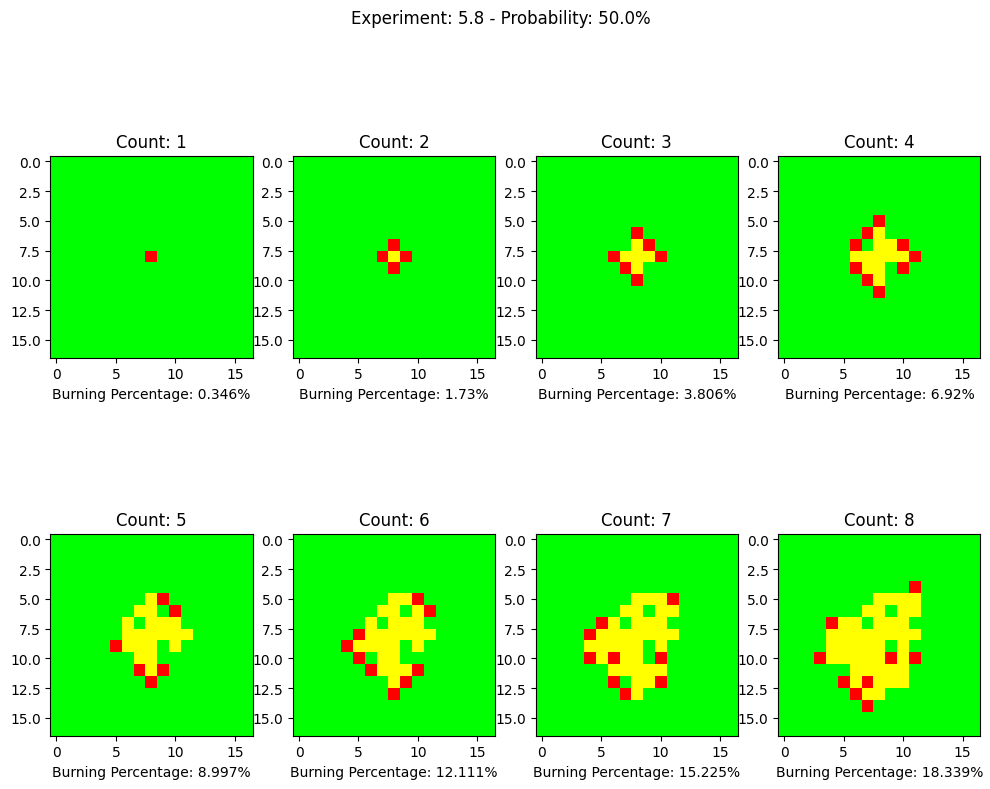

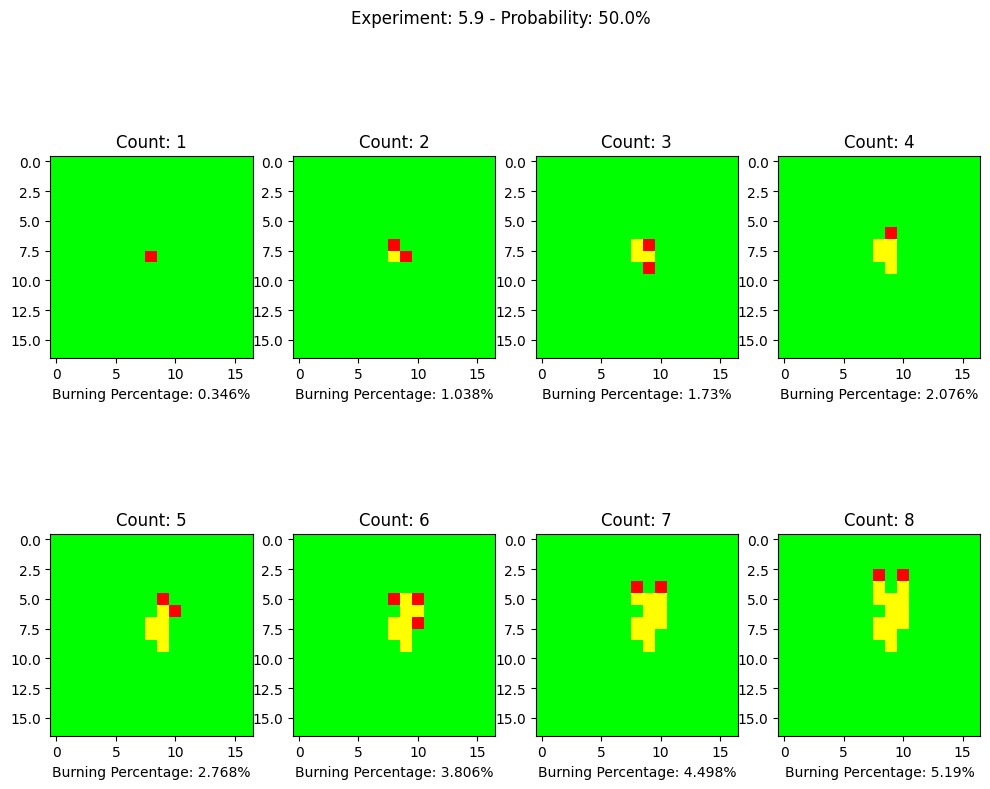

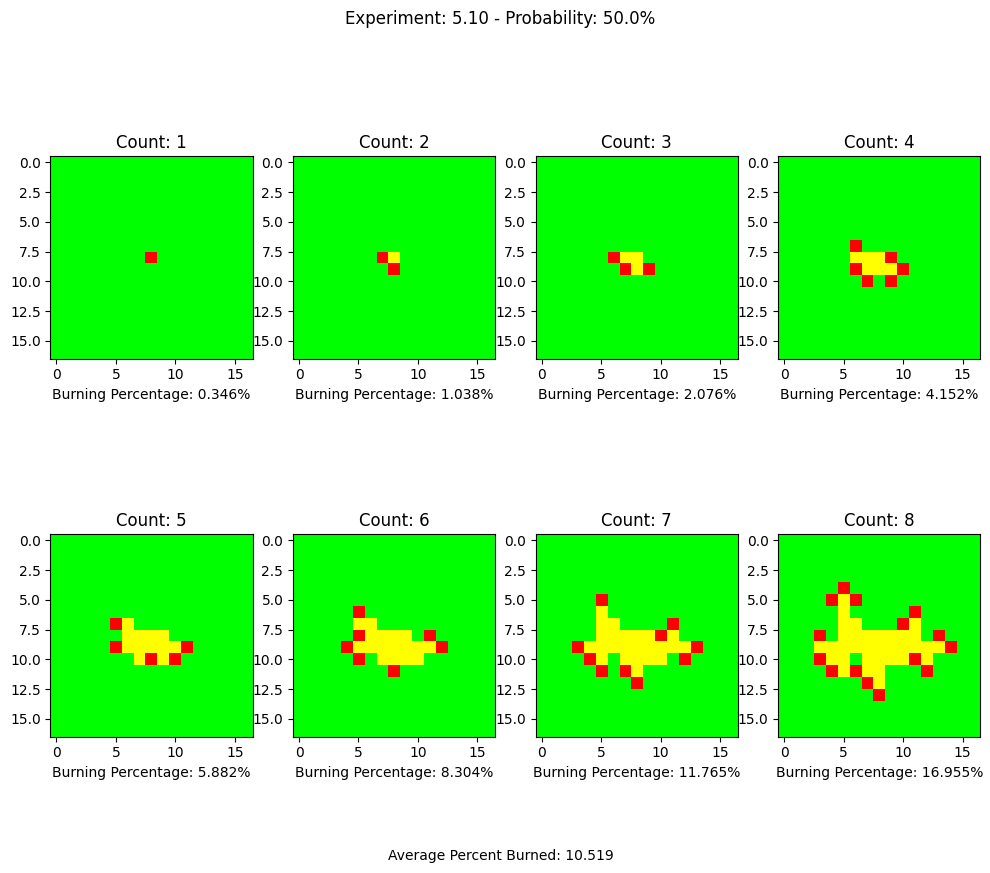

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

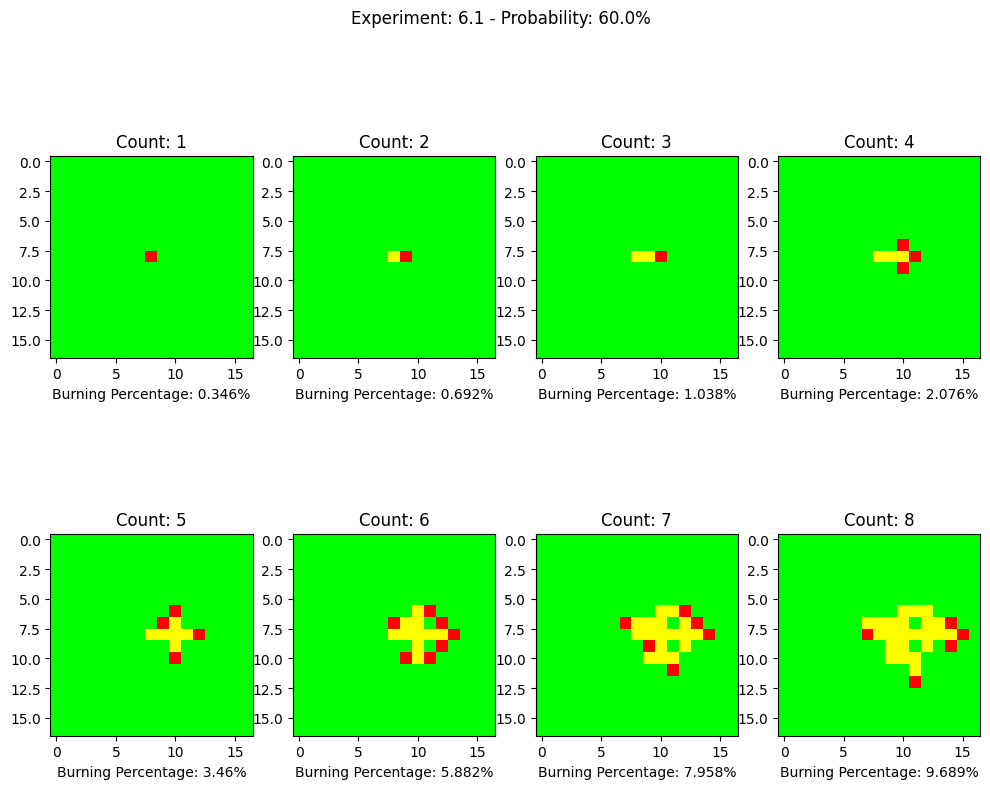

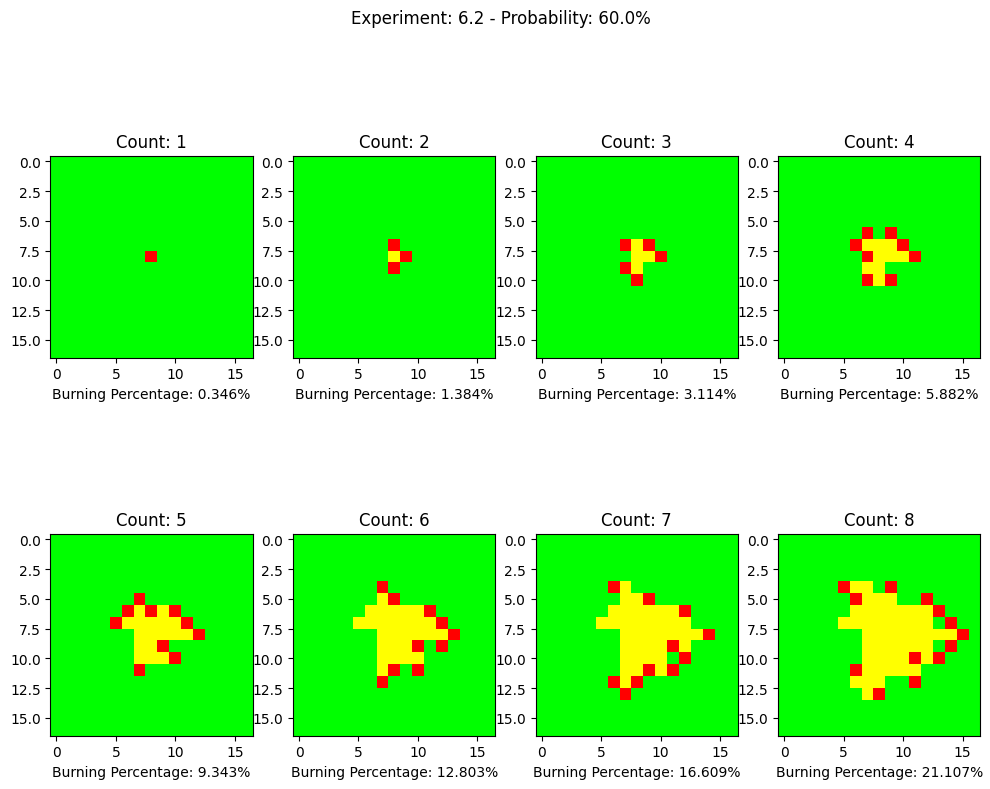

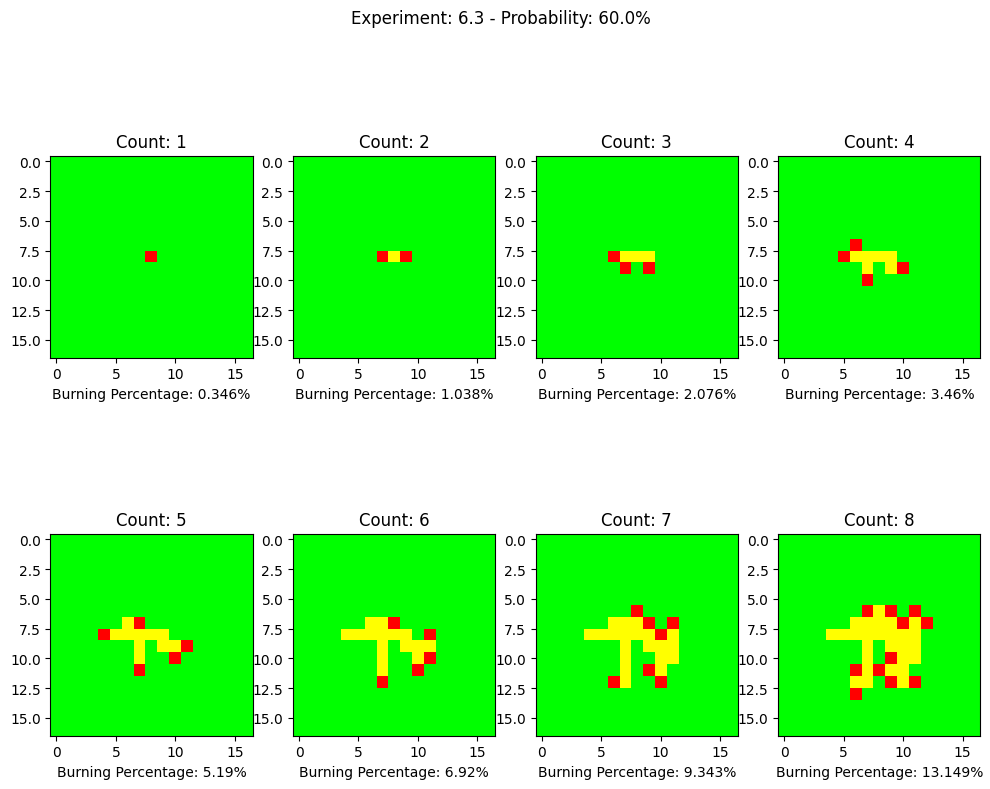

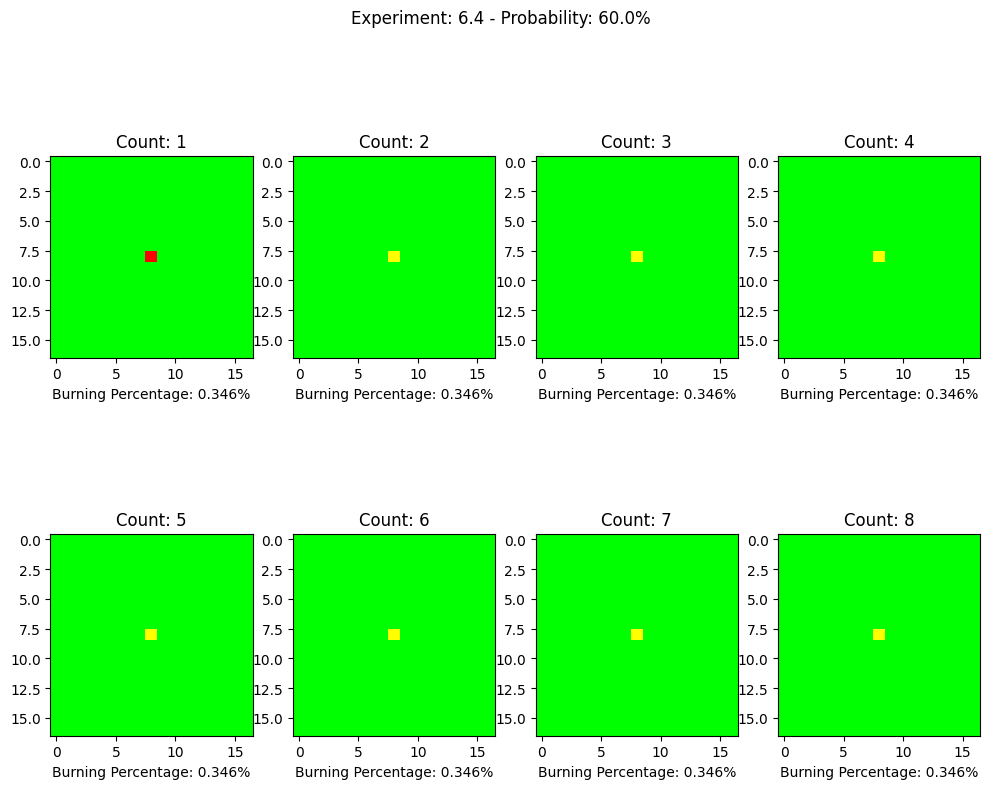

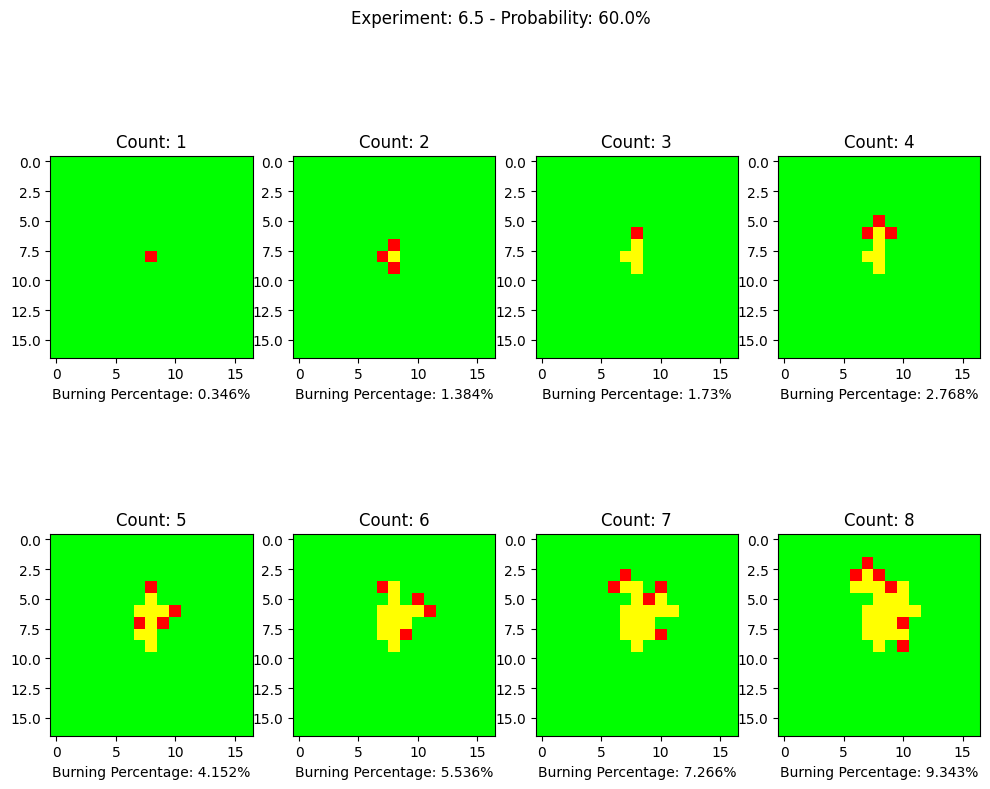

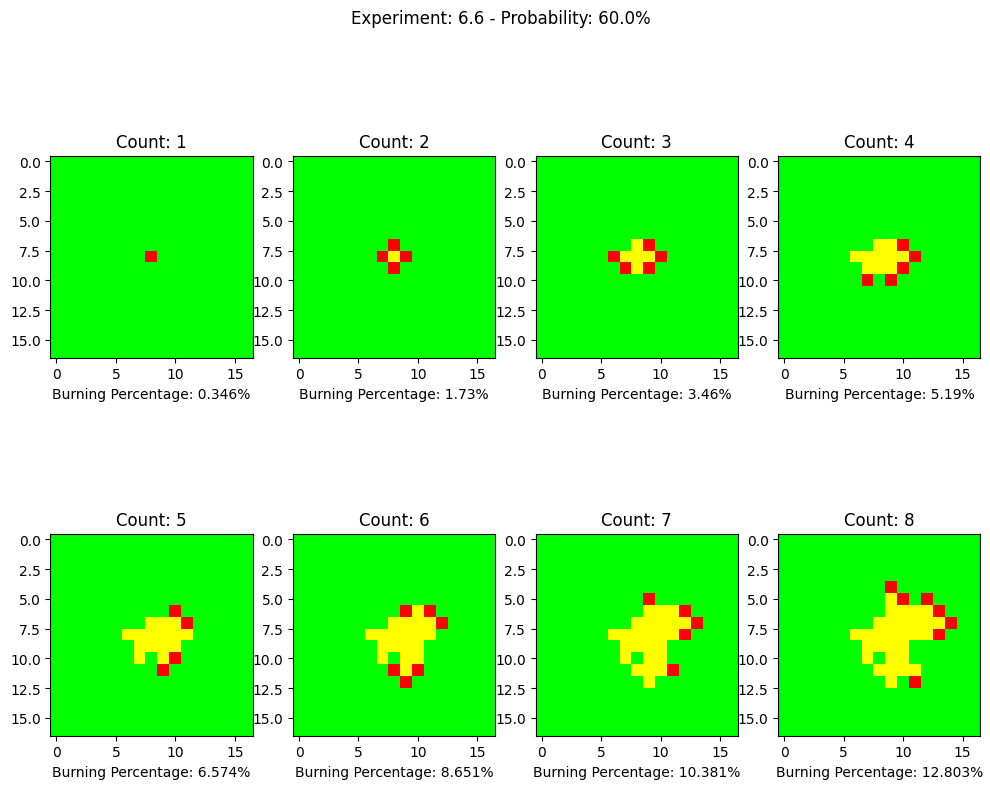

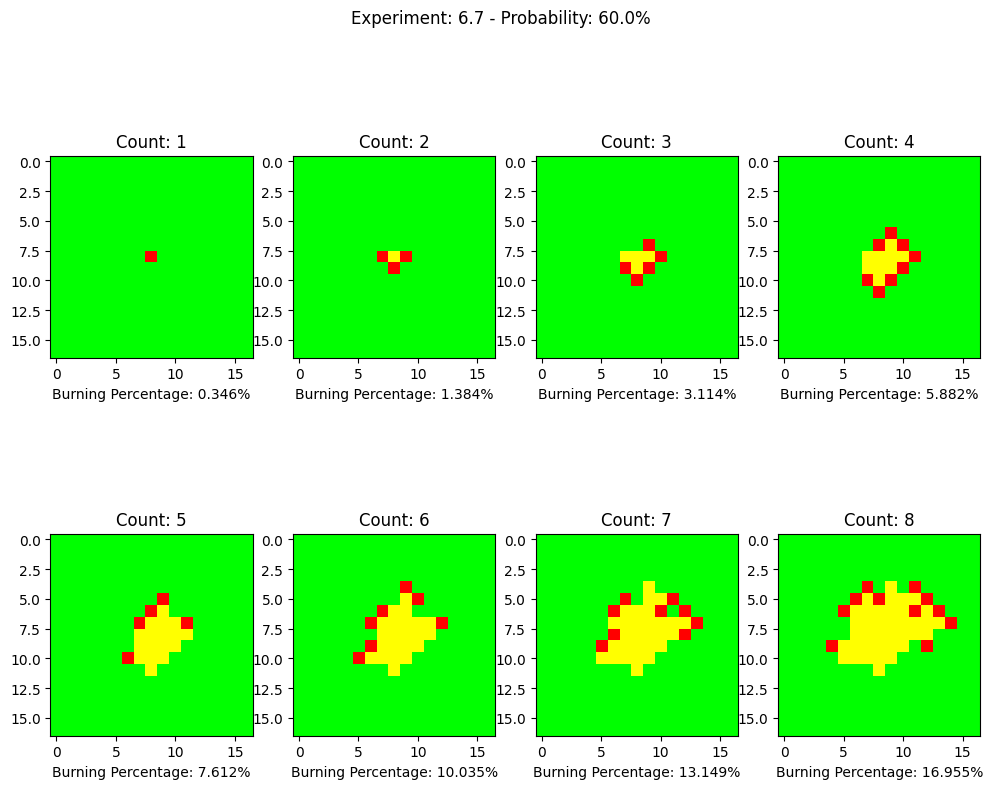

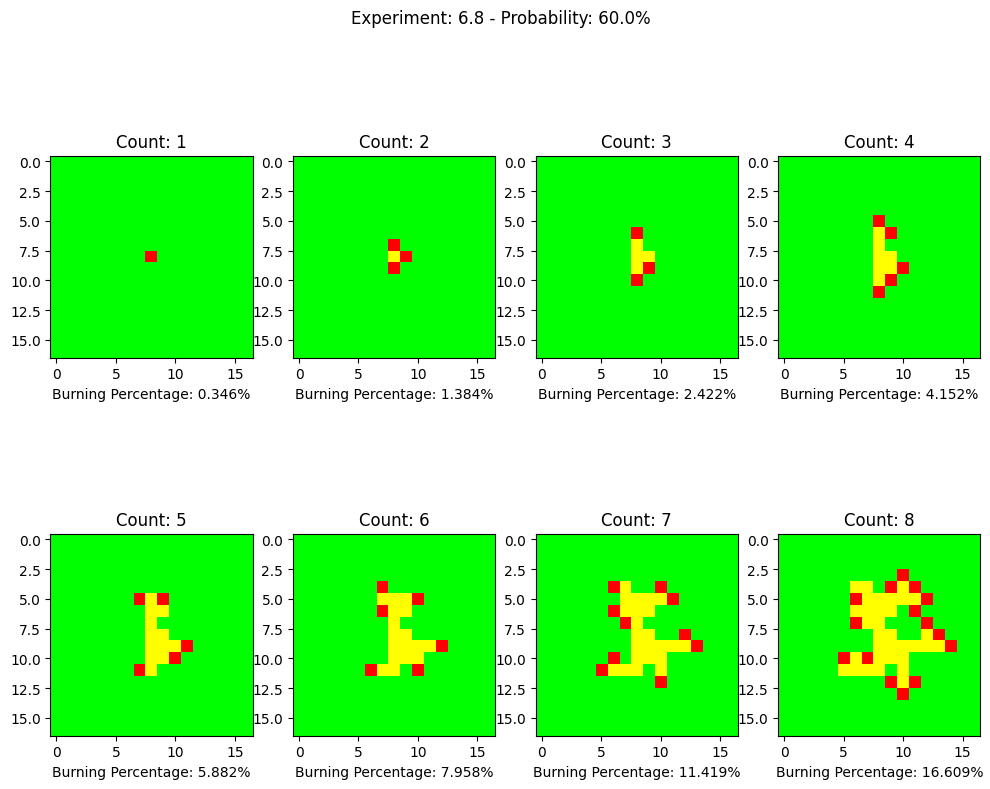

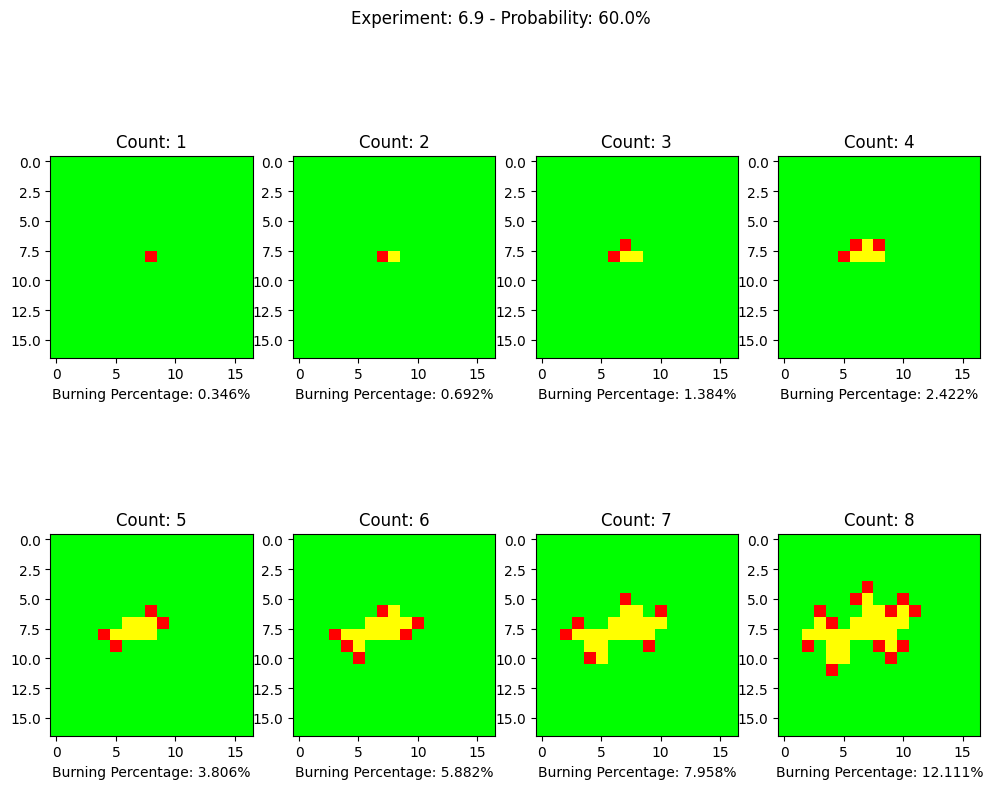

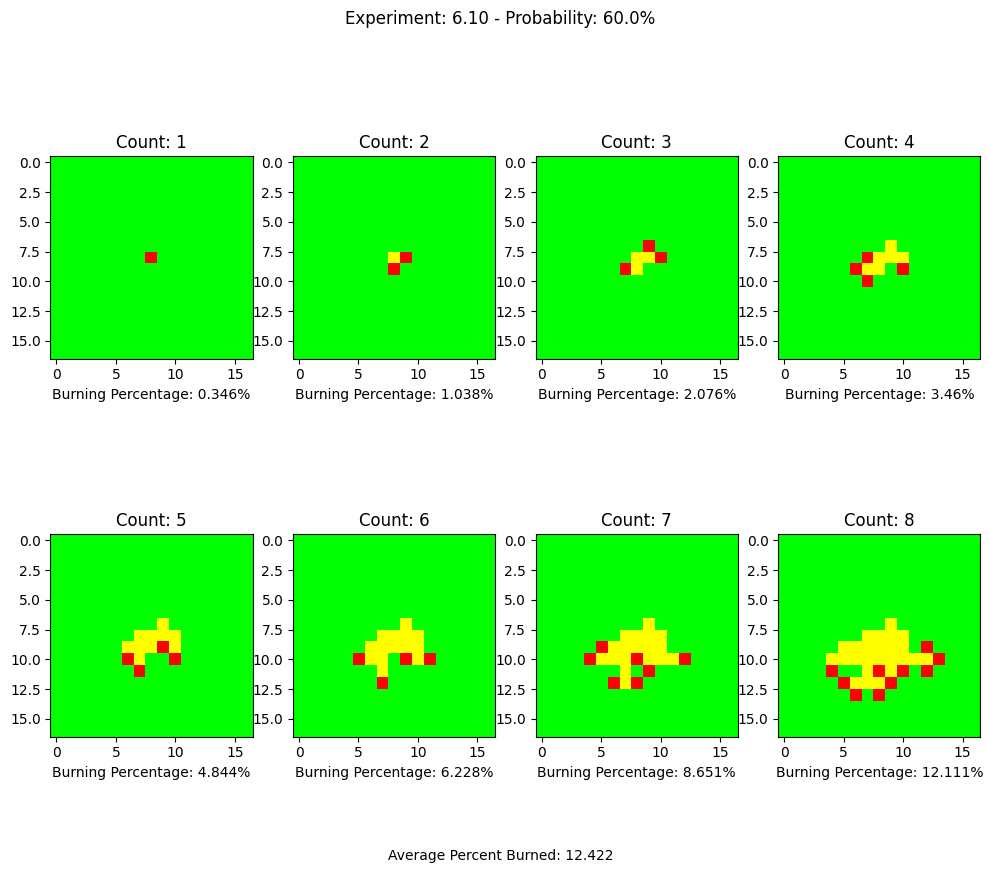

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

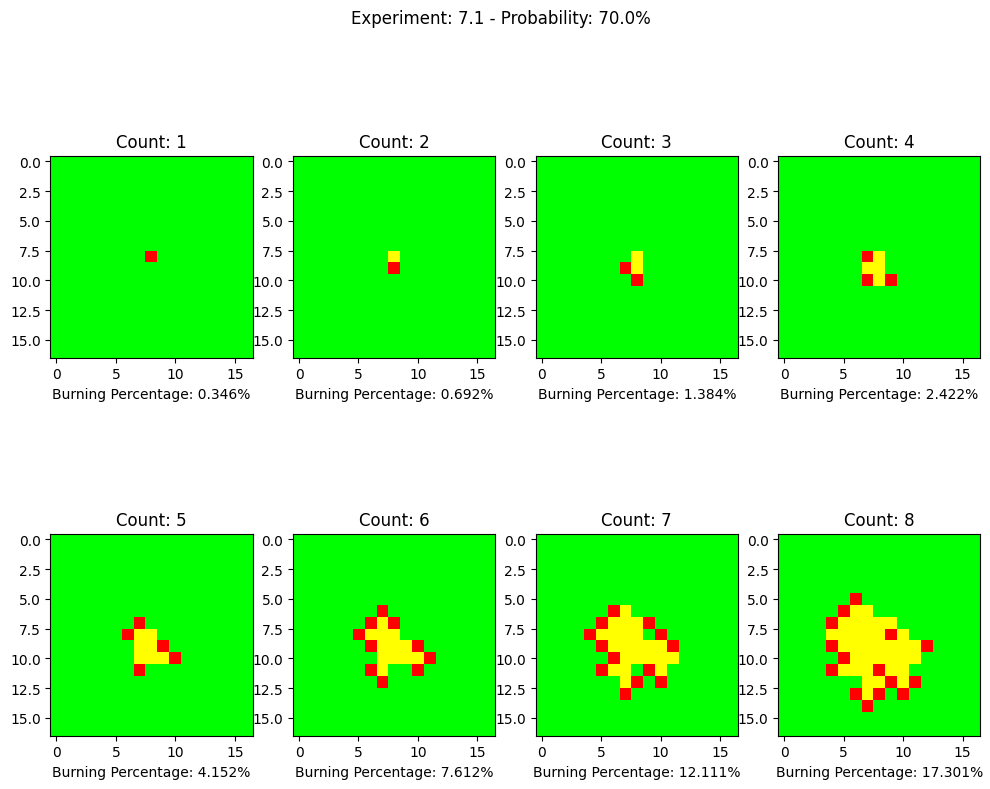

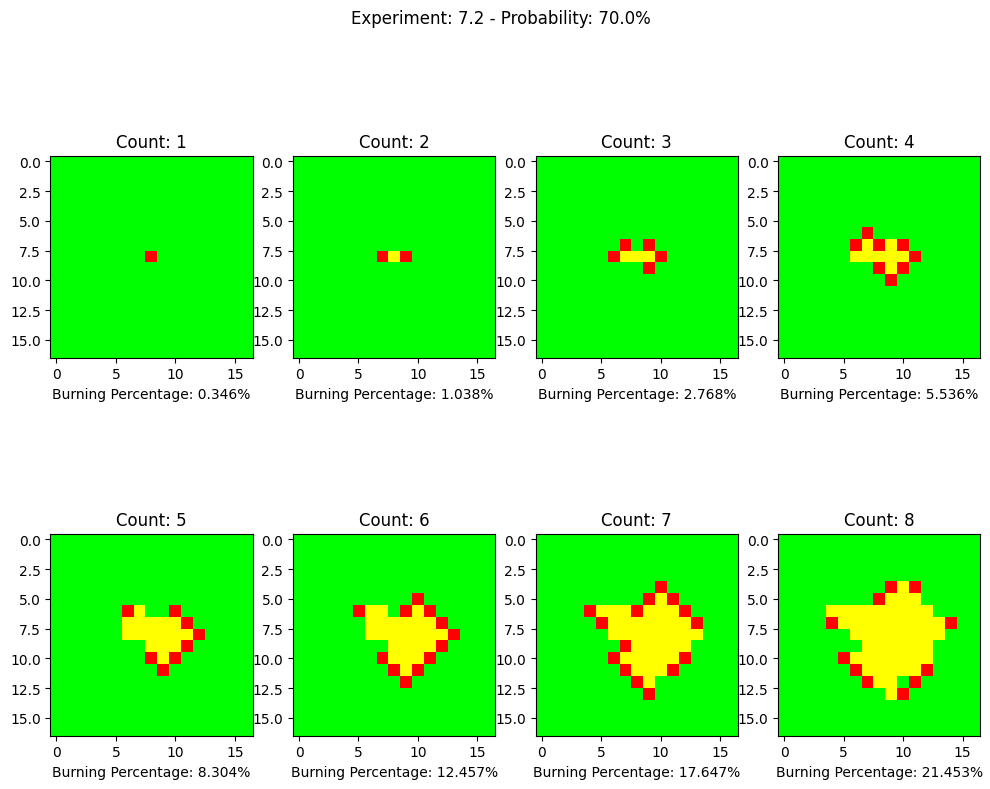

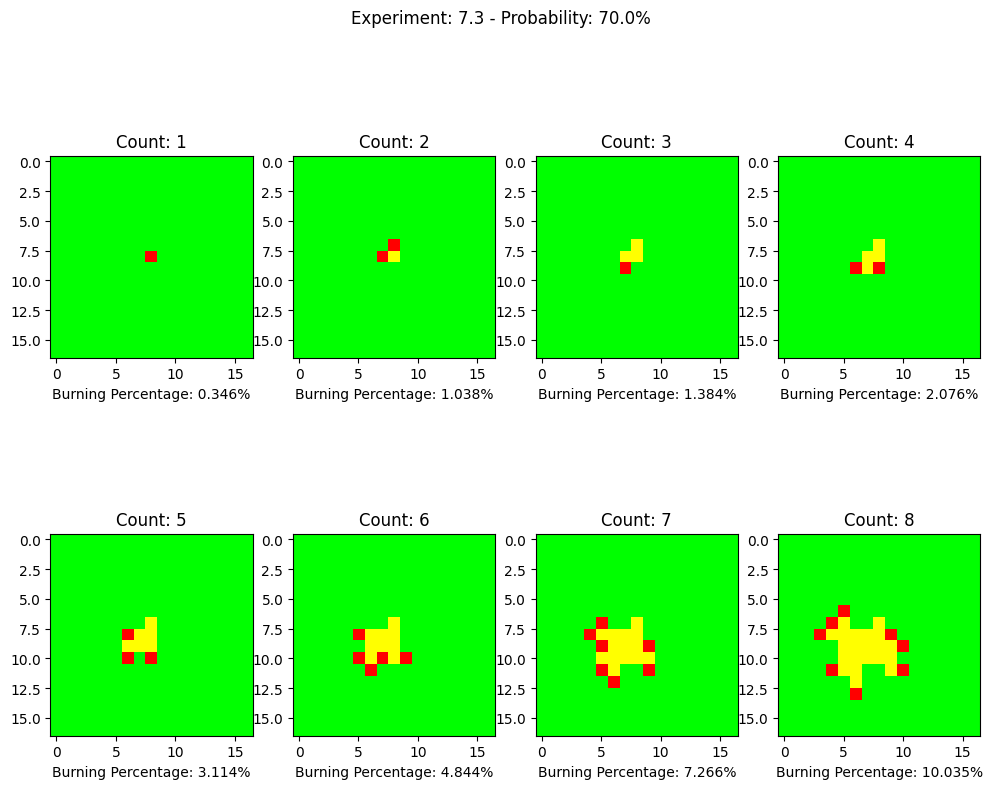

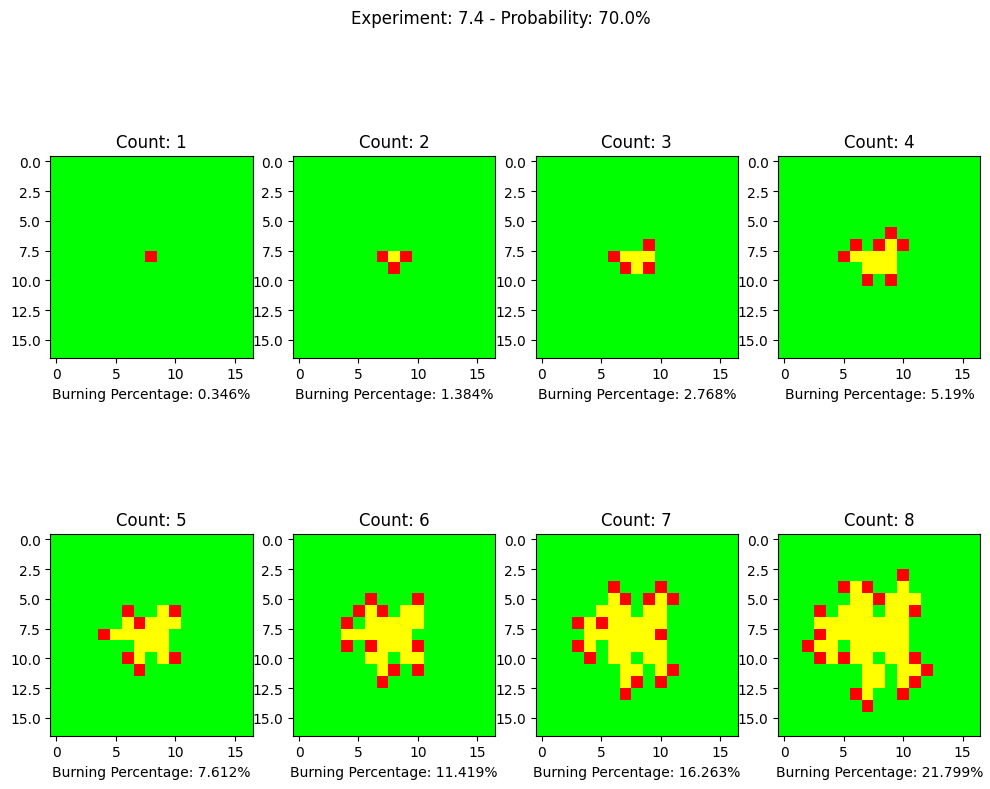

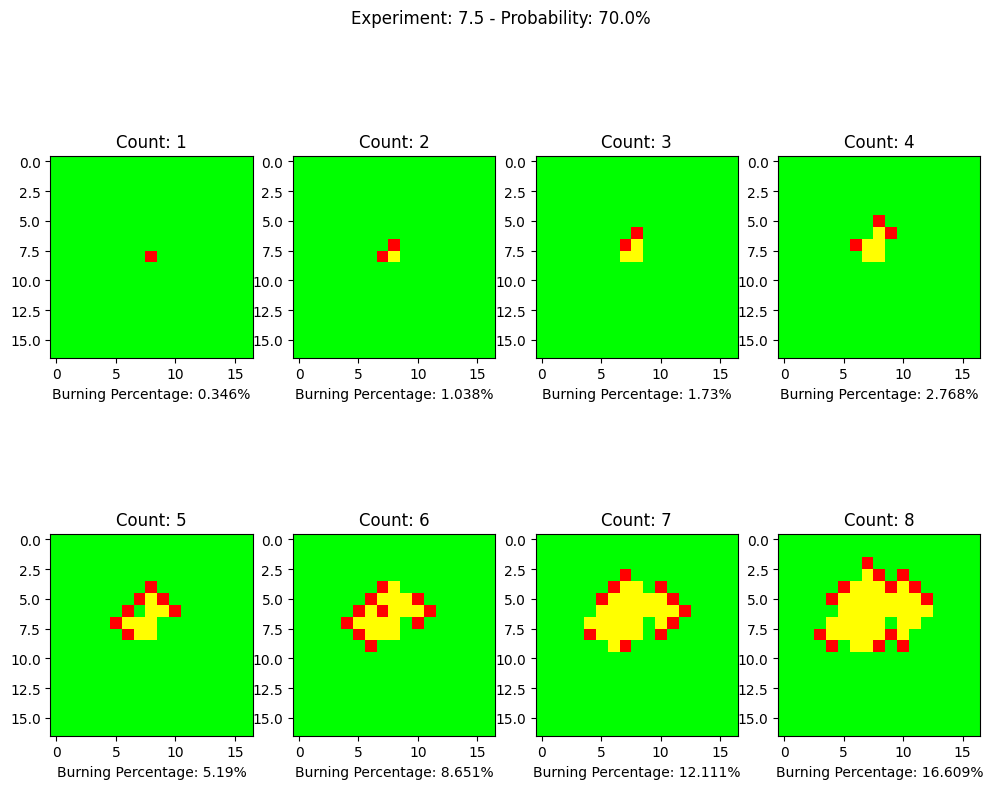

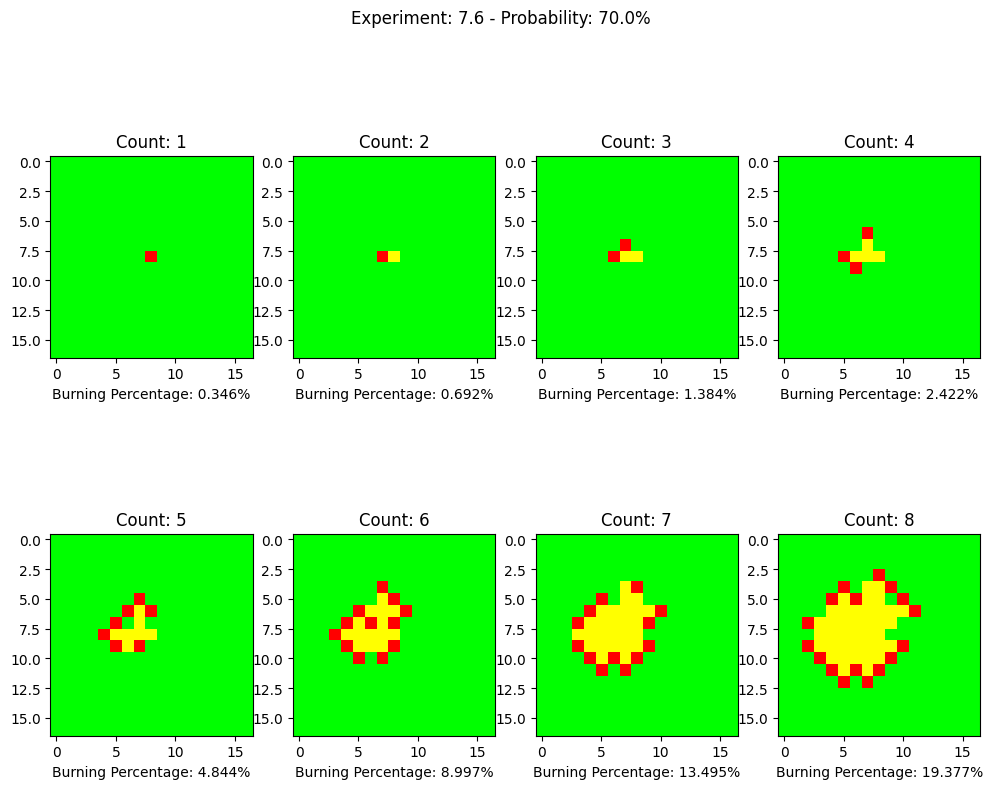

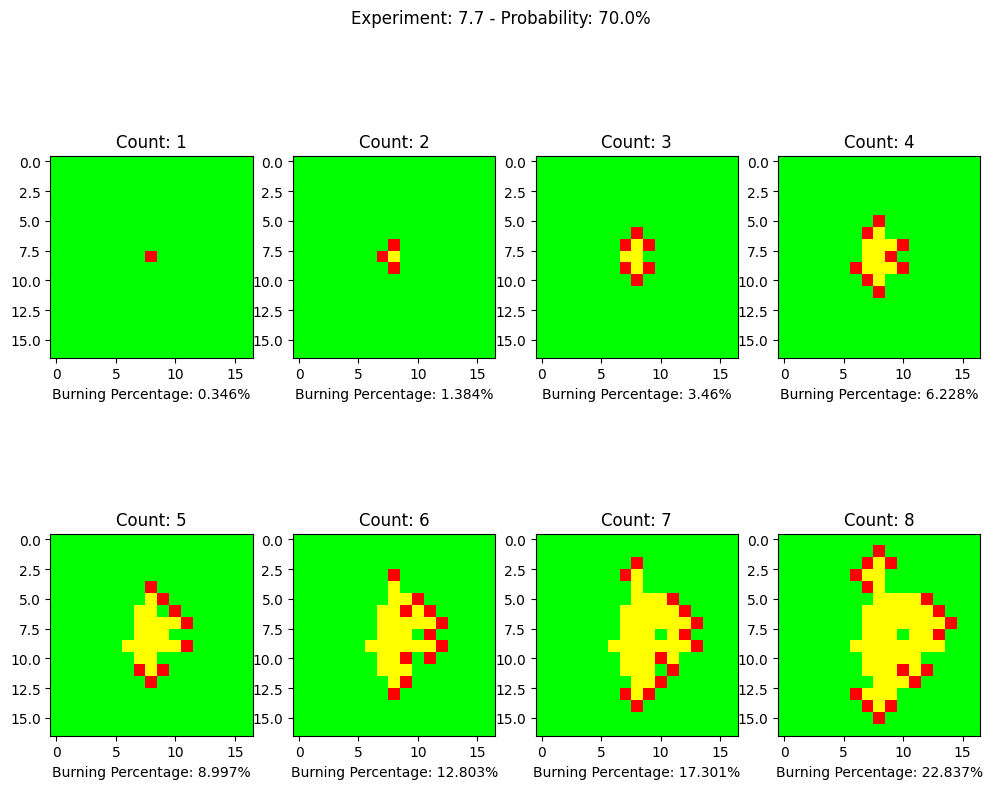

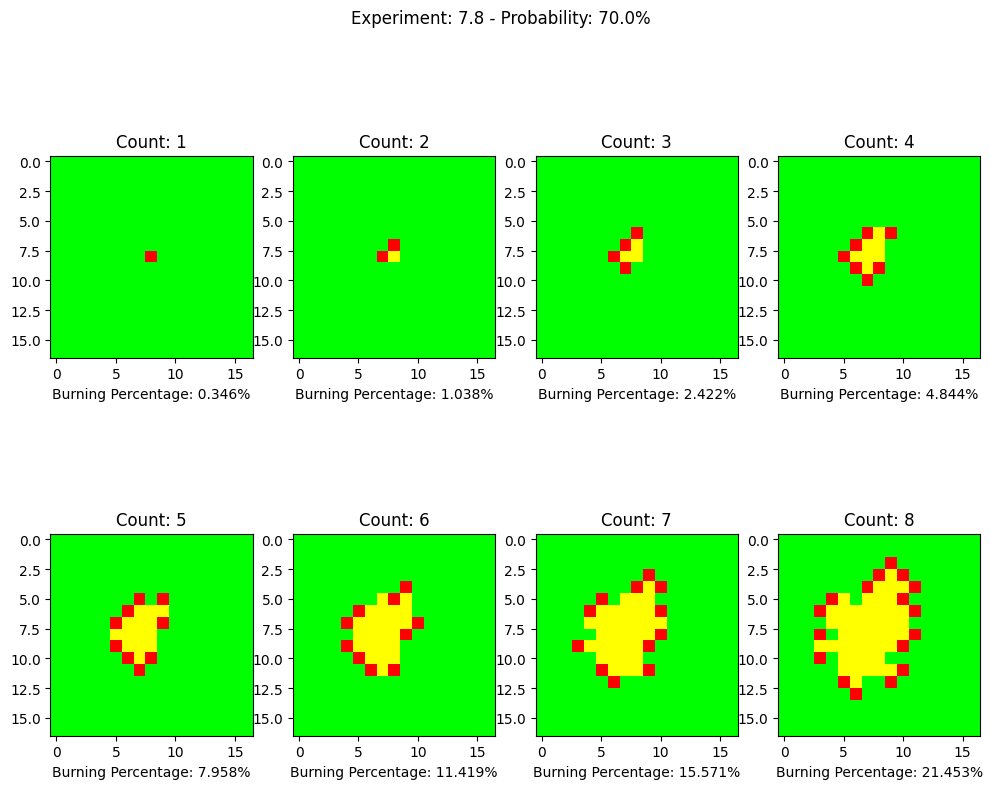

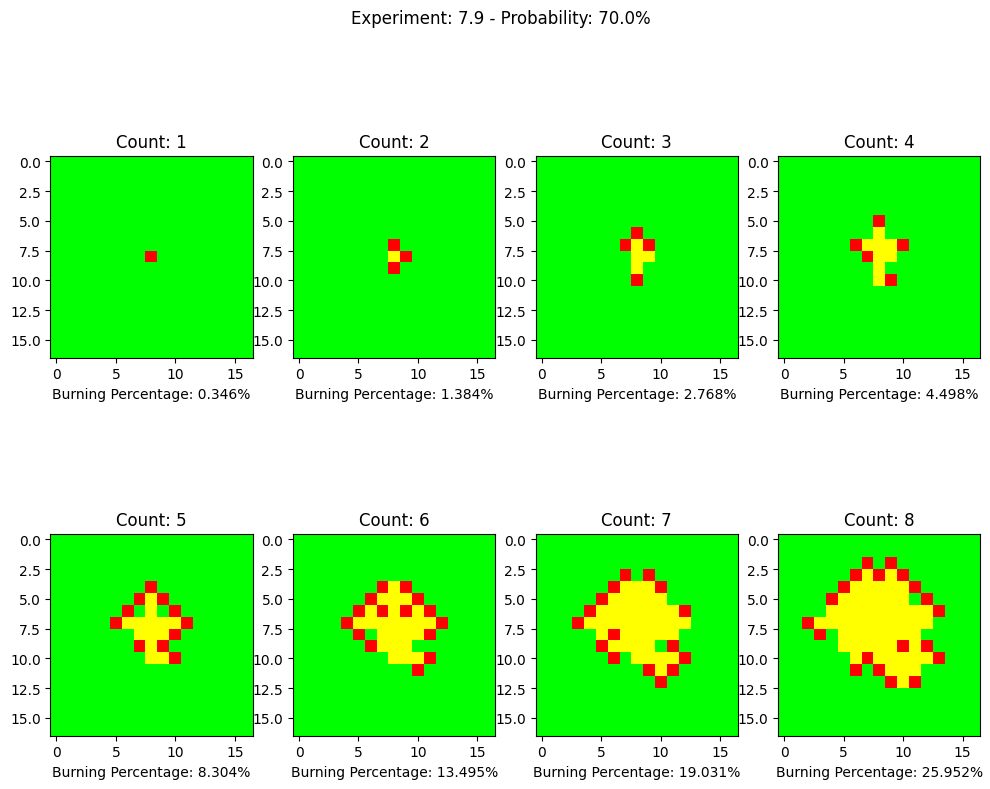

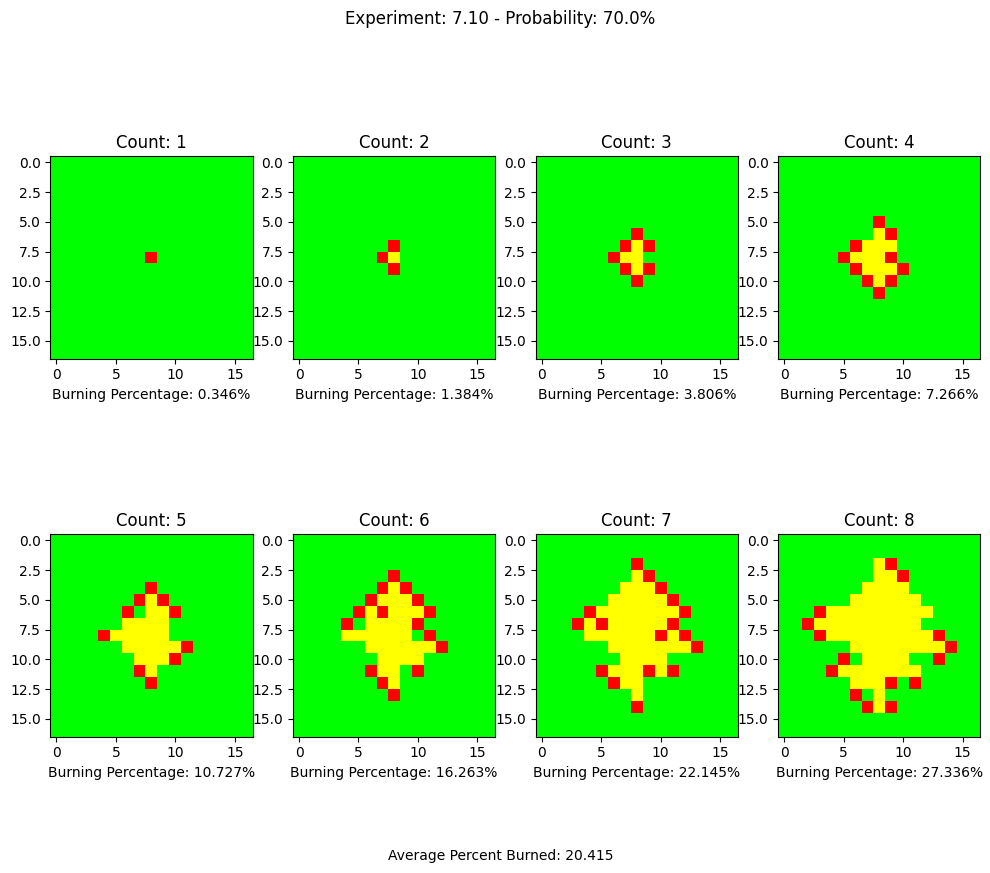

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

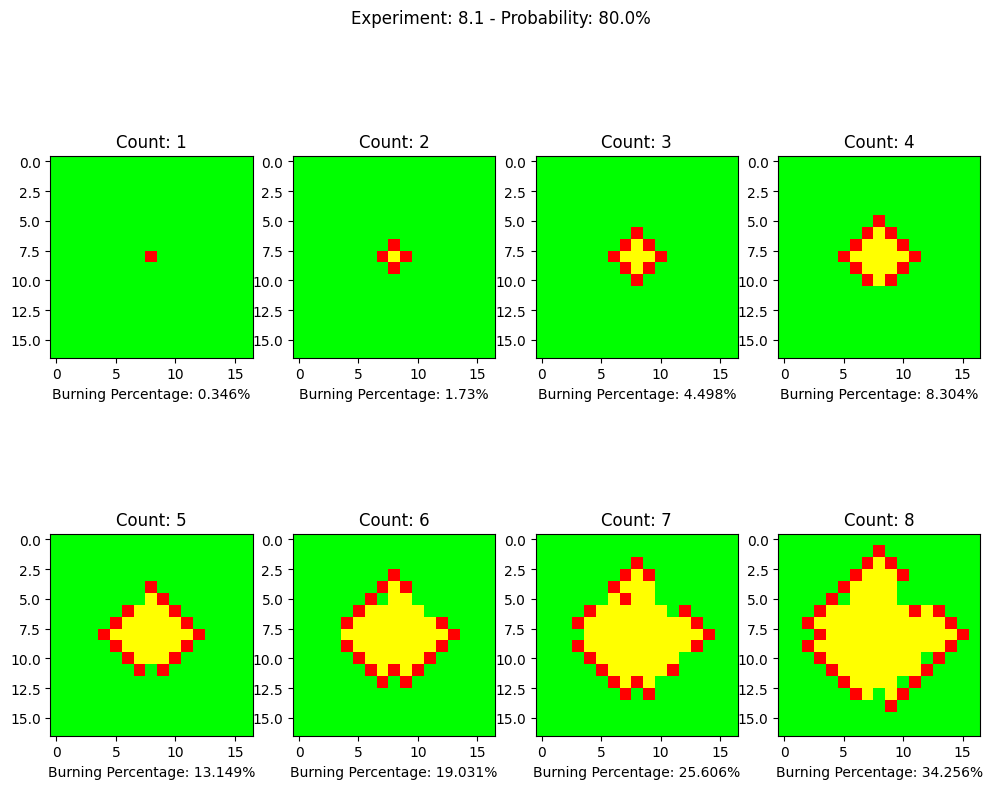

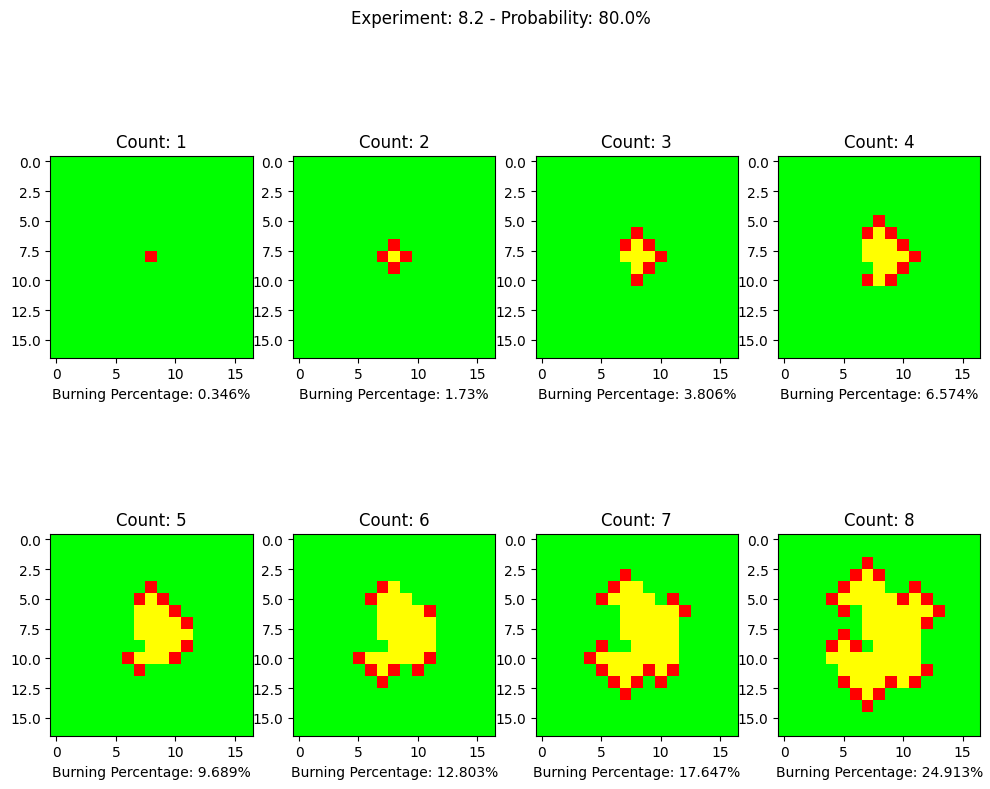

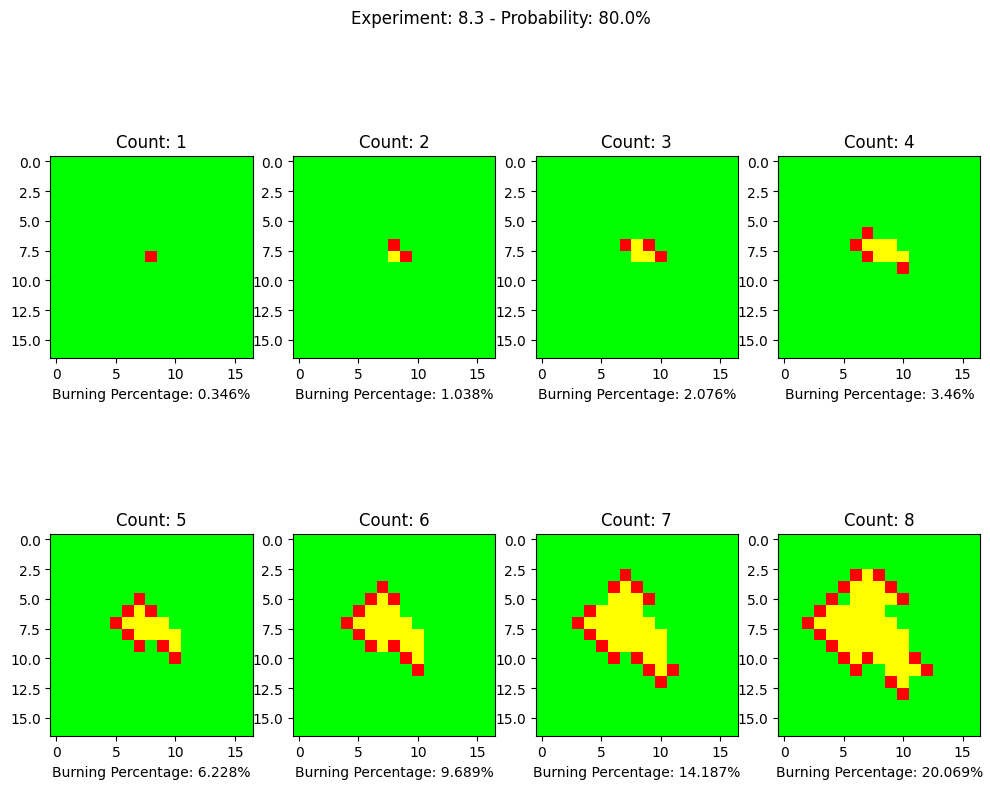

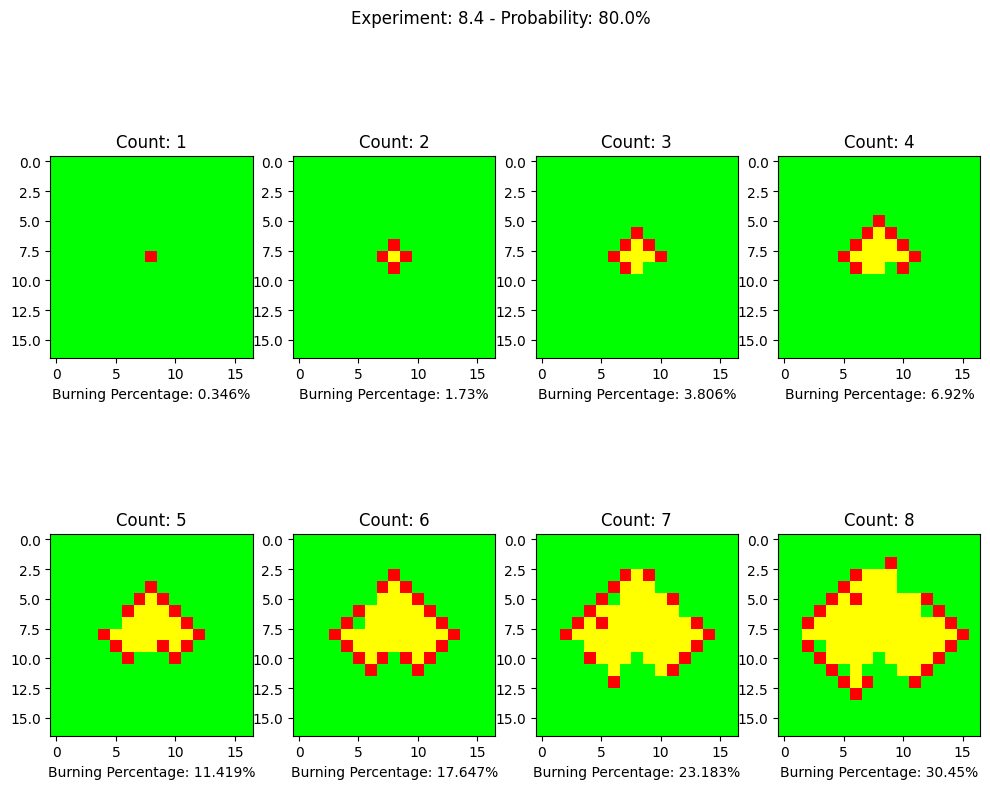

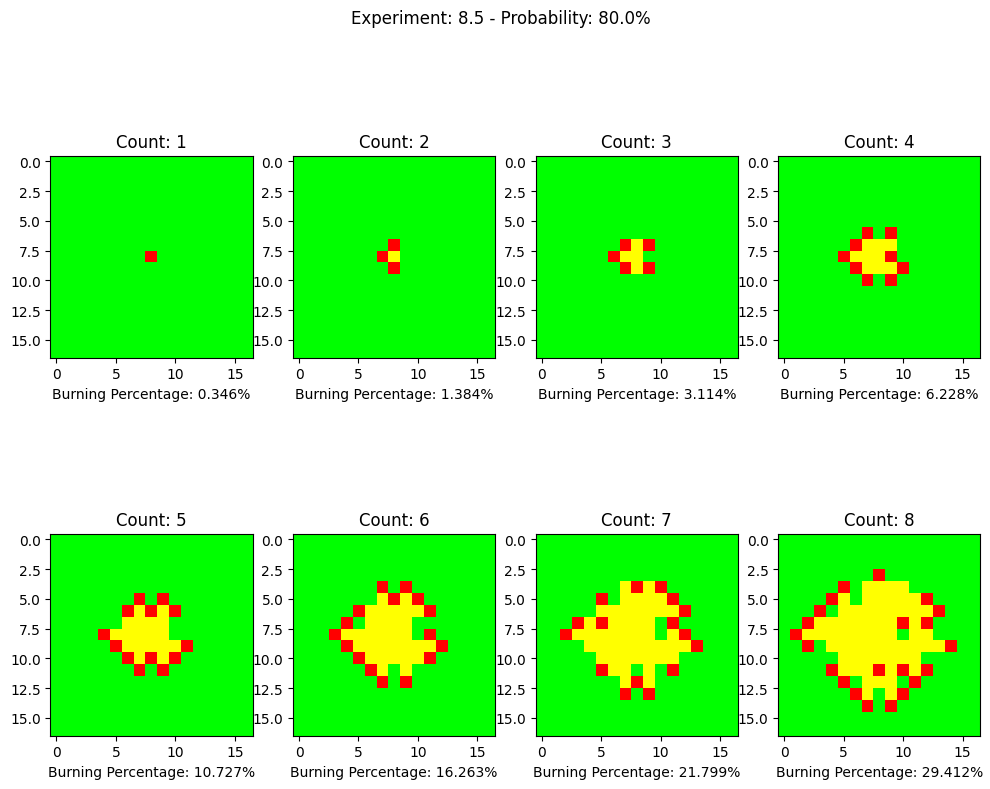

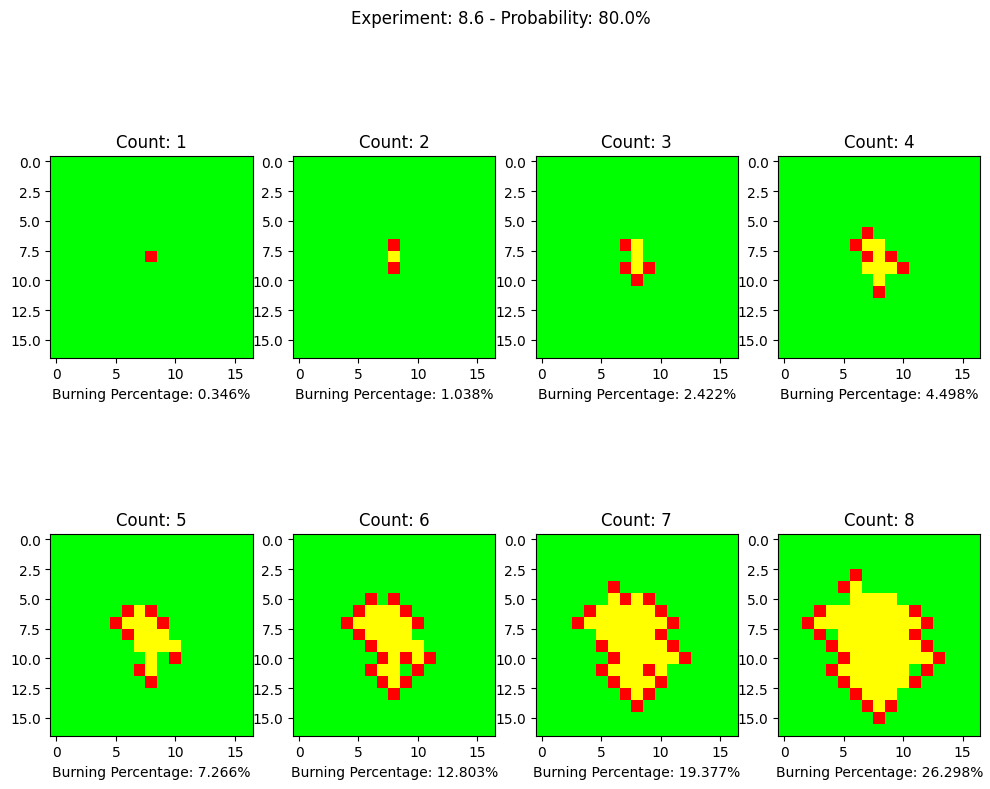

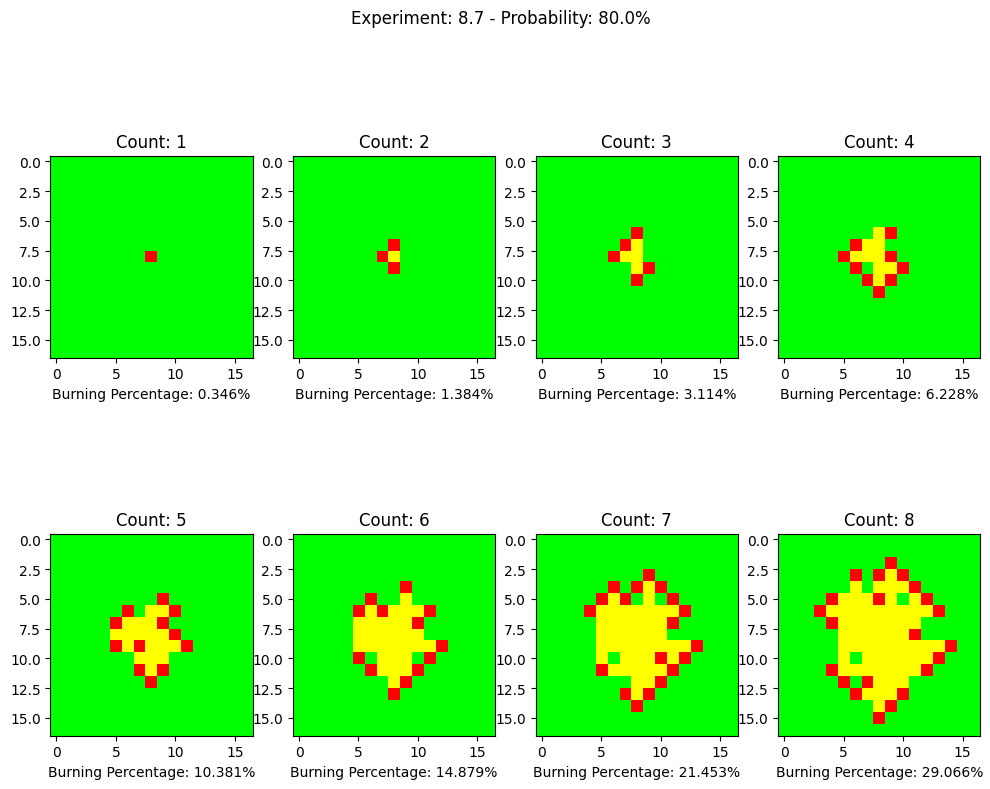

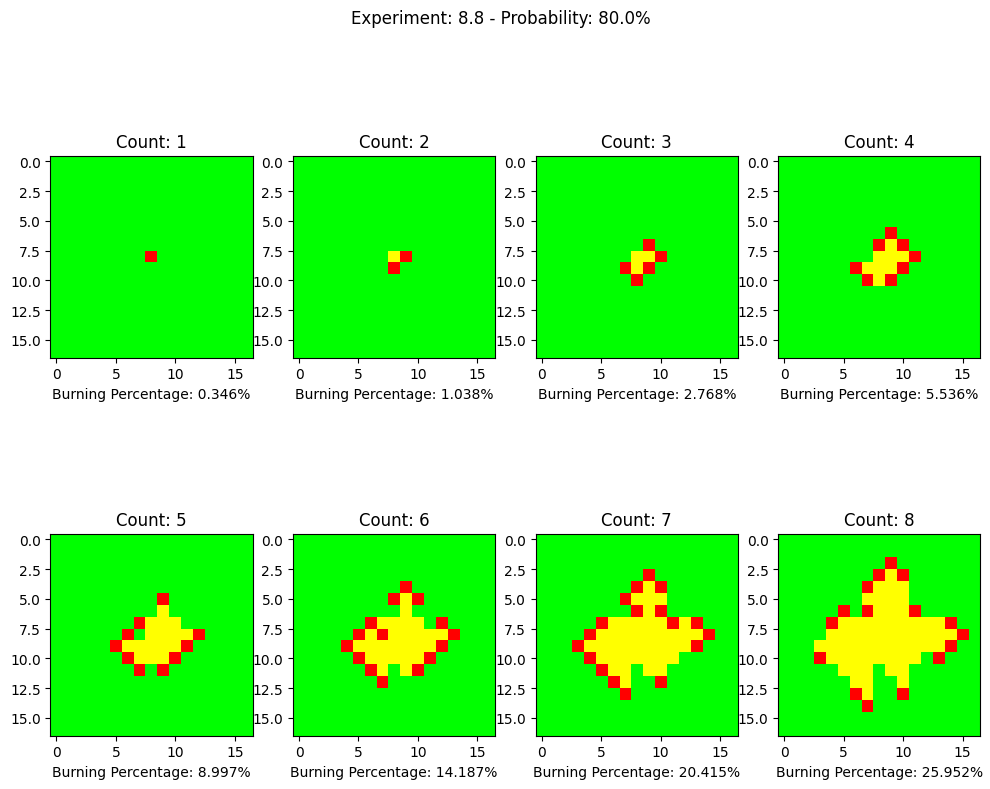

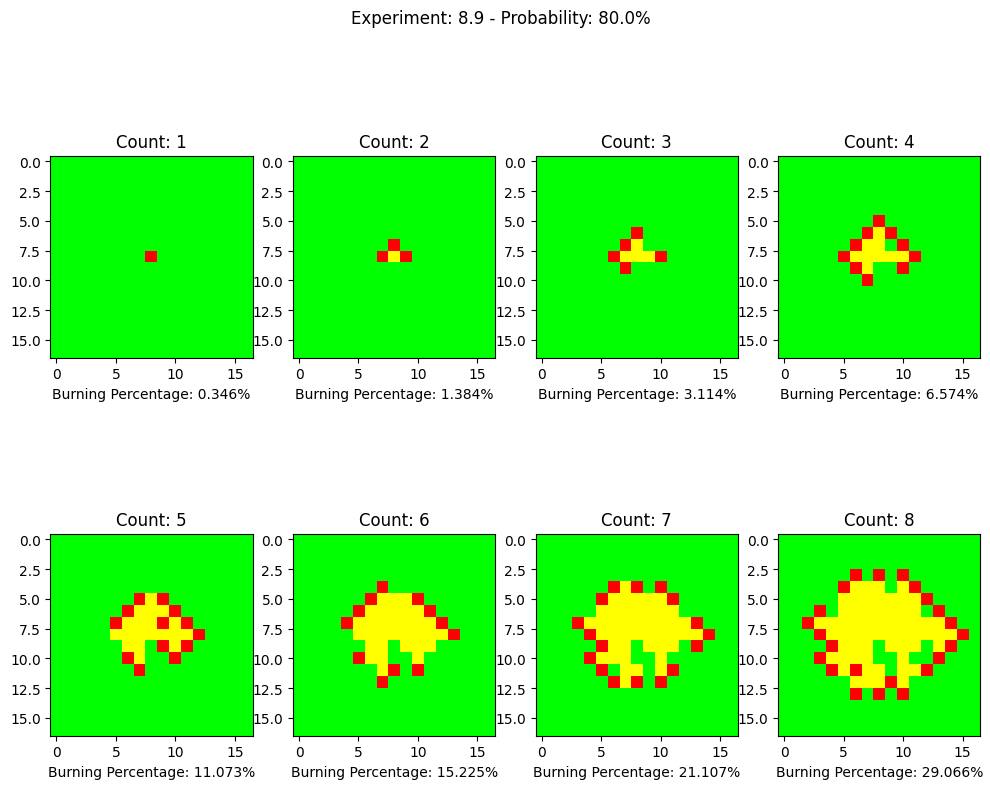

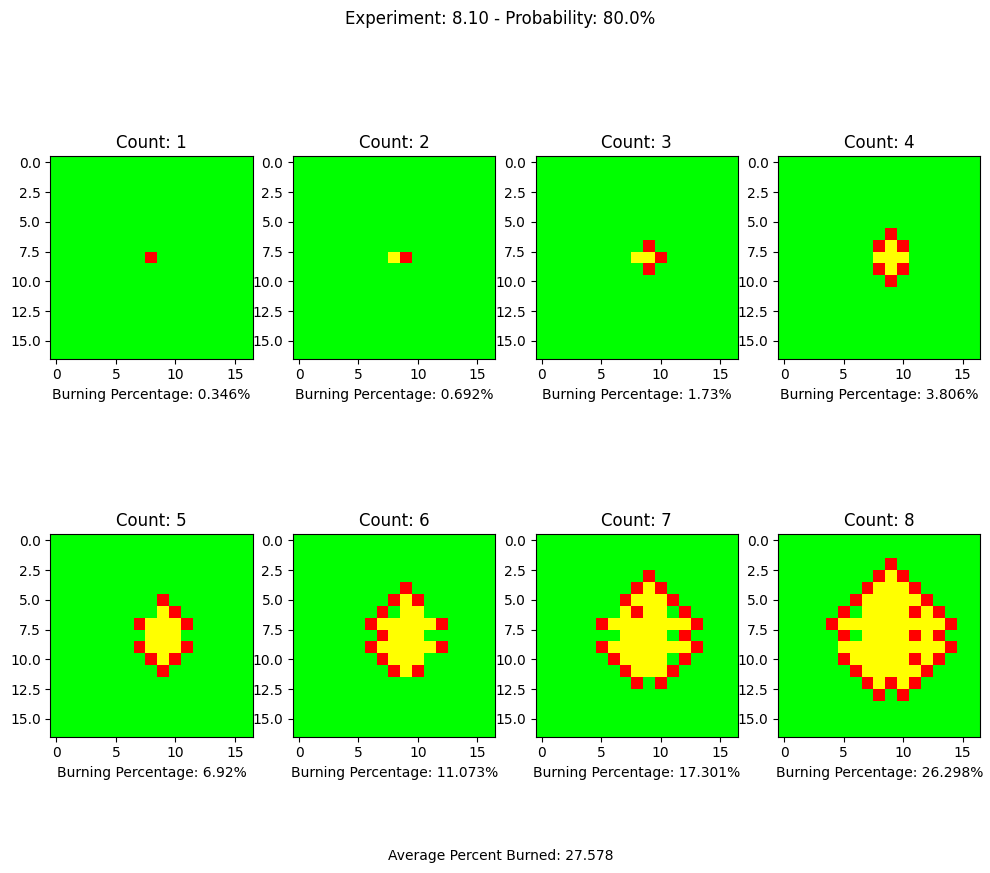

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

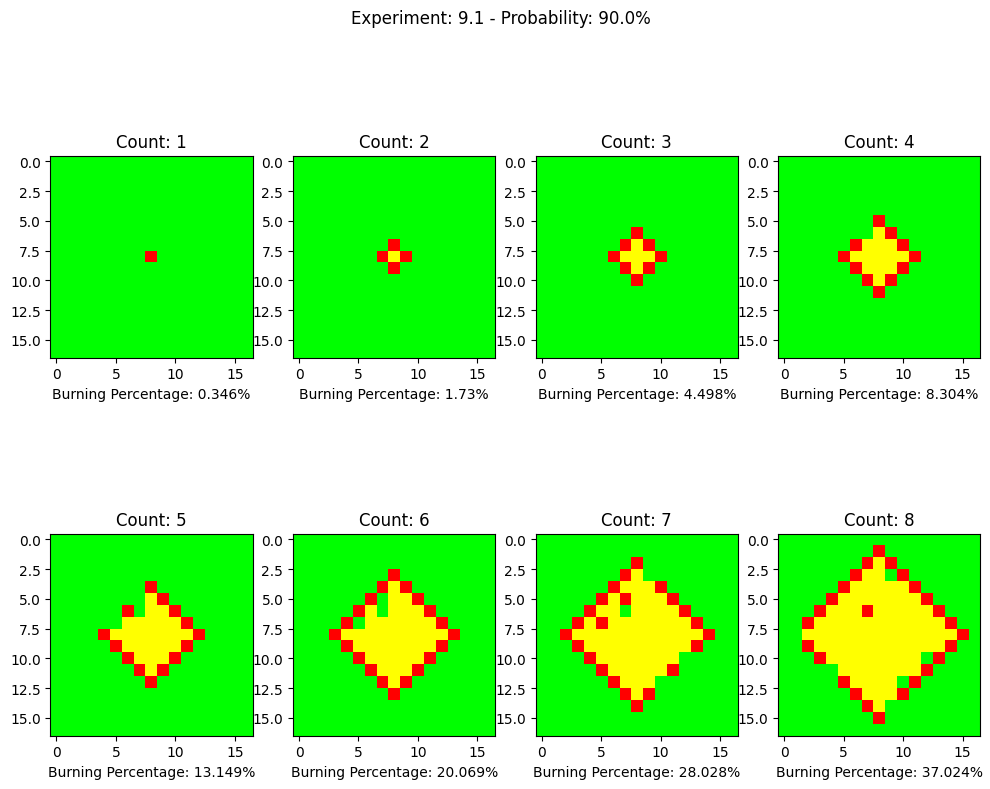

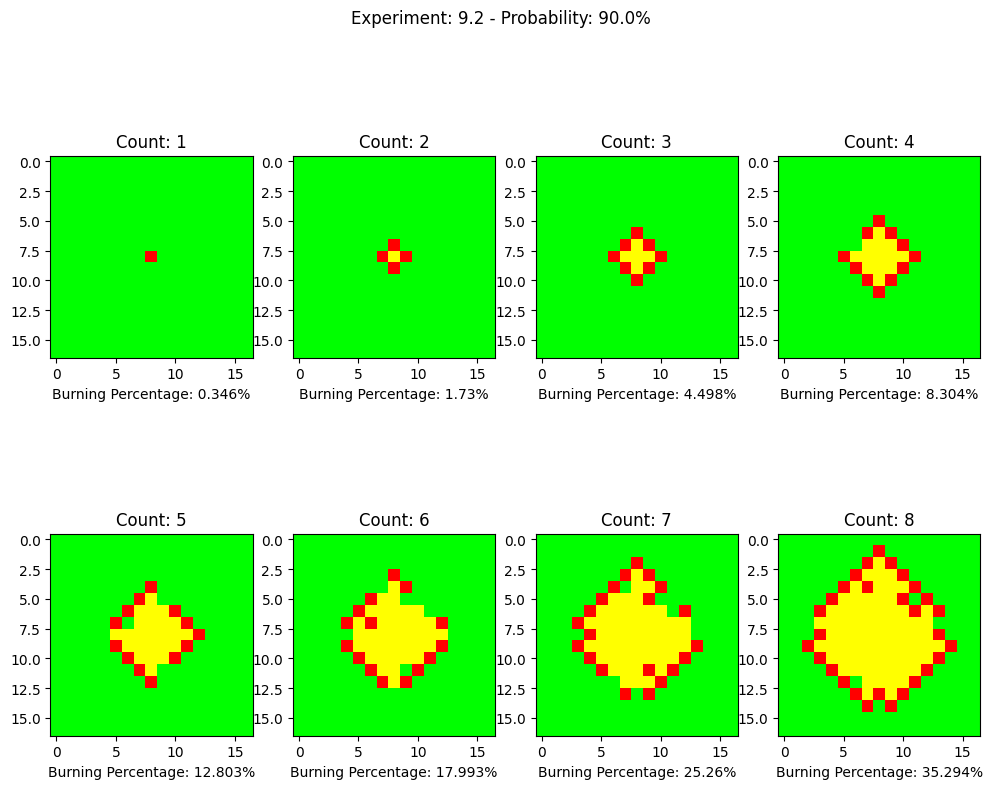

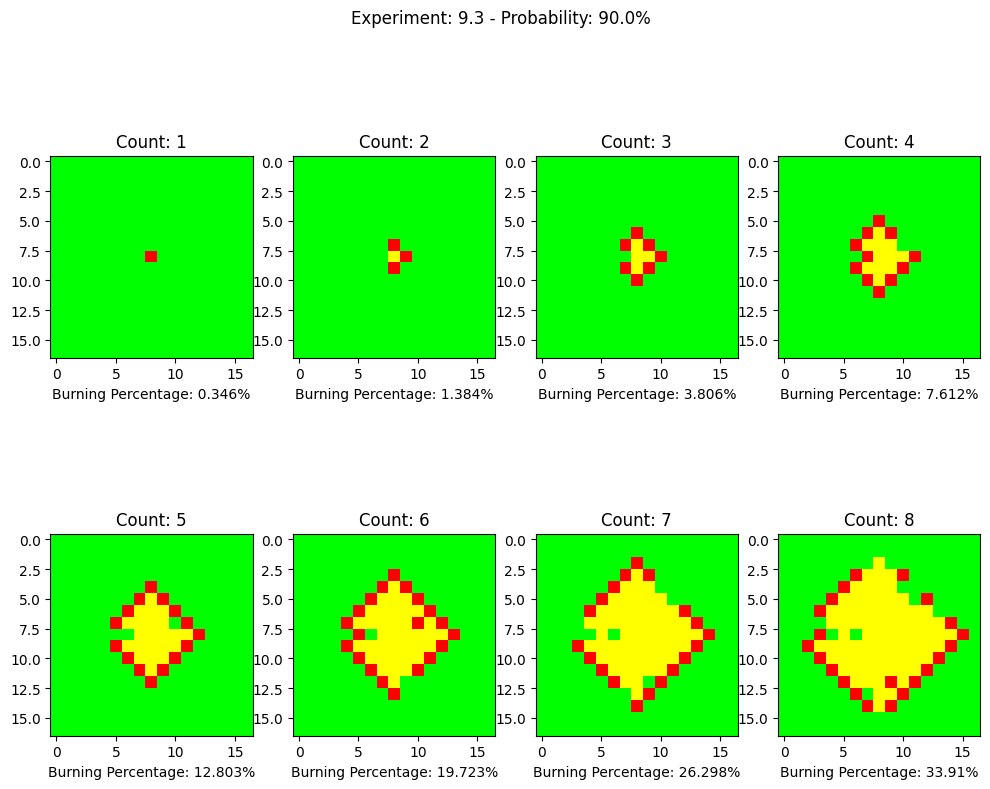

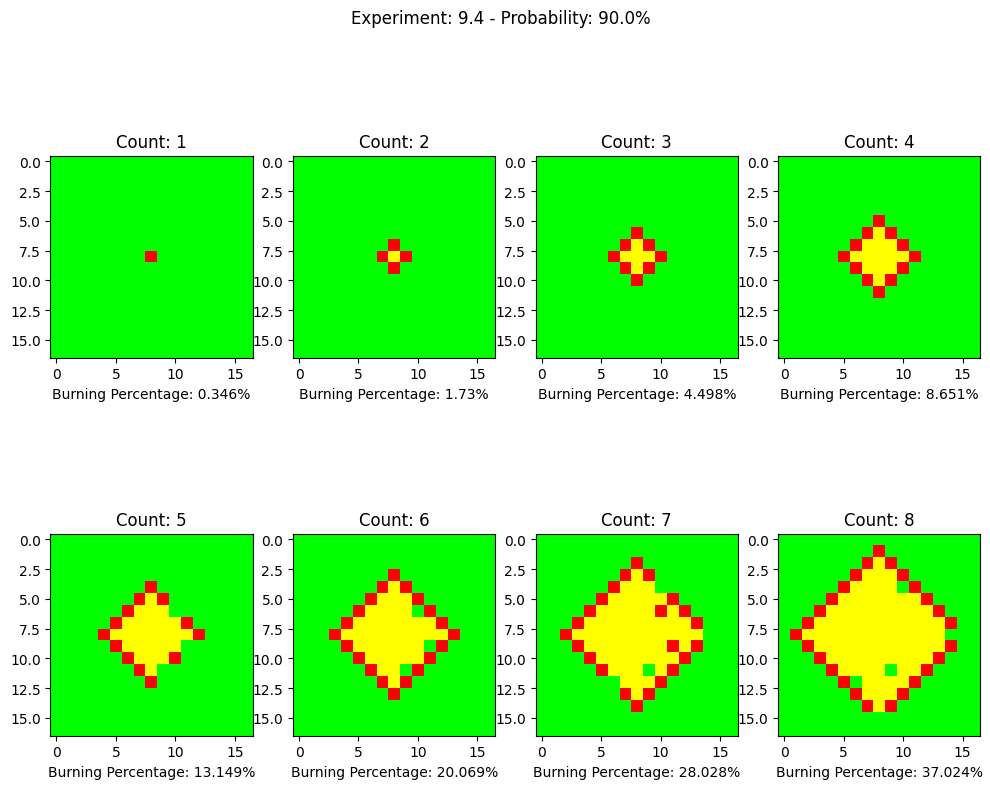

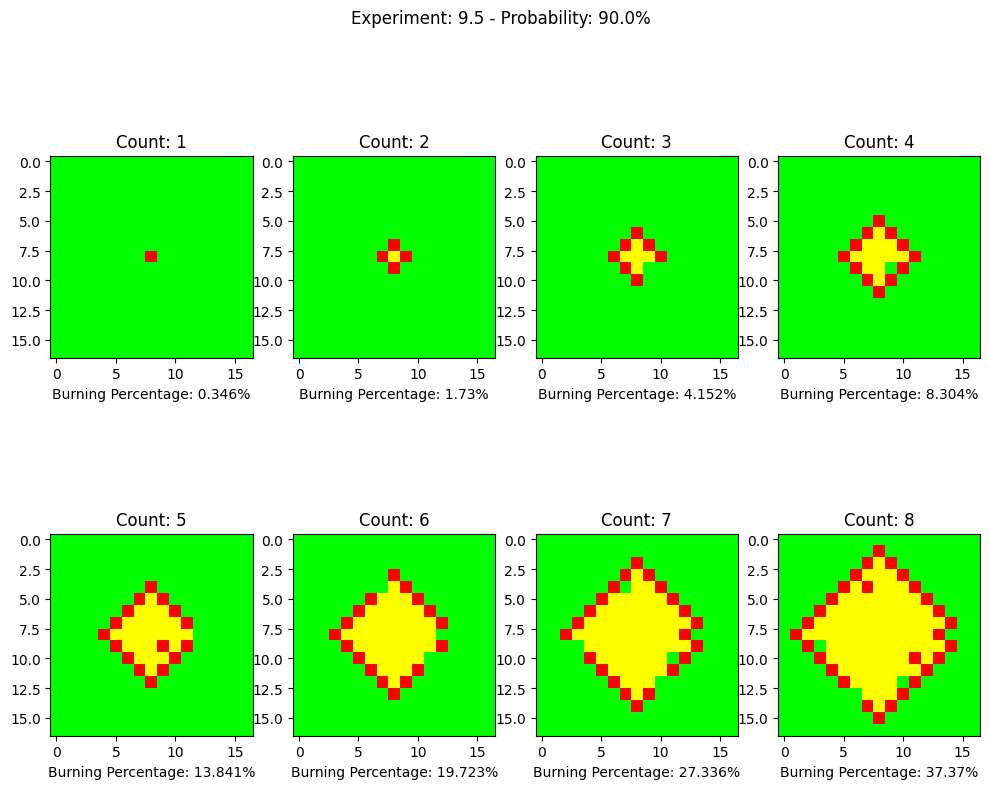

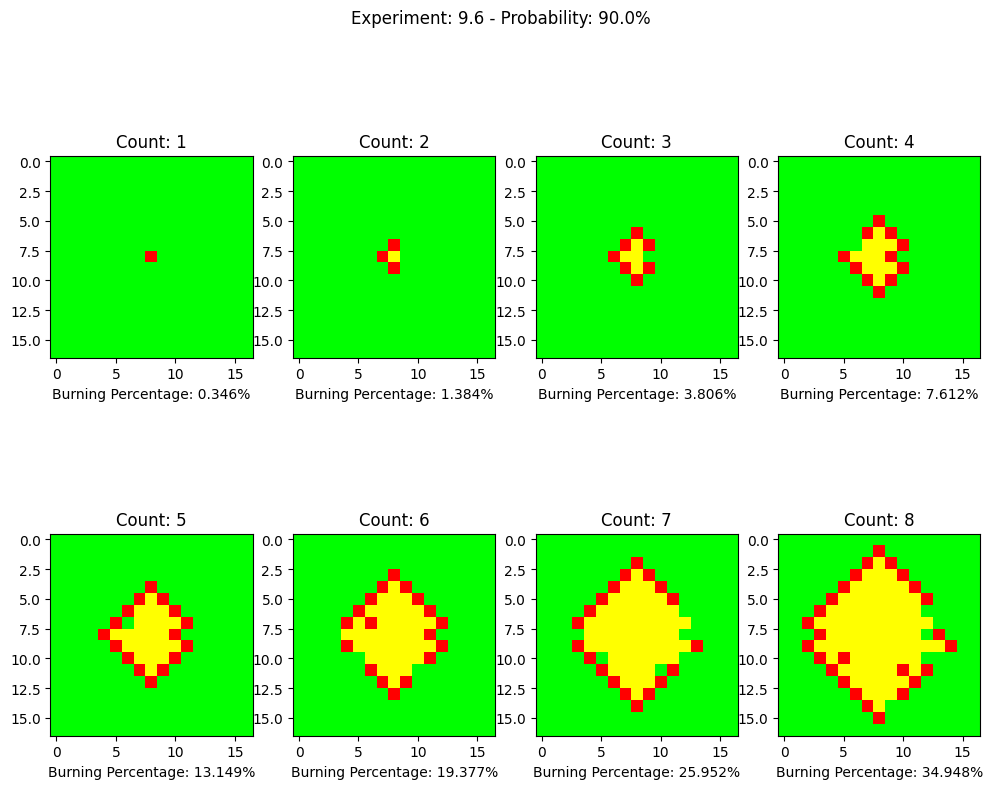

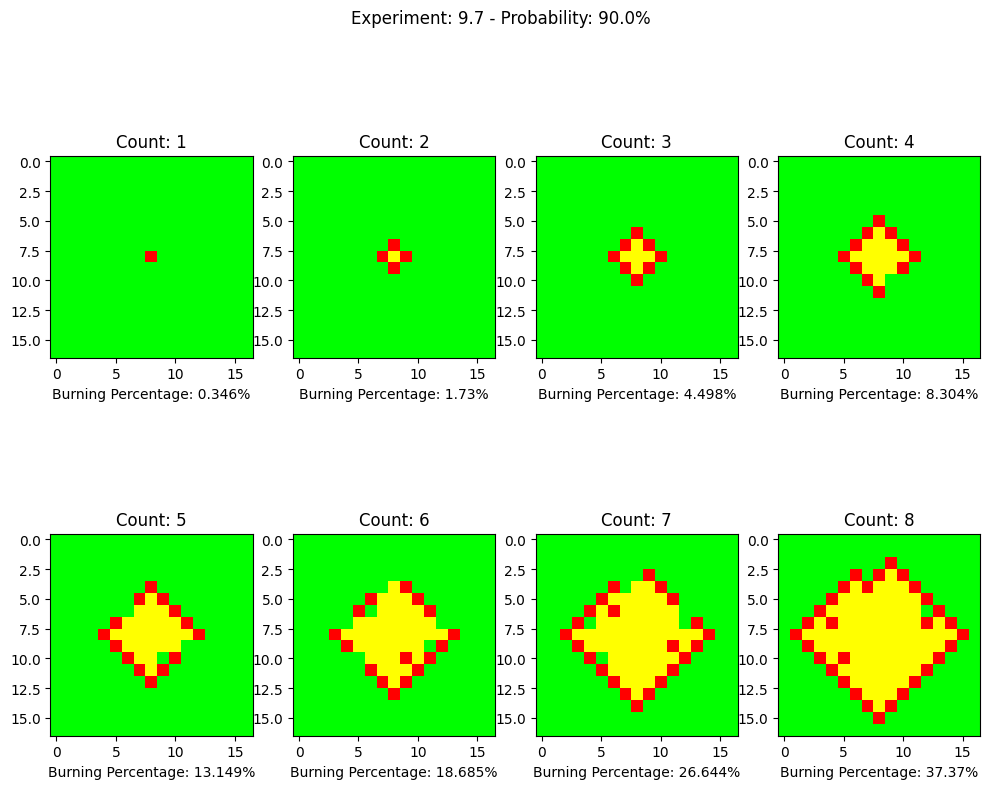

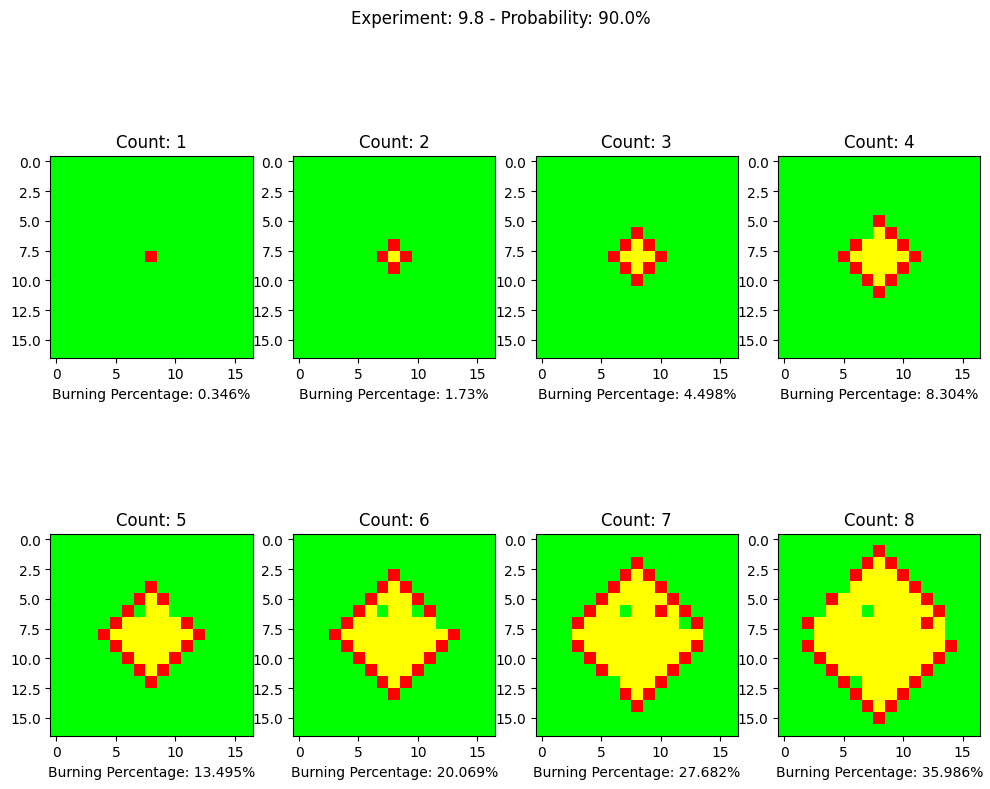

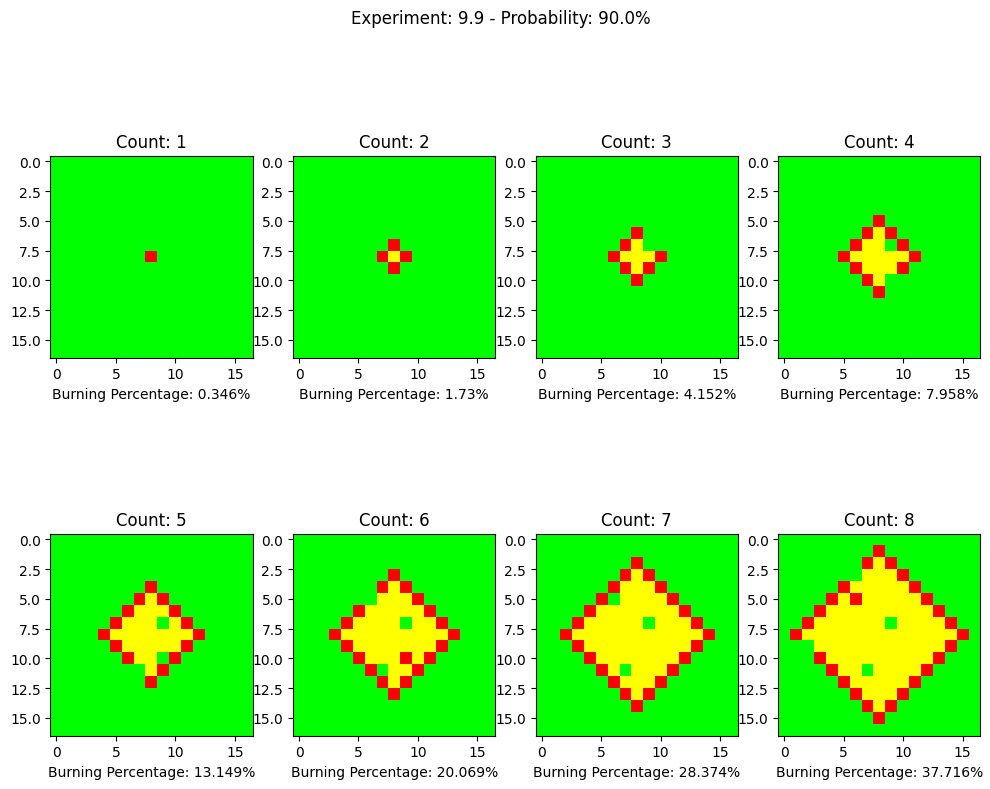

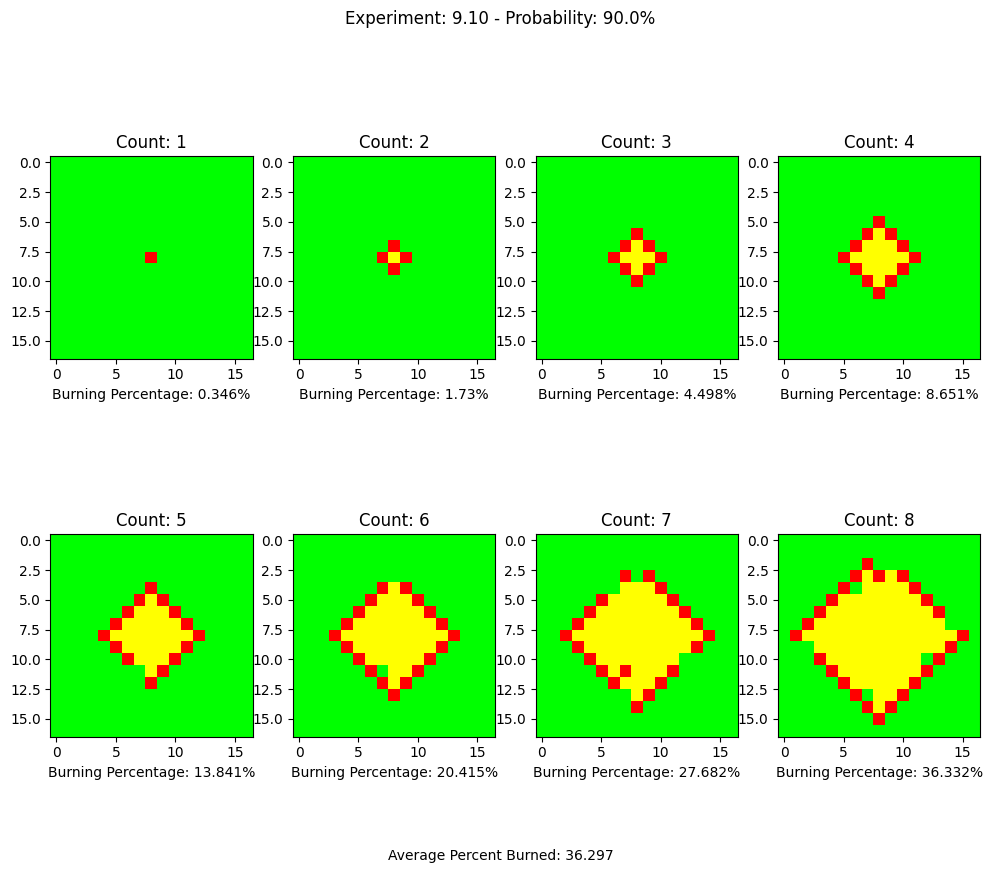

In [12]:
def simulation_start(forest_size, timestamps, prob_burning, experiments, total_probs):
    for i in range(total_probs):
        average_burn = []
        for j in range(experiments):
            burned_forest = burn(forest_size, prob_burning[i], timestamps)
            plt.figure(figsize=(12, 9))
            for k in range(timestamps):
                plt.subplot(2, 4, k+1)
                burned = coloring(burned_forest[k])
                plt.imshow(burned)
                plt.title(f'Count: {k+1}')
                burned_percentage = percentage(burned, forest_size)
                plt.xlabel(f'Burning Percentage: {burned_percentage}%')
                plt.axis('on')
            average_burn.append(burned_percentage)    
            plt.suptitle(f'Experiment: {i+1}.{j+1} - Probability: {prob_burning[i] * 100}%')  
        plt.figtext(0.5, 0.04, f'Average Percent Burned: {average(average_burn)}', ha='center', va='center')
        avg_burn_per_probs.append(average(average_burn))
        plt.show()

simulation_start(forest_size, timestamps, probs, experiments, total_probs)

## 11. Plot The Average Percent of Burned Trees

#### 11.1. Line Plot

In [13]:
def line_plot(x,y):
    plt.plot(x,y, color='red')
    plt.suptitle('Average Percent of Burned Trees from Every Probability')
    plt.xlabel('Probability')
    plt.ylabel('Average Percent of Burned Trees')
    plt.show()

#### 11.2. Scatter Plot

In [18]:
def scatter(x,y):
    plt.scatter(x, y, color='red')
    plt.title('Scatter Plot')
    plt.xlabel('Probability')
    plt.ylabel('Average Percent of Burned Trees')
    plt.show()

#### 11.2. Linear Regression

In [19]:
def linreg(x,y):
    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regressor = LinearRegression()

    regressor.fit(x_train, y_train)

    pred = regressor.predict(x)

    plt.scatter(x,y,color='blue', label='Data')
    plt.plot(x, pred, color='red', label='Regressor')
    plt.legend()

    plt.title('Linear Regression')
    plt.xlabel('Probability')
    plt.ylabel('Average Percent of Burned Trees')
    plt.show()

#### 11.3. Fit The Curve into The Data with Interpolation

In [20]:
def fit_curve(x,y):
    x = np.array(x)
    y = np.array(y)

    curve = interp1d(x, y, kind='cubic')

    x_interpolated = np.linspace(min(x), max(x), 250)
    y_interpolated = curve(x_interpolated)

    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x_interpolated, y_interpolated, color='red', label='Curve')
    plt.legend()

    plt.title('Interpolation')
    plt.xlabel('Probability')
    plt.ylabel('Average Percent of Burned Trees')
    plt.show()

#### 11.4. Display Every Plot

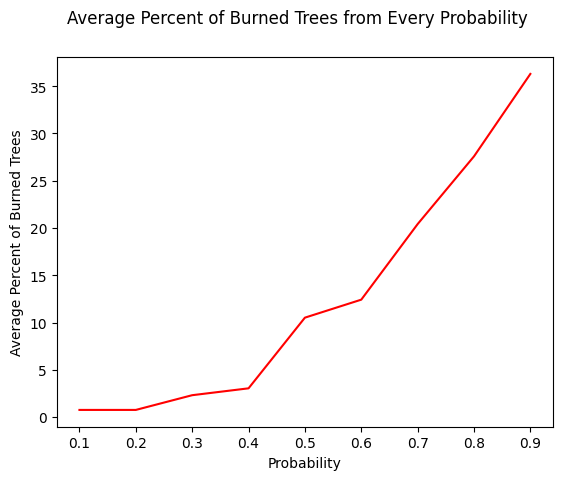

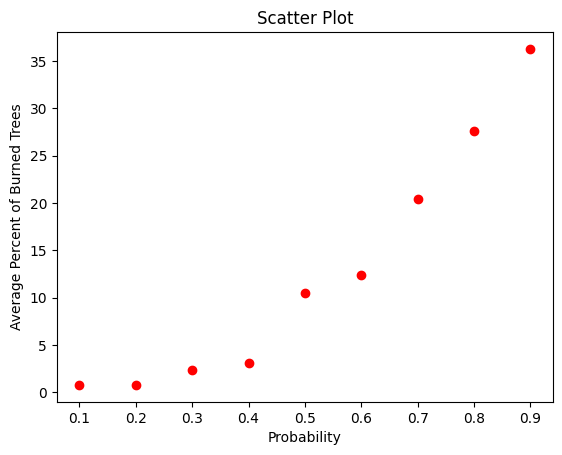

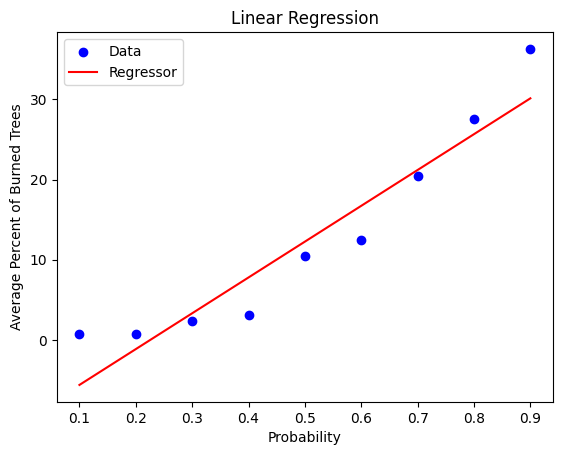

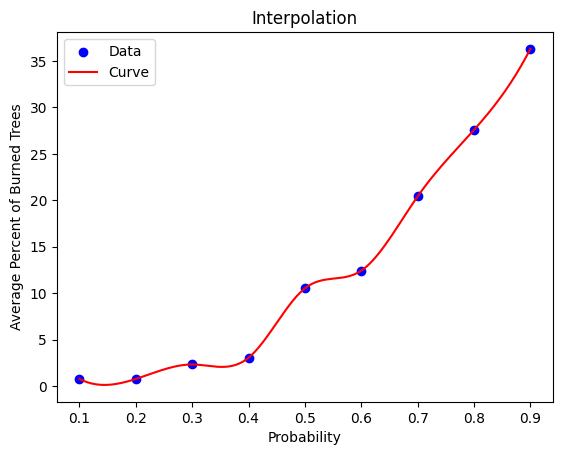

In [21]:
line_plot(probs, avg_burn_per_probs)
scatter(probs,avg_burn_per_probs)
linreg(probs, avg_burn_per_probs)
fit_curve(probs, avg_burn_per_probs)